# 데이터 베이스 생성

In [3]:
import pymysql
#데이터 베이스 생성
conn = pymysql.connect(host='localhost', user='root', password='tjdgjs789', charset='utf8')
try:
    with conn.cursor() as cursor:
        sql = 'CREATE DATABASE project'
        cursor.execute(sql)
    conn.commit()
finally:
    conn.close()

# 테이블 생성

In [4]:
import pymysql
#테이블 생성
conn = pymysql.connect(host='localhost',
        user='root',
        password='tjdgjs789',
        db='project',
        charset='utf8')
 
try:
    with conn.cursor() as cursor:
        sql = '''
      CREATE TABLE  apartment(
                num int(11) NOT NULL PRIMARY KEY,
                price char(255) NOT NULL,
                room_num varchar(255) NOT NULL,
                area varchar(255) NOT NULL,
                floor varchar(255) NOT NULL,
                location varchar(255) NOT NULL
            ) ENGINE=InnoDB DEFAULT CHARSET=utf8
            '''
        cursor.execute(sql)
    conn.commit()
finally:
    conn.close()

C:\Users\rlat3\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


# Insert 함수

In [5]:
def insert_sql(data):
    conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
    try:
        with conn.cursor() as cursor:
            for search in data:
                sql = 'INSERT INTO apartment (num,price, room_num, area , floor , location) VALUES (%s,%s, %s, %s,%s,%s)'
                cursor.execute(sql, (search['인덱스'], search['가격'],search['방개수']
                                     ,search['면적'],search['총층'],search['위치']))
        conn.commit()
    finally:
        conn.close()

# SQL 호출 함수

In [89]:
import pymysql

def add_col():
    conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
    try:
        with conn.cursor() as cursor:
            sql = '''
          ALTER TABLE apartment
          ADD(Burger float(11))
                '''
            cursor.execute(sql)
            conn.commit()
    finally:
        conn.close()
def add_burger(burger,location):
    conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
    try:
        with conn.cursor() as cursor:
            sql = """
          UPDATE apartment
          SET Burger = '""" + str(burger) + "' WHERE location Like '%"+location+"%'"
            print(sql)
                
            cursor.execute(sql)
            conn.commit()
    finally:
        conn.close()
add_col()

# 부동산114 데이터 크롤링

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup #HTML/SML 파일을 파싱하기 위한 파이썬 라이브러리
from time import sleep
from selenium.webdriver.common.keys import Keys

count = 0
def select_gu(index):
    sleep(1)
    driver.find_element_by_xpath('//*[@id="addressTitle"]/a[1]').send_keys(Keys.ENTER)
    sleep(2)
    driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]/li[1]').click() #서울시 클릭
    sleep(2)
    #gu_list = driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]')
    #gu = gu_list.find_elements_by_tag_name("li")
    driver.find_element_by_xpath('//*[@id="msrch_wrap_selectarea_Addr"]/li['+str(index+1)+']').click() #~~구 선택
    sleep(2)
    driver.find_element_by_xpath('//*[@id="div_selectAddrTotal"]/a').send_keys(Keys.ENTER)# ~~구 전체 클릭
    sleep(2)
    
def select_numlist(index):
    global count
    data = []
    driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/div[5]/a['+str(index)+']').send_keys(Keys.ENTER)
    sleep(3)
    req = driver.page_source
    soup = BeautifulSoup(req,'html.parser')
    table = soup.find('ul',class_ = 'list_article Best')
    sleep(2)
    for tr in table.find_all('li'):
        price = tr.find('strong',class_='tit_a').find('em').text
        info = tr.find('span',class_='txt').find('span',class_='info_memul').text
        address = tr.find('p').text
        count = count + 1
        room_num = info.split(' ')[0]
        area = info.split(' ')[1]
        floor = info.split(' ')[2]
        print(price + " " + info + " " + address)
        str_count = str(count)
        data.append({'인덱스':str_count,'가격':price,'방개수':room_num,'면적':area,'총층':floor,'위치':address})
    insert_sql(data)

'''
'''
def select_apt(index):
    driver.find_element_by_xpath('//*[@id="body_layout"]/div/div[5]/ul[3]/li['+str(index)+']').click()
    sleep(3)
    driver.switch_to.window(driver.window_handles[-1])
    sleep(5)
    collect_detail()
    

def collect_detail(): #데이터 셋 모으기
    #주요 정보
    a_info = driver.find_element_by_xpath('//*[@id="body_layout"]/div[2]/div[2]/div[3]/ul')
    a_info_component = a_info.find_elements_by_tag_name('dd')
    temp = []
    for item in a_info_component:
        temp.append(item.text)
    #매물 정보
    b_info = driver.find_element_by_xpath('//*[@id="divMemulInfoTab"]/table/tbody/tr/td/div[1]/ul')
    b_info_component = b_info.find_elements_by_tag_name('li')
    for item in b_info_component:
        try:
            if item.find_element_by_class_name('spninfo').text == '방향' or item.find_element_by_class_name('spninfo').text == '현관구조':
                temp.append(item.find_element_by_class_name('spndetail').text)
        except Exception:
            print("")
    #단지 정보
    c_info = driver.find_element_by_xpath('//*[@id="divCompexTab"]/table')
    c_info_component = c_info.find_elements_by_tag_name('li')
    for item in c_info_component:
        try:
            if item.find_element_by_class_name('spninfo').text == '소재지' or item.find_element_by_class_name('spninfo').text == '입주일':
                temp.append(item.find_element_by_class_name('spndetail').text)
        except Exception:
            print("")
    try:
        temp.append(driver.find_element_by_xpath('//*[@id="divSubwayList"]/ul/li[1]').text)
    except:
        print("없음")
    try:
        temp.append(driver.find_element_by_xpath('//*[@id="divLivingList"]/ul/li').text)
    except:
        print("없음")
    print(temp)
    deal_string(temp)
'''
def deal_string(str): #데이터 전처리
    all_dim = str[0].split('/')[0].replace('㎡','').replace(' ','')
    part_dim = str[0].split('/')[1].replace('㎡','').replace(' ','')
    price = str[1].replace('매매','').replace('만원','').replace(',','').replace(' ','')
    target_stair = str[2].split('/')[0].replace(' ','')
    all_stair = str[2].split('/')[1].replace('총','').replace('층','').replace(' ','')
    all_room = str[3].split('/')[0].replace('개','').replace(' ','')
    part_room = str[3].split('/')[1].replace('개','').replace(' ','')
    try:
        direction = str[4]
    except:
        direction = "정보없음"
    try:
        structure = str[5]
    except:
        structure = "정보없음"
    try:
        location = str[6]
    except:
        location = "정보없음"
    try:
        year = str[7]
    except:
        year = "정보없음"
    try:
        station = str[8]
    except:
        station = "정보없음"
    try:
        convenience = str[9]
    except:
        convenience = "정보없음"
    
    data.append({'공급 면적':all_dim,"전용 면적":part_dim,'가격':price,'층수':target_stair,'총 층':all_stair,'방 수':all_room,
                 '욕실 수':part_room,'방향':direction,'구조':structure,'소재지':location,
                 '연식':year,'근처 역':station,'편의시설':convenience
                })   '''

data = [] #부동산 114 데이터
path = "C:\\Users\\rlat3\\chromedriver.exe"
driver = webdriver.Chrome(path)
#암묵적으로 웹 자원 로드를 위해 3초 기다려줌
driver.implicitly_wait(3)
#부동산 114 점속
driver.get("https://www.r114.com/?_c=memul&_m=p10")
sleep(2)
#매매가 선택

driver.find_element_by_xpath('//*[@id="search_layout"]/div/div/div/div[4]/a').click()
sleep(1)
driver.find_element_by_xpath('//*[@id="MemulStyle"]/li[2]/label/span').click()
sleep(1)
for i in range(100):
    try:
        select_gu(i)
        sleep(2)
        index = 1
        lap = 0
        while True:
            try:
                select_numlist(index)
                sleep(2)
                index = index + 1
                if index == 11 and lap==0:
                    index = 2
                    lap = lap+1
                elif index == 12 and lap>0:
                    index = 2
                    sleep(2)
            except Exception as ex:
                print(ex)
                break
            
    except Exception as ex:
        print(ex)
      


매매349,000 만원  방4개 204.84/171.1㎡ 중층/총12층  위치서울특별시  강남구  청담동
매매270,000 만원  방4개 183.09B/144.55㎡ 고층/총20층  위치서울특별시  강남구  역삼동
매매295,000 만원  방3개 122.58E/91.91㎡ 29층/-  위치서울특별시  강남구  대치동
매매280,000 만원  방4개 210.93A/163.56㎡ 저층/총69층  위치서울특별시  강남구  도곡동
매매405,000 만원  방4개 149.4B/114.17㎡ 32층/총35층  위치서울특별시  강남구  대치동
매매325,000 만원  방3개 125.23C/94.49㎡ 15층/-  위치서울특별시  강남구  대치동
매매298,000 만원  방3개 111.83C/84.99㎡ 7층/-  위치서울특별시  강남구  대치동
매매317,000 만원  방3개 126.22A/94.49㎡ 저층/-  위치서울특별시  강남구  대치동
매매384,000 만원  방4개 183.8/159.15㎡ 12층/총14층  위치서울특별시  강남구  대치동
매매290,000 만원  방3개 122.74C/91.93㎡ 23층/총28층  위치서울특별시  강남구  대치동
매매310,000 만원  방4개 147.99/114.97㎡ 12층/총24층  위치서울특별시  강남구  대치동
매매65,000 만원  방2개 78.43/59.5㎡ 23층/총27층  위치서울특별시  강남구  역삼동
매매265,000 만원  방3개 110.84A/84.33㎡ 10층/총20층  위치서울특별시  강남구  대치동
매매240,000 만원  방4개 124.57/97.35㎡ 19층/총24층  위치서울특별시  강남구  대치동
매매160,000 만원  방3개 91.62/84.97㎡ 14층/총15층  위치서울특별시  강남구  수서동
매매225,000 만원  방3개 109.5A/84.23㎡ 20층/총21층  위치서울특별시  강남구  삼성동
매매142,000 만원  방3개 106.62/84.91㎡ 중층/총18층  위치서울특별시 

매매158,000 만원  방4개 122.6/91.77㎡ 고층/총20층  위치서울특별시  강남구  삼성동
매매210,000 만원  방4개 146.32/121.08㎡ 중층/총18층  위치서울특별시  강남구  대치동
매매90,000 만원  방3개 102.59B/83.36㎡ 중층/총8층  위치서울특별시  강남구  논현동
매매370,000 만원  방4개 188.85/161.36㎡ 8층/총14층  위치서울특별시  강남구  대치동
매매330,000 만원  방3개 125.23C/94.49㎡ 19층/총34층  위치서울특별시  강남구  대치동
매매240,000 만원  방4개 170.87A/148.12㎡ 중층/총13층  위치서울특별시  강남구  삼성동
매매160,000 만원  방3개 116.44/84.99㎡ 저층/총13층  위치서울특별시  강남구  삼성동
매매325,000 만원  방3개 125.23C/94.49㎡ 20층/-  위치서울특별시  강남구  대치동
매매285,000 만원  방3개 112.24B/84.98㎡ 7층/-  위치서울특별시  강남구  대치동
매매297,000 만원  방3개 111.83C/84.99㎡ 20층/-  위치서울특별시  강남구  대치동
매매420,000 만원  방4개 181.45A/151.31㎡ 17층/-  위치서울특별시  강남구  대치동
매매440,000 만원  방4개 183.59B/151.27㎡ 25층/-  위치서울특별시  강남구  대치동
매매155,000 만원  방3개 105.06B/84.59㎡ 중층/총19층  위치서울특별시  강남구  청담동
매매150,000 만원  방3개 84.54/59.49㎡ 중층/총9층  위치서울특별시  강남구  도곡동
매매225,000 만원  방3개 111.08A/84.99㎡ 중층/총21층  위치서울특별시  강남구  도곡동
매매240,000 만원  방4개 142.19/109.53㎡ 21층/총24층  위치서울특별시  강남구  청담동
매매320,000 만원  방3개 125.57B/94.5㎡ 중층/-  위치서울특별시  강남구  대치

매매168,000 만원  방3개 106.23/84.57㎡ 중층/총11층  위치서울특별시  강남구  청담동
매매148,000 만원  방3개 106.46/84.96㎡ 중층/총15층  위치서울특별시  강남구  청담동
매매140,000 만원  방3개 105.97/84.99㎡ 중층/총9층  위치서울특별시  강남구  대치동
매매215,000 만원  방4개 169.79/144.09㎡ 3층/총8층  위치서울특별시  강남구  대치동
매매220,000 만원  방4개 128.92/101.6㎡ 고층/총19층  위치서울특별시  강남구  대치동
매매230,000 만원  방4개 133.98/125.17㎡ 11층/총14층  위치서울특별시  강남구  대치동
매매120,000 만원  방3개 110.85A/81.01㎡ 저층/총17층  위치서울특별시  강남구  역삼동
매매170,000 만원  방3개 108.28/85㎡ 저층/총10층  위치서울특별시  강남구  청담동
매매100,000 만원  방3개 117.82/84.87㎡ 고층/총12층  위치서울특별시  강남구  논현동
매매75,000 만원  방2개 72.06/64.26㎡ 고층/총7층  위치서울특별시  강남구  삼성동
매매399,000 만원  방5개 181.31/142.93㎡ 중층/총22층  위치서울특별시  강남구  삼성동
매매250,000 만원  방3개 110.84A/84.33㎡ 중층/총20층  위치서울특별시  강남구  대치동
매매349,000 만원  방4개 158.62/123.3㎡ 고층/총27층  위치서울특별시  강남구  삼성동
매매196,000 만원  방4개 138.84/113㎡ 중층/총18층  위치서울특별시  강남구  삼성동
매매118,000 만원  방1개 51.81A/38.67㎡ 고층/총23층  위치서울특별시  강남구  삼성동
매매244,000 만원  방4개 169.89/141.53㎡ 고층/총15층  위치서울특별시  강남구  삼성동
매매295,000 만원  방3개 113.15A/84.97㎡ 29층/총30층  위치서울특별시  강남구  대치

매매125,000 만원  방3개 103.53/84.32㎡ 10층/총15층  위치서울특별시  강남구  삼성동
매매190,000 만원  방3개 102.01/95.27㎡ 13층/총14층  위치서울특별시  강남구  대치동
매매185,000 만원  방5개 259.51/244.52㎡ 중층/총5층  위치서울특별시  강남구  역삼동
매매44,000 만원  방2개 62.05/53.65㎡ 4층/총6층  위치서울특별시  강남구  역삼동
매매88,000 만원  방3개 109.32/97.6㎡ 4층/총6층  위치서울특별시  강남구  역삼동
매매405,000 만원  방4개 149.4B/114.17㎡ 30층/총35층  위치서울특별시  강남구  대치동
매매200,000 만원  방3개 102.47A/76.17㎡ 고층/총28층  위치서울특별시  강남구  개포동
매매194,000 만원  방4개 185.97D/157.41㎡ 9층/총15층  위치서울특별시  강남구  역삼동
매매220,000 만원  방3개 106.62B/84.99㎡ 14층/총16층  위치서울특별시  강남구  역삼동
매매250,000 만원  방4개 225.22/171.94㎡ 중층/총14층  위치서울특별시  강남구  역삼동
매매168,000 만원  방3개 102.01/95.27㎡ 7층/-  위치서울특별시  강남구  대치동
매매125,000 만원  방3개 92.68/70.89㎡ 중층/총9층  위치서울특별시  강남구  도곡동
매매330,000 만원  방4개 183.59B/151.27㎡ 17층/총35층  위치서울특별시  강남구  대치동
매매185,000 만원  방4개 115.54/84.43㎡ 11층/총14층  위치서울특별시  강남구  대치동
매매179,000 만원  방3개 80.92A/59.96㎡ 중층/-  위치서울특별시  강남구  개포동
매매135,000 만원  방3개 102.55/84.92㎡ 중층/총14층  위치서울특별시  강남구  논현동
매매240,000 만원  방4개 147.99/114.78㎡ 8층/총24층  위치서울특별시  강남구  

매매115,000 만원  방4개 133.2/113.84㎡ 중층/총10층  위치서울특별시  강남구  논현동
매매395,000 만원  방4개 195.52/156.85㎡ 고층/총45층  위치서울특별시  강남구  삼성동
매매385,000 만원  방4개 149.4B/114.17㎡ 16층/총25층  위치서울특별시  강남구  대치동
매매230,000 만원  방4개 172.22/142.06㎡ 중층/총20층  위치서울특별시  강남구  역삼동
매매150,000 만원  방3개 108.31/84.87㎡ 고층/총19층  위치서울특별시  강남구  삼성동
매매305,000 만원  방3개 126.22A/94.49㎡ 저층/-  위치서울특별시  강남구  대치동
매매113,000 만원  방3개 120.12/84.96㎡ 중층/총15층  위치서울특별시  강남구  도곡동
매매210,000 만원  방4개 145.61/116.28㎡ 중층/총20층  위치서울특별시  강남구  역삼동
매매175,000 만원  방3개 106.26A/84.58㎡ 중층/총16층  위치서울특별시  강남구  역삼동
매매190,000 만원  방3개 102.36/96.04㎡ 13층/총15층  위치서울특별시  강남구  대치동
매매129,500 만원  방4개 153.43/132.88㎡ 중층/총15층  위치서울특별시  강남구  역삼동
매매273,000 만원  방4개 148.76/127.6㎡ 고층/총15층  위치서울특별시  강남구  대치동
매매132,000 만원  방3개 106.82/84.99㎡ 중층/총16층  위치서울특별시  강남구  논현동
매매165,000 만원  방4개 146.23/110.2㎡ 저층/총15층  위치서울특별시  강남구  청담동
매매144,500 만원  방3개 77.59A/59.95㎡ 고층/-  위치서울특별시  강남구  역삼동
매매120,000 만원  방3개 109.11A/84.98㎡ 중층/총11층  위치서울특별시  강남구  논현동
매매120,000 만원  방3개 120.12/84.96㎡ 5층/총5층  위치서울특별시  강남구

매매215,000 만원  방4개 142.54A/110.39㎡ 고층/총15층  위치서울특별시  강남구  대치동
매매177,000 만원  방4개 115.54/84.43㎡ 10층/총14층  위치서울특별시  강남구  대치동
매매132,000 만원  방3개 114.76B/84.95㎡ 고층/총11층  위치서울특별시  강남구  도곡동
매매134,000 만원  방3개 102.55/84.92㎡ 12층/총14층  위치서울특별시  강남구  논현동
매매180,000 만원  방3개 110.59/84.67㎡ 중층/총21층  위치서울특별시  강남구  도곡동
매매270,000 만원  방4개 178.76/145.83㎡ 21층/총29층  위치서울특별시  강남구  대치동
매매173,000 만원  방4개 230.33/177.27㎡ 고층/총46층  위치서울특별시  강남구  도곡동
매매365,000 만원  방4개 181.45A/151.31㎡ 중층/총34층  위치서울특별시  강남구  대치동
매매85,000 만원  방2개 94.17/70.57㎡ 중층/총10층  위치서울특별시  강남구  역삼동
매매80,000 만원  방3개 80.99A/73.17㎡ 저층/총8층  위치서울특별시  강남구  논현동
매매112,000 만원  방2개 79.05A/58.57㎡ 고층/총19층  위치서울특별시  강남구  삼성동
매매128,000 만원  방4개 182.23A/158.69㎡ 6층/총7층  위치서울특별시  강남구  도곡동
매매120,000 만원  방3개 110.85A/81.01㎡ 중층/총17층  위치서울특별시  강남구  역삼동
매매184,000 만원  방4개 146.32/121.08㎡ 16층/총18층  위치서울특별시  강남구  대치동
매매82,000 만원  방3개 126.52B/106.59㎡ 6층/총7층  위치서울특별시  강남구  논현동
매매160,000 만원  방4개 122.6/91.77㎡ 저층/총20층  위치서울특별시  강남구  삼성동
매매88,000 만원  방2개 78.72B10/59.33㎡ 14층/총15층  위치서울

매매215,000 만원  방3개 101.09/94.74㎡ 중층/총15층  위치서울특별시  강남구  대치동
매매144,000 만원  방3개 79.52A/59.60㎡ 고층/총22층  위치서울특별시  강남구  역삼동
매매240,000 만원  방4개 138.84/114.59㎡ 고층/총24층  위치서울특별시  강남구  대치동
매매130,000 만원  방3개 99.86/84.94㎡ 고층/총21층  위치서울특별시  강남구  도곡동
매매135,000 만원  방4개 173.83B/153.61㎡ 4층/총8층  위치서울특별시  강남구  청담동
매매145,000 만원  방3개 92.03/73.41㎡ 고층/총12층  위치서울특별시  강남구  도곡동
매매27,000 만원  방1개 41.83A/30.21㎡ 중층/총11층  위치서울특별시  강남구  논현동
매매89,000 만원  방3개 118.3/84.34㎡ 고층/총22층  위치서울특별시  강남구  역삼동
매매185,000 만원  방3개 109.27A/84.93㎡ 16층/총17층  위치서울특별시  강남구  역삼동
매매155,000 만원  방3개 100.64/81.94㎡ 중층/총14층  위치서울특별시  강남구  삼성동
매매215,000 만원  방3개 108.21/84.58㎡ 중층/-  위치서울특별시  강남구  대치동
매매115,000 만원  방4개 145.21/117.33㎡ 고층/총10층  위치서울특별시  강남구  논현동
매매300,000 만원  방4개 122.42A/93.4㎡ 10층/총20층  위치서울특별시  강남구  대치동
매매220,000 만원  방4개 128.92/101.6㎡ 중층/총19층  위치서울특별시  강남구  대치동
매매240,000 만원  방3개 192.73/144.62㎡ 중층/총55층  위치서울특별시  강남구  도곡동
매매37,900 만원  방1개 47.19/33.8㎡ 고층/총20층  위치서울특별시  강남구  도곡동
매매197,000 만원  방3개 113.31/84.46㎡ 8층/총14층  위치서울특별시  강남구  대치동
매

매매300,000 만원  방4개 152.72/128.01㎡ 12층/총14층  위치서울특별시  강남구  대치동
매매260,000 만원  방4개 148.45/122.85㎡ 중층/총13층  위치서울특별시  강남구  삼성동
매매120,000 만원  방3개 110.85A/81.01㎡ 중층/총17층  위치서울특별시  강남구  역삼동
매매345,000 만원  방4개 152.54/121.74㎡ 고층/총29층  위치서울특별시  강남구  대치동
매매230,000 만원  방4개 203.71/149.7㎡ 중층/총23층  위치서울특별시  강남구  역삼동
매매230,000 만원  방4개 190.26B/154.21㎡ 중층/총22층  위치서울특별시  강남구  삼성동
매매120,000 만원  방4개 198.34/179.97㎡ 중층/총6층  위치서울특별시  강남구  역삼동
매매89,000 만원  방3개 91.72/71.91㎡ 중층/총7층  위치서울특별시  강남구  역삼동
매매222,000 만원  방3개 113.08A/84.99㎡ 중층/총7층  위치서울특별시  강남구  역삼동
매매153,000 만원  방4개 153.43/132.88㎡ 중층/총7층  위치서울특별시  강남구  역삼동
매매200,000 만원  방3개 96.31/71.85㎡ 중층/총21층  위치서울특별시  강남구  도곡동
매매255,000 만원  방3개 119.63A/89.35㎡ 중층/-  위치서울특별시  강남구  청담동
매매162,000 만원  방3개 79.41/59.88㎡ 중층/총7층  위치서울특별시  강남구  역삼동
매매149,000 만원  방3개 105.78/84.92㎡ 중층/-  위치서울특별시  강남구  청담동
매매232,000 만원  방3개 112.96A/84.99㎡ 중층/총7층  위치서울특별시  강남구  역삼동
매매190,000 만원  방3개 115.07/84.92㎡ 중층/총24층  위치서울특별시  강남구  삼성동
매매365,000 만원  방4개 203.69C/165.23㎡ 중층/총7층  위치서울특별시  강남구  역삼동


매매355,000 만원  방4개 185.53/164.31㎡ 중층/총20층  위치서울특별시  강남구  청담동
매매120,000 만원  방3개 79.33A/59.82㎡ 고층/총21층  위치서울특별시  강남구  역삼동
매매182,000 만원  방4개 145.2N/124.66㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매246,000 만원  방4개 264.46/244.54㎡ 중층/총20층  위치서울특별시  강남구  청담동
매매178,000 만원  방3개 112.39/85㎡ 19층/총24층  위치서울특별시  강남구  대치동
매매225,000 만원  방4개 183.04/152.25㎡ 중층/총21층  위치서울특별시  강남구  삼성동
매매178,000 만원  방4개 141.99/120.89㎡ 중층/총16층  위치서울특별시  강남구  청담동
매매167,000 만원  방3개 101.46/84.74㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매302,000 만원  방4개 167.32/134.90㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매108,000 만원  방3개 70.84/59.82㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매187,000 만원  방3개 112.77/84.76㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매163,000 만원  방3개 112.39/84.97㎡ 중층/총21층  위치서울특별시  강남구  역삼동
매매380,000 만원  방4개 149.36C/114.15㎡ 30층/총35층  위치서울특별시  강남구  대치동
매매129,000 만원  방4개 168.72/144.43㎡ 중층/총8층  위치서울특별시  강남구  삼성동
매매165,000 만원  방3개 105.97/84.99㎡ 중층/총9층  위치서울특별시  강남구  대치동
매매280,000 만원  방3개 125.57B/94.5㎡ 23층/총29층  위치서울특별시  강남구  대치동
매매390,000 만원  방4개 235.61/197.46㎡ 중층/-  위치서울특별시  강남

매매249,000 만원  방4개 147.12/118.03㎡ 중층/총20층  위치서울특별시  강남구  역삼동
매매140,000 만원  방4개 135.18A/115.88㎡ 5층/총9층  위치서울특별시  강남구  삼성동
매매190,000 만원  방3개 111.08A/84.99㎡ 고층/총20층  위치서울특별시  강남구  도곡동
매매134,000 만원  방3개 77.36B/59.7㎡ 중층/총17층  위치서울특별시  강남구  역삼동
매매135,000 만원  방3개 77.36B/59.7㎡ 중층/총17층  위치서울특별시  강남구  역삼동
매매148,000 만원  방4개 200.86/147.21㎡ 중층/총14층  위치서울특별시  강남구  도곡동
매매83,000 만원  방3개 91.92A/84.73㎡ 중층/총6층  위치서울특별시  강남구  대치동
매매138,000 만원  방3개 109.43/93.81㎡ 고층/총10층  위치서울특별시  강남구  삼성동
매매129,000 만원  방3개 79.52A/59.60㎡ 20층/총25층  위치서울특별시  강남구  역삼동
매매149,000 만원  방3개 84.22B/59.98㎡ 중층/총22층  위치서울특별시  강남구  삼성동
매매112,000 만원  방3개 91.43/59.95㎡ 중층/총17층  위치서울특별시  강남구  청담동
매매250,000 만원  방4개 203.71/149.7㎡ 17층/총22층  위치서울특별시  강남구  역삼동
매매76,000 만원  방1개 49.01/34.44㎡ 6층/총15층  위치서울특별시  강남구  수서동
매매234,000 만원  방3개 113.31/84.48㎡ 9층/총14층  위치서울특별시  강남구  대치동
매매162,000 만원  방3개 85.68/59.88㎡ 6층/총22층  위치서울특별시  강남구  대치동
매매260,000 만원  방3개 120.58C/90.19㎡ 중층/총35층  위치서울특별시  강남구  청담동
매매200,000 만원  방3개 106.62B/84.99㎡ 12층/총19층  위치서울특별시  강남구  

매매120,000 만원  방3개 113.73/84.89㎡ 고층/총13층  위치서울특별시  강남구  도곡동
매매130,000 만원  방3개 106.82/84.99㎡ 중층/-  위치서울특별시  강남구  논현동
매매150,000 만원  방2개 85.95/59.82㎡ 중층/총22층  위치서울특별시  강남구  대치동
매매280,000 만원  방5개 173.48/162.71㎡ 14층/총15층  위치서울특별시  강남구  대치동
매매185,000 만원  방4개 124.57/97.35㎡ 중층/-  위치서울특별시  강남구  대치동
매매174,000 만원  방3개 125.62/84.94㎡ 중층/총14층  위치서울특별시  강남구  청담동
매매170,000 만원  방3개 108.28/85㎡ 저층/총10층  위치서울특별시  강남구  청담동
매매148,000 만원  방2개 85.95/59.82㎡ 중층/총22층  위치서울특별시  강남구  대치동
매매215,000 만원  방4개 142.54A/110.39㎡ 고층/총15층  위치서울특별시  강남구  대치동
매매168,000 만원  방3개 106.23/84.57㎡ 중층/총11층  위치서울특별시  강남구  청담동
매매190,000 만원  방3개 102.01/95.27㎡ 11층/총14층  위치서울특별시  강남구  대치동
매매140,000 만원  방3개 103.39A/84.97㎡ 중층/총15층  위치서울특별시  강남구  청담동
매매36,500 만원  방1개 57.7/39.89㎡ 고층/총12층  위치서울특별시  강남구  역삼동
매매71,000 만원  방2개 52.89/35.73㎡ 중층/총13층  위치서울특별시  강남구  논현동
매매285,000 만원  방3개 125.23C/94.49㎡ 20층/총28층  위치서울특별시  강남구  대치동
매매129,000 만원  방3개 102.47/84.78㎡ 중층/총13층  위치서울특별시  강남구  청담동
매매100,000 만원  방3개 110.85A/81.01㎡ 저층/총17층  위치서울특별시  강남구  역삼동
매매12

매매215,000 만원  방4개 143.11/116.81㎡ 9층/총11층  위치서울특별시  강남구  삼성동
매매285,000 만원  방3개 128.28A/121.18㎡ 4층/총13층  위치서울특별시  강남구  압구정동
매매219,000 만원  방4개 256.07/228.17㎡ 중층/-  위치서울특별시  강남구  청담동
매매170,000 만원  방3개 108.28/85㎡ 중층/-  위치서울특별시  강남구  청담동
매매235,000 만원  방3개 111.08A/84.99㎡ 8층/총26층  위치서울특별시  강남구  도곡동
매매149,000 만원  방3개 116.07B/84.92㎡ 저층/총15층  위치서울특별시  강남구  수서동
매매270,000 만원   274.38/206.85㎡ 8층/-  위치서울특별시  강남구  청담동
매매219,000 만원  방4개 189.3B/168.67㎡ 중층/-  위치서울특별시  강남구  청담동
매매430,000 만원  방6개 202.05/183.41㎡ 12층/총13층  위치서울특별시  강남구  압구정동
매매180,000 만원  방3개 102.01/95.27㎡ 중층/총14층  위치서울특별시  강남구  대치동
매매290,000 만원  방4개 152.72/128.01㎡ 중층/총14층  위치서울특별시  강남구  대치동
매매245,000 만원  방3개 101.66A/94.89㎡ 중층/총15층  위치서울특별시  강남구  대치동
매매230,000 만원  방4개 141.71/132.05㎡ 중층/총14층  위치서울특별시  강남구  대치동
매매33,000 만원  방1개 39.58/30.03㎡ 6층/총26층  위치서울특별시  강남구  역삼동
매매280,000 만원  방4개 137.45/128.32㎡ 7층/총15층  위치서울특별시  강남구  대치동
매매320,000 만원  방4개 148.76/127.6㎡ 11층/총15층  위치서울특별시  강남구  대치동
매매190,000 만원  방4개 151.46/131.05㎡ 5층/총10층  위치서울특별시  강남구  삼성동

매매175,000 만원  방3개 99.86/84.94㎡ 17층/총22층  위치서울특별시  강남구  도곡동
매매251,000 만원  방4개 161.97A/136.28㎡ 중층/총16층  위치서울특별시  강남구  역삼동
매매175,000 만원  방3개 99.86/84.94㎡ 17층/총22층  위치서울특별시  강남구  도곡동
매매175,000 만원  방3개 101.46/84.74㎡ 5층/총15층  위치서울특별시  강남구  도곡동
매매294,000 만원  방4개 160.22/127.27㎡ 중층/총25층  위치서울특별시  강남구  역삼동
매매175,000 만원  방3개 101.46/84.74㎡ 5층/총15층  위치서울특별시  강남구  도곡동
매매185,000 만원  방4개 132.63B2/107.53㎡ 6층/총12층  위치서울특별시  강남구  도곡동
매매210,000 만원  방4개 164.97A/125.73㎡ 12층/총20층  위치서울특별시  강남구  도곡동
매매135,000 만원  방3개 81.86/59.76㎡ 1층/총20층  위치서울특별시  강남구  도곡동
매매230,000 만원  방4개 145.2N/124.66㎡ 10층/총15층  위치서울특별시  강남구  도곡동
매매18,500 만원  방1개 21.03A-1㎡ 5층/총9층  위치서울특별시  강남구  역삼동
매매28,000 만원  방1개 46.69I㎡ 4층/총7층  위치서울특별시  강남구  역삼동
매매142,000 만원  방3개 81.86/59.76㎡ 5층/총20층  위치서울특별시  강남구  도곡동
매매59,500 만원   52.56A㎡ 5층/총8층  위치서울특별시  강남구  역삼동
매매130,000 만원  방3개 143.36C/112.75㎡ 중층/총20층  위치서울특별시  강남구  도곡동
매매350,000 만원  방4개 204.84/171.1㎡ 10층/-  위치서울특별시  강남구  청담동
매매38,300 만원  방1개 42.74B㎡ 9층/총9층  위치서울특별시  강남구  역삼동
매매21,500 만원  방1개 27.1

매매205,000 만원  방3개 95.27/74.4㎡ 9층/총17층  위치서울특별시  강남구  압구정동
매매214,000 만원  방3개 109.21B/84.87㎡ 12층/총23층  위치서울특별시  강남구  역삼동
매매224,000 만원  방3개 109.58C/84.41㎡ 15층/총22층  위치서울특별시  강남구  삼성동
매매120,000 만원  방3개 107.71A/84.99㎡ 1층/총14층  위치서울특별시  강남구  논현동
매매130,000 만원  방2개 67.75/49.86㎡ 9층/총15층  위치서울특별시  강남구  개포동
매매248,000 만원  방3개 114.55/106.22㎡ 10층/총12층  위치서울특별시  강남구  압구정동
매매129,000 만원  방3개 81.12/59.4㎡ 9층/총19층  위치서울특별시  강남구  청담동
매매220,000 만원   108.46A/101.09㎡ 6층/총13층  위치서울특별시  강남구  압구정동
매매127,000 만원  방2개 67.75/49.86㎡ 3층/총15층  위치서울특별시  강남구  개포동
매매270,000 만원  방4개 210.93A/163.56㎡ 저층/총69층  위치서울특별시  강남구  도곡동
매매235,000 만원  방3개 115.1/110.74㎡ 10층/총12층  위치서울특별시  강남구  압구정동
매매330,000 만원  방5개 157.86/129.92㎡ 1층/총14층  위치서울특별시  강남구  압구정동
매매255,000 만원  방3개 115.41/108.15㎡ 8층/총12층  위치서울특별시  강남구  압구정동
매매305,000 만원  방4개 332.64/244.69㎡ 고층/총51층  위치서울특별시  강남구  도곡동
매매190,000 만원  방3개 222.87B/164.87㎡ 중층/총51층  위치서울특별시  강남구  도곡동
매매252,000 만원  방4개 127.07A/116.94㎡ 7층/총13층  위치서울특별시  강남구  압구정동
매매229,000 만원  방3개 119.65B/111.5㎡ 8층/총12

매매33,000 만원  방1개 54.55/34.99㎡ 중층/총27층  위치서울특별시  강남구  도곡동
매매345,000 만원  방4개 261.99A/243.21㎡ 중층/-  위치서울특별시  강남구  청담동
매매130,000 만원  방3개 142.48B/112.05㎡ 8층/총18층  위치서울특별시  강남구  도곡동
매매108,000 만원  방2개 56.5/39.53㎡ 7층/총15층  위치서울특별시  강남구  개포동
매매165,000 만원  방4개 136.29/114.49㎡ 4층/총23층  위치서울특별시  강남구  논현동
매매145,000 만원  방4개 183.08B/159.43㎡ 중층/총7층  위치서울특별시  강남구  도곡동
매매179,000 만원  방3개 112.39/84.97㎡ 12층/총21층  위치서울특별시  강남구  역삼동
매매195,000 만원  방5개 197.67/165.16㎡ 중층/-  위치서울특별시  강남구  청담동
매매170,000 만원  방4개 161.16B/145.73㎡ 4층/총6층  위치서울특별시  강남구  삼성동
매매235,000 만원  방4개 213.86/195.83㎡ 중층/-  위치서울특별시  강남구  청담동
매매158,000 만원  방3개 96.91/84.93㎡ 9층/총18층  위치서울특별시  강남구  도곡동
매매215,000 만원  방5개 278.52C/166.09㎡ 중층/-  위치서울특별시  강남구  청담동
매매175,000 만원  방5개 166.25A/129.18㎡ 8층/총11층  위치서울특별시  강남구  논현동
매매260,000 만원  방4개 224.58/208.72㎡ 중층/-  위치서울특별시  강남구  청담동
매매92,000 만원  방3개 104.21/82.48㎡ 4층/총10층  위치서울특별시  강남구  역삼동
매매125,000 만원  방2개 112.2A/83㎡ 중층/총51층  위치서울특별시  강남구  도곡동
매매150,000 만원  방3개 113.73/104.01㎡ 2층/총13층  위치서울특별시  강남구  도곡동
매매78,

매매310,000 만원  방3개 125.23C/94.49㎡ 중층/총34층  위치서울특별시  강남구  대치동
매매218,000 만원  방4개 204.49B/168.42㎡ 고층/총22층  위치서울특별시  강남구  개포동
매매240,000 만원  방4개 124.57/97.35㎡ 12층/총24층  위치서울특별시  강남구  대치동
매매185,000 만원  방4개 135.75/117.57㎡ 12층/총15층  위치서울특별시  강남구  도곡동
매매155,000 만원  방3개 113.73/104.01㎡ 10층/총13층  위치서울특별시  강남구  도곡동
매매78,000 만원  방3개 79.53/59.96㎡ 6층/총12층  위치서울특별시  강남구  역삼동
매매185,000 만원  방4개 177.25/150.78㎡ 7층/총11층  위치서울특별시  강남구  도곡동
매매225,000 만원  방4개 179.5/155.97㎡ 6층/총8층  위치서울특별시  강남구  도곡동
매매128,000 만원  방3개 115.70/84.96㎡ 중층/총17층  위치서울특별시  강남구  신사동
매매115,000 만원  방2개 112.2B/83㎡ 4층/총51층  위치서울특별시  강남구  도곡동
매매125,000 만원  방3개 103.53/84.32㎡ 10층/총15층  위치서울특별시  강남구  삼성동
매매120,000 만원  방3개 102.67/84.82㎡ 3층/총8층  위치서울특별시  강남구  논현동
매매140,000 만원  방3개 74.94/59.85㎡ 중층/-  위치서울특별시  강남구  삼성동
매매184,000 만원  방4개 183.81/137.24㎡ 29층/총59층  위치서울특별시  강남구  도곡동
매매220,000 만원  방3개 160.73/124.64㎡ 저층/총69층  위치서울특별시  강남구  도곡동
매매260,000 만원  방4개 219.25/200.88㎡ 중층/-  위치서울특별시  강남구  청담동
매매190,000 만원  방4개 136.45/123.8㎡ 중층/-  위치서울특별시  강남구  청담동


매매150,000 만원  방4개 200.9/174.77㎡ 고층/총10층  위치서울특별시  강남구  대치동
매매400,000 만원  방6개 212.93/196.7㎡ 1층/총14층  위치서울특별시  강남구  압구정동
매매115,000 만원  방3개 109/84.4㎡ 고층/총15층  위치서울특별시  강남구  논현동
매매78,000 만원  방3개 79.53/59.96㎡ 중층/총12층  위치서울특별시  강남구  역삼동
매매120,000 만원  방4개 152.06/137.09㎡ 중층/총6층  위치서울특별시  강남구  역삼동
매매185,000 만원  방4개 145.2N/124.66㎡ 1층/총15층  위치서울특별시  강남구  도곡동
매매86,000 만원  방2개 94.17/70.57㎡ 고층/총10층  위치서울특별시  강남구  역삼동
매매230,000 만원  방4개 124.57/97.35㎡ 19층/총24층  위치서울특별시  강남구  대치동
매매140,000 만원  방3개 116.07B/84.92㎡ 2층/총15층  위치서울특별시  강남구  수서동
매매175,000 만원  방3개 107.6A/84.98㎡ 11층/총18층  위치서울특별시  강남구  청담동
매매400,000 만원  방5개 239.42/213.43㎡ 9층/총18층  위치서울특별시  강남구  삼성동
매매175,000 만원  방3개 113.14/84.97㎡ 12층/총15층  위치서울특별시  강남구  도곡동
매매360,000 만원  방3개 58.08/58.08㎡ 2층/총5층  위치서울특별시  강남구  개포동
매매215,000 만원  방2개 50.64/50.64㎡ 5층/총5층  위치서울특별시  강남구  개포동
매매250,000 만원  방2개 35.64/35.64㎡ 4층/총5층  위치서울특별시  강남구  개포동
매매258,000 만원  방3개 58.08/58.08㎡ 5층/총5층  위치서울특별시  강남구  개포동
매매248,000 만원  방2개 41.98/41.98㎡ 4층/총5층  위치서울특별시  강남구  개포동
매매178,00

매매157,000 만원  방4개 147.52A/115.45㎡ 13층/총17층  위치서울특별시  강동구  고덕동
매매77,000 만원  방3개 99.67/72.85㎡ 저층/총24층  위치서울특별시  강동구  암사동
매매130,000 만원  방4개 145.47A/111.22㎡ 19층/총25층  위치서울특별시  강동구  암사동
매매90,000 만원  방3개 113.82D/83.18㎡ 저층/총28층  위치서울특별시  강동구  암사동
매매153,000 만원  방2개 50.84/50.84㎡ 4층/총5층  위치서울특별시  강동구  둔촌동
매매105,000 만원  방3개 84.78A/59.97㎡ 중층/총23층  위치서울특별시  강동구  상일동
매매92,000 만원  방3개 114.49G/83.67㎡ 저층/총25층  위치서울특별시  강동구  암사동
매매130,000 만원  방4개 145.47A/111.22㎡ 7층/총30층  위치서울특별시  강동구  암사동
매매200,000 만원  방3개 112.39/106.87㎡ 4층/총10층  위치서울특별시  강동구  둔촌동
매매77,000 만원  방4개 140.23/111.37㎡ 3층/총13층  위치서울특별시  강동구  성내동
매매120,000 만원  방4개 142.75/114.27㎡ 21층/총25층  위치서울특별시  강동구  암사동
매매63,500 만원  방3개 85.95/59.88㎡ 6층/총19층  위치서울특별시  강동구  성내동
매매72,000 만원  방3개 99.67/72.85㎡ 저층/총25층  위치서울특별시  강동구  암사동
매매66,000 만원  방2개 80.29B/58.68㎡ 중층/총25층  위치서울특별시  강동구  암사동
매매140,000 만원  방3개 115.63D/84.24㎡ 중층/-  위치서울특별시  강동구  고덕동
매매74,000 만원  방3개 111.05B/84.53㎡ 1층/총11층  위치서울특별시  강동구  강일동
매매100,000 만원  방3개 112.07/84.98㎡ 저층/총25층  위치서울특별시  강동구  암

매매92,000 만원  방3개 114.49G/83.67㎡ 중층/총22층  위치서울특별시  강동구  암사동
매매70,000 만원  방3개 81.61A/59.64㎡ 고층/-  위치서울특별시  강동구  암사동
매매89,500 만원  방3개 113.5E/82.94㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매100,000 만원  방3개 113.5E/82.94㎡ 고층/-  위치서울특별시  강동구  암사동
매매48,500 만원  방3개 107.89C/81.6㎡ 고층/총14층  위치서울특별시  강동구  천호동
매매41,000 만원  방3개 76.79D1/58.08㎡ 중층/총14층  위치서울특별시  강동구  천호동
매매89,500 만원  방3개 113.82D/83.18㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매110,000 만원  방3개 111.75A/84.9㎡ 고층/총24층  위치서울특별시  강동구  둔촌동
매매100,000 만원  방3개 113.5E/82.94㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매73,000 만원  방3개 108.36/84.34㎡ 저층/총16층  위치서울특별시  강동구  둔촌동
매매60,000 만원  방3개 110.01/84.39㎡ 고층/총10층  위치서울특별시  강동구  둔촌동
매매90,000 만원  방4개 132.23/109.07㎡ 저층/총15층  위치서울특별시  강동구  둔촌동
매매72,000 만원  방2개 77.33B/59.69㎡ 고층/-  위치서울특별시  강동구  암사동
매매70,000 만원  방3개 85.95/59.78㎡ 중층/총20층  위치서울특별시  강동구  둔촌동
매매110,000 만원  방3개 82.55P/59.35㎡ 중층/총35층  위치서울특별시  강동구  고덕동
매매67,000 만원  방3개 81.61A/59.64㎡ 고층/총22층  위치서울특별시  강동구  암사동
매매53,000 만원  방3개 106.64/84.13㎡ 중층/총13층  위치서울특별시  강동구  길동
매매49,000 만원  방3개 

매매55,000 만원  방3개 105.93B/84.05㎡ 10층/총15층  위치서울특별시  강동구  길동
매매65,000 만원  방3개 81.61A/59.64㎡ 고층/-  위치서울특별시  강동구  암사동
매매69,000 만원  방3개 108.45/84.75㎡ 1층/총18층  위치서울특별시  강동구  길동
매매128,000 만원  방3개 115.36TWA/84.83㎡ 중층/총29층  위치서울특별시  강동구  고덕동
매매71,000 만원  방3개 108.45/84.75㎡ 저층/총18층  위치서울특별시  강동구  길동
매매63,000 만원  방3개 81.61A/59.64㎡ 저층/총27층  위치서울특별시  강동구  암사동
매매58,000 만원  방3개 102.89A/82.99㎡ 저층/총12층  위치서울특별시  강동구  둔촌동
매매87,000 만원  방3개 109.98B/84.89㎡ 중층/총26층  위치서울특별시  강동구  암사동
매매72,500 만원  방3개 99.67/72.85㎡ 고층/총20층  위치서울특별시  강동구  암사동
매매80,000 만원  방3개 107.14/79.79㎡ 중층/총12층  위치서울특별시  강동구  둔촌동
매매65,000 만원  방2개 80.29B/58.68㎡ 중층/총22층  위치서울특별시  강동구  암사동
매매55,000 만원   105.78/84.9㎡ 중층/총10층  위치서울특별시  강동구  암사동
매매80,000 만원  방3개 110.34D/84.63㎡ 중층/총20층  위치서울특별시  강동구  둔촌동
매매64,000 만원  방3개 81.61A/59.64㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매92,000 만원  방3개 113.82D/83.18㎡ 중층/총24층  위치서울특별시  강동구  암사동
매매63,500 만원  방3개 81.61A/59.64㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매90,000 만원  방3개 113.82D/83.18㎡ 고층/총28층  위치서울특별시  강동구  암사동
매매65,000 만원  방

매매176,000 만원  방3개 112.39/106.87㎡ 3층/총10층  위치서울특별시  강동구  둔촌동
매매150,000 만원  방2개 51.67/51.67㎡ 3층/총5층  위치서울특별시  강동구  둔촌동
매매150,000 만원   78.41A/72.27㎡ 5층/총10층  위치서울특별시  강동구  둔촌동
매매176,000 만원  방3개 109.58/99.61㎡ 2층/총10층  위치서울특별시  강동구  둔촌동
매매45,000 만원  방2개 54.87/40.36㎡ 저층/총13층  위치서울특별시  강동구  길동
매매58,000 만원  방3개 76.88/57.1㎡ 4층/총12층  위치서울특별시  강동구  길동
매매150,000 만원  방2개 76.03/71.58㎡ 5층/총10층  위치서울특별시  강동구  둔촌동
매매176,000 만원   88.26A/88.26㎡ 1층/총5층  위치서울특별시  강동구  둔촌동
매매150,000 만원  방2개 50.84/50.84㎡ 2층/총5층  위치서울특별시  강동구  둔촌동
매매162,000 만원  방3개 79.93A/79.93㎡ 2층/총3층  위치서울특별시  강동구  둔촌동
매매162,000 만원  방3개 105.15/96.75㎡ 2층/총10층  위치서울특별시  강동구  둔촌동
매매177,000 만원  방3개 112.39/106.87㎡ 5층/총10층  위치서울특별시  강동구  둔촌동
매매150,000 만원  방2개 76.03/71.58㎡ 3층/총10층  위치서울특별시  강동구  둔촌동
매매60,000 만원  방3개 113.37C/84.94㎡ 21층/총24층  위치서울특별시  강동구  길동
매매45,500 만원  방2개 54.87/40.36㎡ 1층/총13층  위치서울특별시  강동구  길동
매매49,000 만원  방3개 86.97/59.98㎡ 중층/총25층  위치서울특별시  강동구  천호동
매매64,000 만원  방3개 81.61A/59.64㎡ 고층/총22층  위치서울특별시  강동구  암사동
매매177,000 만원   88.26A/

매매154,000 만원  방3개 79.93A/73.85㎡ 2층/총5층  위치서울특별시  강동구  둔촌동
매매183,000 만원  방3개 88.43B/82.18㎡ 3층/총5층  위치서울특별시  강동구  둔촌동
매매155,000 만원  방3개 58.21/58.21㎡ 1층/총5층  위치서울특별시  강동구  둔촌동
매매146,000 만원  방2개 51.67/51.67㎡ 5층/총5층  위치서울특별시  강동구  둔촌동
매매172,000 만원  방3개 88.43B/82.18㎡ 3층/총5층  위치서울특별시  강동구  둔촌동
매매58,000 만원  방3개 81.89B/59.85㎡ 5층/총9층  위치서울특별시  강동구  길동
Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="body_layout"]/div/div[5]/div[5]/a[7]"}
  (Session info: chrome=78.0.3904.108)

매매42,500 만원  방3개 81.53A/59.98㎡ 12층/총21층  위치서울특별시  강북구  미아동
매매39,000 만원  방3개 107.17/84.6㎡ 1층/총20층  위치서울특별시  강북구  번동
매매42,000 만원  방3개 109.23/84.94㎡ 4층/총21층  위치서울특별시  강북구  번동
매매29,000 만원  방2개 57.15A/41.3㎡ 6층/총15층  위치서울특별시  강북구  번동
매매53,500 만원  방3개 105.14N/84.92㎡ 8층/총15층  위치서울특별시  강북구  수유동
매매37,000 만원  방3개 84.85/63.78㎡ 12층/총15층  위치서울특별시  강북구  수유동
매매45,000 만원  방3개 81.53A/59.98㎡ 16층/총25층  위치서울특별시  강북구  미아동
매매35,000 만원  방3개 90.78/71.3㎡ 7층/총11층  위치서울특별시  강북구  수유동
매매30,000 만원  방1개 58.37B/41

매매34,000 만원  방3개 57.59/50.16㎡ 8층/총10층  위치서울특별시  강북구  수유동
매매22,000 만원  방3개 69.04/56.05㎡ 저층/총7층  위치서울특별시  강북구  수유동
매매46,000 만원  방3개 81.53A/59.98㎡ 24층/총25층  위치서울특별시  강북구  미아동
매매33,500 만원  방3개 95.86A/59.67㎡ 고층/총15층  위치서울특별시  강북구  수유동
매매84,000 만원  방4개 141.46/113.89㎡ 16층/총23층  위치서울특별시  강북구  미아동
매매53,500 만원  방4개 141.24/122.58㎡ 11층/총15층  위치서울특별시  강북구  수유동
매매80,000 만원  방4개 141.46/113.89㎡ 2층/총25층  위치서울특별시  강북구  미아동
매매56,000 만원  방3개 86.77/59.6㎡ 9층/총9층  위치서울특별시  강북구  미아동
매매56,000 만원  방3개 86.77/59.6㎡ 3층/총9층  위치서울특별시  강북구  미아동
매매43,000 만원  방3개 109.23/84.94㎡ 11층/총21층  위치서울특별시  강북구  번동
매매60,000 만원  방3개 82.61A/59.33㎡ 9층/총15층  위치서울특별시  강북구  미아동
매매68,000 만원  방3개 83.42C/59.99㎡ 10층/총14층  위치서울특별시  강북구  미아동
매매44,000 만원  방3개 105.14N/84.92㎡ 1층/총12층  위치서울특별시  강북구  수유동
매매40,500 만원  방3개 81.53A/59.98㎡ 1층/총25층  위치서울특별시  강북구  미아동
매매50,000 만원  방3개 111.31A/84.86㎡ 5층/총25층  위치서울특별시  강북구  미아동
매매69,000 만원  방3개 107.19B/84.18㎡ 7층/총25층  위치서울특별시  강북구  미아동
매매79,000 만원  방4개 141.46/113.89㎡ 1층/총25층  위치서울특별시  강북구  미아동
매매51,500 만원 

매매50,500 만원  방3개 111.31A/84.86㎡ 3층/총25층  위치서울특별시  강북구  미아동
매매41,500 만원  방3개 79.44/60㎡ 16층/총18층  위치서울특별시  강북구  미아동
매매30,000 만원   58.37B/41.3㎡ 8층/총15층  위치서울특별시  강북구  번동
매매44,000 만원  방3개 128.92A/84.51㎡ 13층/총15층  위치서울특별시  강북구  수유동
매매38,000 만원   72.15B/49.94㎡ 14층/총15층  위치서울특별시  강북구  번동
매매32,500 만원  방3개 87.92/59.84㎡ 11층/총12층  위치서울특별시  강북구  수유동
매매53,000 만원  방3개 107.69/84.99㎡ 저층/총17층  위치서울특별시  강북구  수유동
매매45,000 만원  방3개 128.92A/84.51㎡ 11층/총15층  위치서울특별시  강북구  수유동
매매37,000 만원  방3개 99.79/84.98㎡ 7층/총15층  위치서울특별시  강북구  우이동
매매60,000 만원  방3개 80.48B/59.38㎡ 10층/총23층  위치서울특별시  강북구  미아동
매매38,000 만원  방2개 72.15B/49.94㎡ 6층/총15층  위치서울특별시  강북구  번동
매매58,000 만원  방3개 86.77/59.6㎡ 4층/총5층  위치서울특별시  강북구  미아동
매매58,000 만원  방4개 142.21/114.85㎡ 3층/총17층  위치서울특별시  강북구  미아동
매매43,000 만원  방3개 109.23/84.94㎡ 11층/총21층  위치서울특별시  강북구  번동
매매50,500 만원  방3개 109.07/84.89㎡ 고층/총19층  위치서울특별시  강북구  미아동
매매52,000 만원  방4개 141.89/114.68㎡ 중층/총22층  위치서울특별시  강북구  미아동
매매80,000 만원  방3개 110.34A/84.29㎡ 18층/총25층  위치서울특별시  강북구  미아동
매매34,000 만원  방3개 95.

매매55,000 만원  방3개 109.48/84.87㎡ 3층/총22층  위치서울특별시  강북구  미아동
매매40,000 만원  방3개 109.79/84.93㎡ 1층/총20층  위치서울특별시  강북구  번동
매매52,000 만원  방3개 112.82/84.55㎡ 10층/총15층  위치서울특별시  강북구  미아동
매매58,500 만원  방3개 109.48/84.87㎡ 12층/총22층  위치서울특별시  강북구  미아동
매매58,000 만원  방4개 156.35/127.25㎡ 13층/총20층  위치서울특별시  강북구  번동
매매34,000 만원  방3개 101.44/84.9㎡ 3층/총16층  위치서울특별시  강북구  번동
매매30,000 만원  방3개 94.03/78.84㎡ 7층/총15층  위치서울특별시  강북구  번동
매매70,000 만원  방3개 83.59A/59.97㎡ 10층/총14층  위치서울특별시  강북구  미아동
매매28,000 만원  방3개 71.65/59.97㎡ 8층/총16층  위치서울특별시  강북구  번동
매매45,000 만원  방3개 114.08B/84.93㎡ 13층/총13층  위치서울특별시  강북구  번동
매매45,000 만원  방3개 109.79/84.93㎡ 7층/총20층  위치서울특별시  강북구  번동
매매40,000 만원  방3개 79.23/59.64㎡ 10층/총17층  위치서울특별시  강북구  번동
매매35,000 만원  방2개 72.95A/49.94㎡ 11층/총15층  위치서울특별시  강북구  번동
매매50,000 만원  방3개 87.18/59.96㎡ 12층/총20층  위치서울특별시  강북구  미아동
매매42,000 만원  방3개 114.92/84.97㎡ 19층/총19층  위치서울특별시  강북구  번동
매매45,500 만원  방3개 114.08B/84.93㎡ 16층/총20층  위치서울특별시  강북구  번동
매매41,000 만원  방3개 106.94/84.6㎡ 17층/총18층  위치서울특별시  강북구  번동
매매29,000 만원   94.0

매매83,000 만원  방4개 137.16B/104.75㎡ 11층/총15층  위치서울특별시  강서구  화곡동
매매92,000 만원  방4개 186.61/144.12㎡ 1층/총12층  위치서울특별시  강서구  화곡동
매매95,000 만원  방4개 186.61/144.12㎡ 10층/총12층  위치서울특별시  강서구  화곡동
매매77,000 만원  방4개 136.44A/103.92㎡ 1층/총15층  위치서울특별시  강서구  화곡동
매매84,000 만원  방4개 165.08B/129.2㎡ 11층/총14층  위치서울특별시  강서구  화곡동
매매90,000 만원  방4개 186.61/144.12㎡ 1층/총12층  위치서울특별시  강서구  화곡동
매매43,000 만원  방3개 118.68A/84.98㎡ 5층/총10층  위치서울특별시  강서구  내발산동
매매62,000 만원  방4개 136.44A/103.92㎡ 3층/총15층  위치서울특별시  강서구  화곡동
매매98,000 만원  방3개 112.35/84.98㎡ 4층/총20층  위치서울특별시  강서구  내발산동
매매92,000 만원  방4개 160.67A/128.81㎡ 2층/총19층  위치서울특별시  강서구  화곡동
매매105,000 만원  방3개 111.24A/84.99㎡ 고층/총19층  위치서울특별시  강서구  화곡동
매매75,000 만원  방3개 108.63/84.93㎡ 10층/총20층  위치서울특별시  강서구  염창동
매매62,000 만원  방3개 105.06A/84.9㎡ 6층/총15층  위치서울특별시  강서구  염창동
매매60,000 만원  방3개 115.74/82.74㎡ 9층/총15층  위치서울특별시  강서구  염창동
매매56,000 만원  방3개 64.98/49.5㎡ 3층/-  위치서울특별시  강서구  가양동
매매83,000 만원  방4개 137.16B/104.75㎡ 10층/총15층  위치서울특별시  강서구  화곡동
매매42,500 만원  방2개 56.19/37.67㎡ 8층/-  위치서울특별시  강서구  등촌동

매매91,000 만원  방3개 114.44B/84.95㎡ 3층/총15층  위치서울특별시  강서구  마곡동
매매72,000 만원  방3개 80.32B/59.87㎡ 10층/총15층  위치서울특별시  강서구  내발산동
매매110,000 만원  방3개 116.02D/84.88㎡ 13층/총15층  위치서울특별시  강서구  마곡동
매매65,000 만원  방3개 106.19/84.98㎡ 저층/총15층  위치서울특별시  강서구  화곡동
매매80,000 만원  방3개 79.93D1/59.98㎡ 13층/총18층  위치서울특별시  강서구  화곡동
매매90,000 만원  방3개 107.49C/84.97㎡ 저층/총18층  위치서울특별시  강서구  화곡동
매매59,000 만원  방3개 89.25C/59.58㎡ 13층/총17층  위치서울특별시  강서구  가양동
매매130,000 만원  방4개 184.26/152.1㎡ 저층/총19층  위치서울특별시  강서구  화곡동
매매104,000 만원  방3개 111.24A/84.99㎡ 16층/총20층  위치서울특별시  강서구  화곡동
매매82,500 만원  방3개 79.32/59.98㎡ 저층/총17층  위치서울특별시  강서구  내발산동
매매66,900 만원  방3개 80.32B/59.87㎡ 12층/총13층  위치서울특별시  강서구  내발산동
매매85,000 만원  방4개 136.44A/103.92㎡ 4층/총15층  위치서울특별시  강서구  화곡동
매매65,000 만원  방3개 79.91/58.14㎡ 7층/총15층  위치서울특별시  강서구  등촌동
매매102,000 만원  방3개 112.34F/84.99㎡ 중층/총20층  위치서울특별시  강서구  화곡동
매매44,000 만원  방2개 56.19/41.85㎡ 4층/총15층  위치서울특별시  강서구  등촌동
매매95,000 만원  방3개 107.49C/84.97㎡ 15층/총19층  위치서울특별시  강서구  화곡동
매매55,000 만원  방3개 86.05/59.91㎡ 1층/총18층  위치서울특별시  강서구 

매매40,000 만원  방2개 55.27/37.67㎡ 3층/총15층  위치서울특별시  강서구  등촌동
매매81,000 만원  방3개 110.26/84.99㎡ 2층/총19층  위치서울특별시  강서구  염창동
매매38,000 만원  방2개 55.27/37.67㎡ 2층/총15층  위치서울특별시  강서구  등촌동
매매62,000 만원  방3개 106/84.96㎡ 7층/총12층  위치서울특별시  강서구  방화동
매매96,500 만원  방3개 107.49C/84.97㎡ 5층/총22층  위치서울특별시  강서구  화곡동
매매83,000 만원  방4개 144.53/114.84㎡ 17층/총17층  위치서울특별시  강서구  염창동
매매40,000 만원  방2개 45.34/34.44㎡ 14층/총15층  위치서울특별시  강서구  가양동
매매58,000 만원  방3개 79.91/58.14㎡ 저층/총15층  위치서울특별시  강서구  등촌동
매매64,000 만원  방3개 105.63/84.96㎡ 1층/총13층  위치서울특별시  강서구  등촌동
매매45,000 만원  방2개 53.61/37.67㎡ 2층/총15층  위치서울특별시  강서구  등촌동
매매44,000 만원  방2개 56.19/41.85㎡ 고층/총15층  위치서울특별시  강서구  등촌동
매매75,000 만원  방3개 105.97/80.64㎡ 중층/총15층  위치서울특별시  강서구  등촌동
매매76,000 만원  방3개 113.91/89.97㎡ 19층/총20층  위치서울특별시  강서구  등촌동
매매38,000 만원  방2개 55.27/37.67㎡ 저층/-  위치서울특별시  강서구  등촌동
매매42,000 만원  방2개 56.83A/41.85㎡ 고층/총15층  위치서울특별시  강서구  등촌동
매매43,000 만원  방2개 55.27/37.67㎡ 중층/-  위치서울특별시  강서구  등촌동
매매59,000 만원  방3개 78.76/58.14㎡ 중층/총15층  위치서울특별시  강서구  등촌동
매매75,500 만원  방3개 109.06/84.

매매95,000 만원  방3개 107.49C/84.97㎡ 13층/총20층  위치서울특별시  강서구  화곡동
매매41,800 만원  방3개 79.28/59.67㎡ 4층/총16층  위치서울특별시  강서구  방화동
매매47,000 만원  방3개 108.45/84.31㎡ 저층/총11층  위치서울특별시  강서구  화곡동
매매83,000 만원  방3개 110.26/84.99㎡ 20층/총20층  위치서울특별시  강서구  염창동
매매48,500 만원  방3개 81.48/59.92㎡ 4층/총10층  위치서울특별시  강서구  방화동
매매75,000 만원  방3개 124.81/101.88㎡ 8층/총17층  위치서울특별시  강서구  등촌동
매매95,000 만원  방3개 107.49C1/84.97㎡ 13층/총20층  위치서울특별시  강서구  화곡동
매매87,000 만원  방3개 110.26/84.99㎡ 3층/총19층  위치서울특별시  강서구  염창동
매매100,000 만원  방3개 111.85C/84.99㎡ 6층/총18층  위치서울특별시  강서구  화곡동
매매48,000 만원  방3개 81.48/59.92㎡ 10층/총11층  위치서울특별시  강서구  방화동
매매80,000 만원  방3개 79.93D/59.98㎡ 13층/총20층  위치서울특별시  강서구  화곡동
매매43,000 만원  방2개 66.1/51.03㎡ 고층/총15층  위치서울특별시  강서구  방화동
매매80,000 만원  방4개 124.07/101.97㎡ 7층/총15층  위치서울특별시  강서구  가양동
매매98,000 만원  방4개 170.21A/134.88㎡ 18층/총18층  위치서울특별시  강서구  등촌동
매매37,000 만원  방3개 62.53/47.22㎡ 2층/총5층  위치서울특별시  강서구  방화동
매매120,000 만원  방4개 160.26E/128.81㎡ 11층/총21층  위치서울특별시  강서구  화곡동
매매25,000 만원  방3개 53.65C/45.53㎡ 고층/총11층  위치서울특별시  강서구  화곡동
매매

매매80,000 만원  방3개 105.84B/84.75㎡ 14층/총19층  위치서울특별시  강서구  등촌동
매매105,000 만원  방3개 111.24A/84.99㎡ 14층/총19층  위치서울특별시  강서구  화곡동
매매105,000 만원  방3개 111.24A/84.99㎡ 16층/총19층  위치서울특별시  강서구  화곡동
매매48,000 만원  방2개 79.99/59.26㎡ 14층/총15층  위치서울특별시  강서구  염창동
매매112,000 만원  방3개 128.92/101.85㎡ 17층/총17층  위치서울특별시  강서구  내발산동
매매54,000 만원  방3개 84.79/59.9㎡ 6층/총19층  위치서울특별시  강서구  염창동
매매103,000 만원  방3개 112.22B/84.99㎡ 8층/총13층  위치서울특별시  강서구  화곡동
매매73,000 만원  방3개 109.06/84.93㎡ 12층/총15층  위치서울특별시  강서구  염창동
매매83,000 만원  방3개 105B/84.98㎡ 저층/총15층  위치서울특별시  강서구  염창동
매매80,000 만원  방3개 109.27/85㎡ 4층/총20층  위치서울특별시  강서구  화곡동
매매103,000 만원  방3개 112.22B/84.99㎡ 8층/총13층  위치서울특별시  강서구  화곡동
매매89,000 만원  방4개 144.53/114.84㎡ 17층/총17층  위치서울특별시  강서구  염창동
매매84,500 만원  방4개 132.2/104.15㎡ 3층/총19층  위치서울특별시  강서구  염창동
매매62,000 만원  방3개 105.08/84.93㎡ 6층/총15층  위치서울특별시  강서구  염창동
매매60,000 만원  방3개 115.74/82.74㎡ 9층/총14층  위치서울특별시  강서구  염창동
매매43,400 만원  방3개 118.68A/84.98㎡ 5층/총10층  위치서울특별시  강서구  내발산동
매매50,000 만원  방2개 80.29/59.82㎡ 3층/총15층  위치서울특별시  강서구  염창동
매

매매78,000 만원  방2개 75.57/55.03㎡ 4층/총18층  위치서울특별시  강서구  염창동
매매47,000 만원  방3개 83.04C/59.36㎡ 10층/총10층  위치서울특별시  강서구  염창동
매매77,000 만원  방3개 105.97/80.64㎡ 9층/총15층  위치서울특별시  강서구  등촌동
매매58,000 만원  방3개 77.82/59.91㎡ 13층/총18층  위치서울특별시  강서구  염창동
매매97,000 만원  방3개 112.34F/84.99㎡ 13층/총20층  위치서울특별시  강서구  화곡동
매매59,000 만원  방3개 81.17/59.96㎡ 2층/총18층  위치서울특별시  강서구  염창동
매매52,000 만원  방3개 84.79/59.9㎡ 4층/총18층  위치서울특별시  강서구  염창동
매매51,000 만원  방2개 80.29/59.82㎡ 13층/총15층  위치서울특별시  강서구  염창동
매매39,000 만원  방2개 77.96/59.04㎡ 2층/총15층  위치서울특별시  강서구  방화동
매매53,000 만원  방3개 82.25/59.92㎡ 10층/총15층  위치서울특별시  강서구  방화동
매매51,000 만원   104.99/84.58㎡ 6층/총9층  위치서울특별시  강서구  염창동
매매58,000 만원  방3개 78.76/58.14㎡ 12층/총15층  위치서울특별시  강서구  등촌동
매매66,000 만원  방3개 83.46A/59.99㎡ 2층/총16층  위치서울특별시  강서구  염창동
매매50,000 만원  방3개 70.12/49.56㎡ 7층/총12층  위치서울특별시  강서구  가양동
매매78,000 만원  방3개 107.48/84.89㎡ 7층/총15층  위치서울특별시  강서구  내발산동
매매52,000 만원  방3개 70.12/49.56㎡ 7층/총15층  위치서울특별시  강서구  가양동
매매65,000 만원  방3개 79.33A/59.7㎡ 4층/총16층  위치서울특별시  강서구  염창동
매매49,000 만원  방3개 81.69

매매90,000 만원  방4개 151.17/123.72㎡ 11층/총20층  위치서울특별시  강서구  등촌동
매매75,000 만원  방3개 104.33/84.99㎡ 15층/총15층  위치서울특별시  강서구  가양동
매매58,000 만원  방3개 101.56A/84.07㎡ 4층/총15층  위치서울특별시  강서구  염창동
매매94,000 만원  방3개 107.49C/84.97㎡ 4층/총22층  위치서울특별시  강서구  화곡동
매매70,000 만원  방3개 112.39/84.87㎡ 19층/총19층  위치서울특별시  강서구  염창동
매매64,000 만원  방3개 74.11/59.87㎡ 13층/총15층  위치서울특별시  강서구  염창동
매매83,000 만원  방3개 110.26/84.99㎡ 20층/총20층  위치서울특별시  강서구  염창동
매매95,000 만원  방4개 161.03/134.88㎡ 14층/총15층  위치서울특별시  강서구  가양동
매매46,000 만원  방2개 53.61/37.67㎡ 4층/총15층  위치서울특별시  강서구  등촌동
매매90,000 만원  방4개 136.44A/103.92㎡ 12층/총15층  위치서울특별시  강서구  화곡동
매매98,000 만원  방4개 136.97/116.92㎡ 6층/총15층  위치서울특별시  강서구  염창동
매매69,000 만원  방3개 79.91/58.14㎡ 10층/총15층  위치서울특별시  강서구  등촌동
매매59,000 만원  방3개 79.91/58.14㎡ 1층/총15층  위치서울특별시  강서구  등촌동
매매50,000 만원  방2개 83.8/59.4㎡ 15층/총15층  위치서울특별시  강서구  방화동
매매58,000 만원  방3개 88.59/59.38㎡ 11층/총18층  위치서울특별시  강서구  염창동
매매85,000 만원  방3개 85/59.94㎡ 16층/총19층  위치서울특별시  강서구  염창동
매매83,000 만원  방3개 106.38A/83.52㎡ 2층/총15층  위치서울특별시  강서구  염창동
매매49,50

매매45,000 만원  방3개 93.15/83.29㎡ 8층/총10층  위치서울특별시  강서구  염창동
매매62,000 만원  방3개 79.33/58.14㎡ 14층/총15층  위치서울특별시  강서구  등촌동
매매73,000 만원  방3개 105.97/80.64㎡ 6층/총15층  위치서울특별시  강서구  등촌동
매매73,000 만원  방3개 104.5/84.97㎡ 12층/총15층  위치서울특별시  강서구  염창동
매매72,000 만원  방3개 105.97/80.64㎡ 2층/총15층  위치서울특별시  강서구  등촌동
매매42,000 만원  방2개 56.19/41.85㎡ 15층/총15층  위치서울특별시  강서구  등촌동
매매105,000 만원  방3개 109.07/84.98㎡ 10층/총17층  위치서울특별시  강서구  내발산동
매매80,000 만원  방3개 105.25/84.99㎡ 17층/총19층  위치서울특별시  강서구  등촌동
매매46,000 만원  방2개 51.86/39.6㎡ 14층/총15층  위치서울특별시  강서구  가양동
매매61,000 만원  방3개 81.17/59.96㎡ 14층/총20층  위치서울특별시  강서구  염창동
매매43,000 만원  방2개 56.19/37.67㎡ 11층/총15층  위치서울특별시  강서구  등촌동
매매45,000 만원  방3개 95.57C/84.55㎡ 7층/총8층  위치서울특별시  강서구  등촌동
매매80,000 만원  방3개 105.84B/84.75㎡ 17층/총19층  위치서울특별시  강서구  등촌동
매매54,000 만원  방3개 85.4/59.97㎡ 4층/총17층  위치서울특별시  강서구  염창동
매매140,000 만원  방4개 184.26/152.1㎡ 11층/총19층  위치서울특별시  강서구  화곡동
매매90,000 만원  방3개 107.49C1/84.97㎡ 4층/총20층  위치서울특별시  강서구  화곡동
매매80,000 만원  방3개 79.93D/59.98㎡ 15층/총20층  위치서울특별시  강서구  화곡동
매매84,000

매매97,000 만원  방3개 112.34F/84.99㎡ 13층/총20층  위치서울특별시  강서구  화곡동
매매54,000 만원  방3개 82.64/59.98㎡ 8층/총17층  위치서울특별시  강서구  마곡동
매매120,000 만원  방4개 160.67A/128.81㎡ 8층/총20층  위치서울특별시  강서구  화곡동
매매71,500 만원  방3개 117.28A/84.94㎡ 2층/총15층  위치서울특별시  강서구  화곡동
매매80,000 만원  방3개 82.13/59.99㎡ 4층/총16층  위치서울특별시  강서구  화곡동
매매70,000 만원  방3개 101.89/84.95㎡ 14층/총19층  위치서울특별시  강서구  등촌동
매매78,000 만원  방3개 105.25/84.99㎡ 19층/총19층  위치서울특별시  강서구  등촌동
매매80,000 만원  방3개 82.13/59.99㎡ 4층/총20층  위치서울특별시  강서구  화곡동
매매83,000 만원  방3개 113.24B/84.91㎡ 2층/총18층  위치서울특별시  강서구  염창동
매매95,000 만원  방4개 161.03/134.88㎡ 14층/총15층  위치서울특별시  강서구  가양동
매매71,000 만원  방3개 99.73/80.93㎡ 7층/총11층  위치서울특별시  강서구  등촌동
매매99,000 만원  방5개 194.54/164.25㎡ 2층/총15층  위치서울특별시  강서구  가양동
매매62,500 만원  방3개 107.56/84.96㎡ 4층/총19층  위치서울특별시  강서구  등촌동
매매68,000 만원  방3개 99.73/80.93㎡ 8층/총15층  위치서울특별시  강서구  등촌동
매매75,000 만원  방3개 104.33/84.99㎡ 9층/총15층  위치서울특별시  강서구  가양동
매매105,000 만원  방3개 111.85C/84.99㎡ 고층/총19층  위치서울특별시  강서구  화곡동
매매125,000 만원  방4개 161.88/127.1㎡ 3층/총21층  위치서울특별시  강서구  가양동
매매62

매매80,000 만원  방4개 141.43/114.75㎡ 고층/총22층  위치서울특별시  관악구  봉천동
매매86,000 만원  방4개 143.41/114.99㎡ 고층/총23층  위치서울특별시  관악구  봉천동
매매50,000 만원  방3개 79.45B/59.99㎡ 20층/총20층  위치서울특별시  관악구  신림동
매매74,000 만원  방3개 112.78/84.92㎡ 중층/총23층  위치서울특별시  관악구  봉천동
매매72,000 만원  방3개 110.17A/84.87㎡ 고층/총23층  위치서울특별시  관악구  봉천동
매매65,000 만원  방3개 107.32A/84.88㎡ 5층/총9층  위치서울특별시  관악구  신림동
매매16,300 만원  방1개 21.03㎡ -/총20층  위치서울특별시  관악구  봉천동
매매70,000 만원  방3개 107.81/84.95㎡ 11층/총12층  위치서울특별시  관악구  남현동
매매37,000 만원  방3개 84.5/59.26㎡ 저층/총15층  위치서울특별시  관악구  신림동
매매56,500 만원  방3개 102.47/88.4㎡ 2층/총5층  위치서울특별시  관악구  남현동
매매35,000 만원  방2개 56.67/41.04㎡ 고층/총12층  위치서울특별시  관악구  신림동
매매24,500 만원  방1개 66.3A/40.56㎡ 16층/총18층  위치서울특별시  관악구  봉천동
매매78,500 만원  방3개 110.17A/84.87㎡ 고층/총23층  위치서울특별시  관악구  봉천동
매매45,000 만원  방2개 63.46/53.61㎡ 저층/총5층  위치서울특별시  관악구  봉천동
매매75,000 만원  방3개 106.68/84.7㎡ 중층/총20층  위치서울특별시  관악구  봉천동
매매53,000 만원  방3개 111.82/96.59㎡ 저층/총6층  위치서울특별시  관악구  봉천동
매매65,000 만원  방3개 109.09/84.99㎡ 19층/총21층  위치서울특별시  관악구  봉천동
매매65,000 만원  방3개 109.09/

매매18,500 만원  방1개 27.13E㎡ 10층/총17층  위치서울특별시  관악구  봉천동
매매90,000 만원  방4개 143.41/114.99㎡ 중층/총23층  위치서울특별시  관악구  봉천동
매매80,000 만원  방4개 143.41/114.99㎡ 저층/총23층  위치서울특별시  관악구  봉천동
매매90,000 만원  방4개 143.41/114.99㎡ 고층/총23층  위치서울특별시  관악구  봉천동
매매58,000 만원  방4개 150.84/114.9㎡ 고층/총22층  위치서울특별시  관악구  신림동
매매48,000 만원  방2개 87.56/60.27㎡ 중층/총12층  위치서울특별시  관악구  신림동
매매90,000 만원  방4개 143.41/114.99㎡ 저층/총23층  위치서울특별시  관악구  봉천동
매매74,000 만원  방3개 110.17A/84.87㎡ 중층/총23층  위치서울특별시  관악구  봉천동
매매33,000 만원  방2개 56.67/41.04㎡ 고층/총12층  위치서울특별시  관악구  신림동
매매42,500 만원  방3개 107.43/83.21㎡ 1층/총25층  위치서울특별시  관악구  신림동
매매52,000 만원  방4개 146.29/113.31㎡ 14층/총25층  위치서울특별시  관악구  신림동
매매46,500 만원  방2개 87.56/60.27㎡ 중층/총12층  위치서울특별시  관악구  신림동
매매80,000 만원  방4개 143.41/114.99㎡ 고층/총23층  위치서울특별시  관악구  봉천동
매매55,000 만원  방3개 98.46/84.36㎡ 고층/총11층  위치서울특별시  관악구  봉천동
매매30,000 만원  방3개 91.22/79.62㎡ 저층/총10층  위치서울특별시  관악구  봉천동
매매90,000 만원  방4개 143.41/114.99㎡ 중층/총23층  위치서울특별시  관악구  봉천동
매매30,000 만원  방3개 91.22/79.62㎡ 중층/총5층  위치서울특별시  관악구  봉천동
매매30,000 만원  방3개 

매매84,000 만원  방3개 111.52A/84.94㎡ 중층/-  위치서울특별시  광진구  구의동
매매128,000 만원  방3개 105.78/84.99㎡ 고층/-  위치서울특별시  광진구  구의동
매매115,000 만원  방3개 109.09T2/84.88㎡ 고층/-  위치서울특별시  광진구  구의동
매매82,000 만원  방3개 111.52A/84.94㎡ 중층/-  위치서울특별시  광진구  구의동
매매105,000 만원  방3개 119.00/84.92㎡ 중층/-  위치서울특별시  광진구  구의동
매매129,000 만원  방3개 105.78/84.99㎡ 고층/-  위치서울특별시  광진구  구의동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매271,000 만원  방3개 312.31P/243.94㎡ 42층/총45층  위치서울특별시  광진구  자양동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매145,000 만원  방3개 105.78/84.99㎡ 고층/총28층  위치서울특별시  광진구  구의동
매매145,000 만원  방3개 105.78/84.99㎡ 고층/총28층  위치서울특별시  광진구  구의동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매132,000 만원  방3개 109.09T1/84.75㎡ 저층/총27층  위치서울특별시  광진구  구의동
매매135,000 만원  방3개 109.09N/84.91㎡ 중층/총24층  위치서울특별시  광진구  구의동
매매135,000 만원  방3개 109.09N/84.91㎡ 고층/총24층  위치서울특별시  광진구  구의동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매135,000 만원  방3개 109.09N/84.91㎡ 중층/총24층  위치서울특별시  광진구  구의동
매

매매65,000 만원  방3개 78.95/59.97㎡ 10층/총23층  위치서울특별시  광진구  자양동
매매85,000 만원  방3개 98.69/84.9㎡ 2층/총23층  위치서울특별시  광진구  자양동
매매115,000 만원  방3개 119.00C/84.93㎡ 중층/총25층  위치서울특별시  광진구  구의동
매매110,000 만원  방4개 148.76/114.64㎡ 2층/총23층  위치서울특별시  광진구  자양동
매매62,000 만원  방3개 85.95/59.79㎡ 10층/총19층  위치서울특별시  광진구  자양동
매매85,000 만원  방3개 109.09B/83.31㎡ 저층/총25층  위치서울특별시  광진구  자양동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매180,000 만원  방4개 205.27/159.89㎡ 18층/총23층  위치서울특별시  광진구  자양동
매매83,000 만원  방3개 106.17/84.55㎡ 3층/총18층  위치서울특별시  광진구  자양동
매매90,000 만원  방3개 109.09C/84.97㎡ 6층/총23층  위치서울특별시  광진구  자양동
매매108,000 만원  방3개 119.00C/84.93㎡ 저층/총25층  위치서울특별시  광진구  구의동
매매108,000 만원  방3개 119.00C/84.93㎡ 저층/총25층  위치서울특별시  광진구  구의동
매매65,000 만원  방2개 82.64/59.72㎡ 3층/총16층  위치서울특별시  광진구  자양동
매매85,000 만원  방3개 109.09B/83.31㎡ 10층/총25층  위치서울특별시  광진구  자양동
매매64,000 만원  방3개 82.64/59.96㎡ 13층/총19층  위치서울특별시  광진구  자양동
매매105,000 만원  방3개 119.00C/84.93㎡ 저층/총18층  위치서울특별시  광진구  구의동
매매70,000 만원  방3개 82.23/59.54㎡ 5층/총19층  위치서울특별시  광진구  자양동

매매43,000 만원  방3개 82.89/64.39㎡ 중층/-  위치서울특별시  구로구  고척동
매매33,000 만원  방3개 78A/59.79㎡ 고층/-  위치서울특별시  구로구  오류동
매매37,000 만원  방3개 80.66/59.91㎡ 중층/총20층  위치서울특별시  구로구  오류동
매매42,000 만원  방2개 77.9/59.94㎡ 중층/총22층  위치서울특별시  구로구  고척동
매매70,000 만원  방4개 136.16/115.29㎡ 12층/총15층  위치서울특별시  구로구  오류동
매매42,000 만원  방3개 102.47/84.96㎡ 중층/-  위치서울특별시  구로구  오류동
매매37,000 만원  방3개 101.59/84.96㎡ 중층/-  위치서울특별시  구로구  오류동
매매55,000 만원  방4개 141.49/114.95㎡ 중층/-  위치서울특별시  구로구  고척동
매매39,000 만원  방3개 95.86/71.2㎡ 중층/총20층  위치서울특별시  구로구  오류동
매매57,000 만원  방4개 141.49/114.95㎡ 중층/-  위치서울특별시  구로구  고척동
매매40,000 만원  방3개 85.95/59.4㎡ 중층/-  위치서울특별시  구로구  개봉동
매매39,000 만원  방3개 84.65A/59.97㎡ 중층/총14층  위치서울특별시  구로구  고척동
매매34,000 만원  방3개 101.59/84.96㎡ 5층/총19층  위치서울특별시  구로구  오류동
매매34,000 만원  방3개 101.59/84.96㎡ 중층/-  위치서울특별시  구로구  오류동
매매40,000 만원  방3개 85.95/59.4㎡ 중층/-  위치서울특별시  구로구  개봉동
매매62,500 만원  방3개 106.55B/84.91㎡ 중층/-  위치서울특별시  구로구  고척동
매매51,000 만원  방3개 110.59B/84.98㎡ 저층/총16층  위치서울특별시  구로구  천왕동
매매57,000 만원  방3개 109.83A/84.98㎡ 중층/총5층  위치서울특별시  구로

매매65,000 만원  방3개 79.61/59.73㎡ 18층/총18층  위치서울특별시  구로구  신도림동
매매36,000 만원  방3개 80.66/59.91㎡ 2층/총20층  위치서울특별시  구로구  오류동
매매70,000 만원  방3개 96.07/73.08㎡ 12층/총15층  위치서울특별시  구로구  구로동
매매63,000 만원  방3개 96.07/73.08㎡ 1층/총15층  위치서울특별시  구로구  구로동
매매29,000 만원  방4개 120.66/84.27㎡ 10층/총17층  위치서울특별시  구로구  고척동
매매61,000 만원  방3개 106.27A/84.63㎡ 3층/총15층  위치서울특별시  구로구  구로동
매매53,000 만원  방3개 109.09/84.94㎡ 17층/총25층  위치서울특별시  구로구  개봉동
매매34,000 만원  방3개 85.12/58.21㎡ 1층/총19층  위치서울특별시  구로구  오류동
매매36,000 만원   78.55/59.61㎡ 4층/총7층  위치서울특별시  구로구  오류동
매매51,000 만원  방3개 79.99/61.25㎡ 10층/총21층  위치서울특별시  구로구  오류동
매매44,000 만원  방3개 96.11/84.72㎡ 11층/총15층  위치서울특별시  구로구  구로동
매매51,000 만원  방3개 109.09/84.94㎡ 7층/총25층  위치서울특별시  구로구  개봉동
매매39,500 만원  방2개 69.42/54.86㎡ 6층/총15층  위치서울특별시  구로구  구로동
매매35,000 만원  방2개 141.86/59.44㎡ 1층/-  위치서울특별시  구로구  구로동
매매46,000 만원  방3개 72.69/59.34㎡ 16층/총18층  위치서울특별시  구로구  구로동
매매54,500 만원  방3개 82.67/59.94㎡ 12층/총25층  위치서울특별시  구로구  개봉동
매매86,000 만원  방3개 105.78A/84.75㎡ 12층/총15층  위치서울특별시  구로구  신도림동
매매57,000 만원  방3개 10

매매61,000 만원  방3개 110.4/82.3㎡ 4층/총22층  위치서울특별시  구로구  구로동
매매65,400 만원  방3개 110.4/82.3㎡ 12층/총22층  위치서울특별시  구로구  구로동
매매70,000 만원  방3개 82.54A/59.9㎡ 고층/총27층  위치서울특별시  구로구  신도림동
매매73,000 만원  방4개 181.25/149.97㎡ 14층/총25층  위치서울특별시  구로구  개봉동
매매62,000 만원  방3개 110.4/82.3㎡ 18층/총21층  위치서울특별시  구로구  구로동
매매33,500 만원  방3개 84.6/59.82㎡ 2층/총17층  위치서울특별시  구로구  고척동
매매42,000 만원  방3개 108.91/84.96㎡ 1층/총19층  위치서울특별시  구로구  고척동
매매43,000 만원  방3개 106.46/82.8㎡ 2층/총19층  위치서울특별시  구로구  개봉동
매매72,000 만원  방4개 181.25/149.97㎡ 15층/총25층  위치서울특별시  구로구  개봉동
매매67,000 만원  방3개 110.77A/84.87㎡ 1층/총25층  위치서울특별시  구로구  고척동
매매49,500 만원  방3개 109.09/84.94㎡ 12층/총22층  위치서울특별시  구로구  개봉동
매매85,000 만원  방3개 115.88/84.51㎡ 22층/총22층  위치서울특별시  구로구  신도림동
매매70,500 만원  방4개 150.33/123.46㎡ 9층/총25층  위치서울특별시  구로구  개봉동
매매130,000 만원  방5개 199.34/164.82㎡ 6층/총24층  위치서울특별시  구로구  신도림동
매매70,000 만원  방4개 150.33/123.46㎡ 6층/총25층  위치서울특별시  구로구  개봉동
매매41,000 만원  방3개 83.99/59.81㎡ 11층/총19층  위치서울특별시  구로구  개봉동
매매50,000 만원  방4개 142.14/114.48㎡ 25층/총25층  위치서울특별시  구로구  개봉동
매매20,0

매매65,000 만원  방3개 110.4/82.3㎡ 8층/총22층  위치서울특별시  구로구  구로동
매매49,000 만원  방3개 85.07/59.73㎡ 저층/-  위치서울특별시  구로구  구로동
매매38,000 만원  방2개 141.86/59.44㎡ 20층/총20층  위치서울특별시  구로구  구로동
매매60,000 만원  방3개 110.4/82.3㎡ 중층/총24층  위치서울특별시  구로구  구로동
매매60,000 만원  방3개 80.53/59.99㎡ 8층/총23층  위치서울특별시  구로구  개봉동
매매51,000 만원  방3개 92.79/66.16㎡ 6층/총24층  위치서울특별시  구로구  구로동
매매75,000 만원  방2개 80.96B/59.96㎡ 중층/-  위치서울특별시  구로구  구로동
매매53,000 만원  방3개 107.09B/84.71㎡ 고층/-  위치서울특별시  구로구  구로동
매매48,000 만원  방3개 85.07/59.73㎡ 1층/총24층  위치서울특별시  구로구  구로동
매매38,500 만원  방3개 88.21A/64.45㎡ 중층/총23층  위치서울특별시  구로구  구로동
매매36,000 만원  방3개 82.64/59.96㎡ 8층/-  위치서울특별시  구로구  오류동
매매83,000 만원  방3개 134.16B/109.65㎡ 20층/총21층  위치서울특별시  구로구  구로동
매매52,000 만원  방3개 85.07/59.73㎡ 고층/총24층  위치서울특별시  구로구  구로동
매매40,000 만원  방2개 68.52/53.51㎡ 중층/-  위치서울특별시  구로구  구로동
매매47,000 만원  방3개 99.17/72.33㎡ 고층/총15층  위치서울특별시  구로구  구로동
매매13,800 만원  방1개 25.31A㎡ 19층/총20층  위치서울특별시  구로구  구로동
매매37,000 만원  방3개 88.87/59.95㎡ 1층/총25층  위치서울특별시  구로구  개봉동
매매65,000 만원  방3개 110.4/82.3㎡ 고층/-  위치서울특별시

매매62,000 만원  방4개 134.91/114.23㎡ 중층/총23층  위치서울특별시  구로구  구로동
매매43,000 만원  방3개 99.42/84.94㎡ 1층/총21층  위치서울특별시  구로구  구로동
매매40,000 만원  방3개 87.26/59.5㎡ 중층/-  위치서울특별시  구로구  구로동
매매39,000 만원  방3개 82.97/59.92㎡ 11층/총21층  위치서울특별시  구로구  구로동
매매50,000 만원  방3개 112.39/84.89㎡ 고층/-  위치서울특별시  구로구  구로동
매매35,000 만원  방2개 79.33/59.93㎡ 고층/총16층  위치서울특별시  구로구  오류동
매매38,000 만원  방3개 91.16C/66.63㎡ 중층/-  위치서울특별시  구로구  구로동
매매37,000 만원  방3개 85.12/58.21㎡ 16층/-  위치서울특별시  구로구  오류동
매매66,000 만원  방3개 109.78/84.96㎡ 15층/총25층  위치서울특별시  구로구  개봉동
매매51,000 만원  방3개 80.22/59.57㎡ 13층/총25층  위치서울특별시  구로구  개봉동
매매52,000 만원  방3개 82.67/59.94㎡ 2층/총25층  위치서울특별시  구로구  개봉동
매매128,000 만원  방5개 199.34/164.82㎡ 13층/총24층  위치서울특별시  구로구  신도림동
매매65,000 만원  방3개 109.78/84.96㎡ 17층/총25층  위치서울특별시  구로구  개봉동
매매55,000 만원  방3개 105.88A/84.93㎡ 저층/총15층  위치서울특별시  구로구  오류동
매매120,000 만원  방5개 184.43/169.19㎡ 14층/총27층  위치서울특별시  구로구  신도림동
매매86,000 만원  방4개 150/117.74㎡ 26층/총27층  위치서울특별시  구로구  개봉동
매매67,000 만원  방4개 136.23/115㎡ 3층/총28층  위치서울특별시  구로구  개봉동
매매51,600 만원  방3개 82.64

매매43,000 만원  방3개 104.06/74.1㎡ 5층/총19층  위치서울특별시  구로구  개봉동
매매55,000 만원  방3개 102.22/79.97㎡ 5층/총15층  위치서울특별시  구로구  구로동
매매36,000 만원  방3개 82.64/59.96㎡ 12층/총18층  위치서울특별시  구로구  오류동
매매45,000 만원  방3개 106.46/82.8㎡ 9층/총19층  위치서울특별시  구로구  개봉동
매매38,000 만원  방3개 94.1/83.01㎡ 중층/총10층  위치서울특별시  구로구  구로동
매매40,000 만원  방2개 69.42/54.86㎡ 14층/총15층  위치서울특별시  구로구  구로동
매매34,000 만원  방2개 74.97/54.61㎡ 7층/총13층  위치서울특별시  구로구  고척동
매매53,000 만원  방3개 102.22/79.97㎡ 1층/총15층  위치서울특별시  구로구  구로동
매매30,000 만원  방3개 76.03/59.72㎡ 4층/총5층  위치서울특별시  구로구  오류동
매매51,000 만원  방3개 89.25/74.94㎡ 7층/총15층  위치서울특별시  구로구  구로동
매매58,000 만원  방3개 109.78/84.96㎡ 1층/총25층  위치서울특별시  구로구  개봉동
매매57,000 만원  방3개 102.47/84.91㎡ 11층/총15층  위치서울특별시  구로구  구로동
매매42,000 만원  방3개 74.54/59.73㎡ 중층/총24층  위치서울특별시  구로구  오류동
매매55,000 만원  방3개 102.22/79.97㎡ 8층/총15층  위치서울특별시  구로구  구로동
매매50,000 만원  방3개 92.56/74.66㎡ 10층/총15층  위치서울특별시  구로구  구로동
매매17,500 만원  방3개 45.13㎡ 2층/총5층  위치서울특별시  구로구  오류동
매매46,000 만원  방3개 109.09/84.56㎡ 9층/총15층  위치서울특별시  구로구  고척동
매매55,000 만원  방3개 94.15/79.98㎡ 

매매32,000 만원  방2개 82.64/59.69㎡ 중층/-  위치서울특별시  구로구  개봉동
매매43,000 만원  방3개 85.95/63.57㎡ 중층/총10층  위치서울특별시  구로구  고척동
매매29,000 만원  방3개 92.56/67.36㎡ 5층/총11층  위치서울특별시  구로구  개봉동
매매35,000 만원  방2개 82.64/59.69㎡ 중층/-  위치서울특별시  구로구  개봉동
매매45,000 만원  방3개 105.78/84.96㎡ 중층/-  위치서울특별시  구로구  개봉동
매매46,000 만원  방3개 106.46/82.8㎡ 15층/총19층  위치서울특별시  구로구  개봉동
매매36,500 만원  방3개 80.66/59.91㎡ 3층/총20층  위치서울특별시  구로구  오류동
매매43,000 만원  방2개 82.64/59.69㎡ 중층/-  위치서울특별시  구로구  개봉동
매매42,000 만원  방3개 74.54/59.73㎡ 15층/총24층  위치서울특별시  구로구  오류동
매매38,000 만원  방3개 105.78A/80.29㎡ 4층/총12층  위치서울특별시  구로구  고척동
매매46,000 만원  방3개 103/84.75㎡ 8층/총25층  위치서울특별시  구로구  오류동
매매48,000 만원  방3개 105.52/84.93㎡ 3층/총13층  위치서울특별시  구로구  오류동
매매37,000 만원  방3개 78A/59.79㎡ 중층/-  위치서울특별시  구로구  오류동
매매43,000 만원  방3개 103/84.75㎡ 저층/-  위치서울특별시  구로구  오류동
매매40,000 만원  방2개 76.03/56.49㎡ 3층/총15층  위치서울특별시  구로구  구로동
매매59,000 만원  방3개 104.44/84.91㎡ 24층/총28층  위치서울특별시  구로구  개봉동
매매42,000 만원  방3개 100.72/84.96㎡ 5층/총16층  위치서울특별시  구로구  고척동
매매50,500 만원  방3개 105.72C/84.98㎡ 중층/총19층  위치서울특

매매47,000 만원  방4개 130.2/114.94㎡ 19층/총19층  위치서울특별시  구로구  오류동
매매38,000 만원  방3개 78A/59.79㎡ 12층/총19층  위치서울특별시  구로구  오류동
매매65,000 만원  방3개 109.78/84.96㎡ 4층/총25층  위치서울특별시  구로구  개봉동
매매41,000 만원  방3개 83.99/59.81㎡ 6층/총19층  위치서울특별시  구로구  개봉동
매매40,800 만원  방3개 110.59B/84.98㎡ 3층/총16층  위치서울특별시  구로구  천왕동
매매37,000 만원  방3개 80.66/59.91㎡ 중층/총20층  위치서울특별시  구로구  오류동
매매29,000 만원  방2개 75.61/59.89㎡ 중층/-  위치서울특별시  구로구  개봉동
매매38,500 만원  방3개 95.86/71.2㎡ 중층/-  위치서울특별시  구로구  오류동
매매55,000 만원  방3개 103.23/84.99㎡ 중층/-  위치서울특별시  구로구  고척동
매매42,000 만원  방3개 82.89/64.39㎡ 중층/-  위치서울특별시  구로구  고척동
매매47,000 만원  방3개 107.14/84.99㎡ 1층/총20층  위치서울특별시  구로구  오류동
매매30,000 만원  방2개 76.44/59.52㎡ 22층/총22층  위치서울특별시  구로구  오류동
매매60,000 만원  방4개 141.49/114.95㎡ 중층/-  위치서울특별시  구로구  고척동
매매53,500 만원  방3개 82.67/59.94㎡ 3층/총25층  위치서울특별시  구로구  개봉동
매매39,000 만원  방3개 83.99/59.81㎡ 17층/총19층  위치서울특별시  구로구  개봉동
매매60,000 만원  방3개 111.65A/84.93㎡ 중층/-  위치서울특별시  구로구  고척동
매매39,000 만원  방3개 95.86/71.2㎡ 10층/총20층  위치서울특별시  구로구  오류동
매매35,000 만원  방3개 82.64/59.96㎡ 중층/-  위치

매매60,000 만원  방3개 111.12C/84.87㎡ 중층/총36층  위치서울특별시  구로구  구로동
매매115,000 만원  방3개 108.77/84.99㎡ 20층/총27층  위치서울특별시  구로구  신도림동
매매67,000 만원  방3개 110.87D/84.74㎡ 13층/총13층  위치서울특별시  구로구  고척동
매매82,000 만원  방4개 175.17/133.78㎡ 중층/총36층  위치서울특별시  구로구  구로동
매매70,000 만원  방3개 133.5/101.96㎡ 고층/총36층  위치서울특별시  구로구  구로동
매매45,000 만원  방3개 74.04/59.91㎡ 6층/총12층  위치서울특별시  구로구  구로동
매매65,000 만원  방3개 106.24C/84.98㎡ 5층/총21층  위치서울특별시  구로구  고척동
매매63,000 만원  방3개 106.24C/84.98㎡ 3층/총21층  위치서울특별시  구로구  고척동
매매63,000 만원  방3개 107.71A/84.91㎡ 18층/총21층  위치서울특별시  구로구  고척동
매매66,000 만원  방3개 109.21E/84.88㎡ 4층/총12층  위치서울특별시  구로구  고척동
매매40,000 만원  방3개 112.39/79.53㎡ 4층/-  위치서울특별시  구로구  고척동
매매46,000 만원  방3개 109.33A/84.98㎡ 4층/총5층  위치서울특별시  구로구  항동
매매19,000 만원  방2개 52.19/36.69㎡ 고층/총15층  위치서울특별시  구로구  오류동
매매45,000 만원  방3개 115.70/84.66㎡ 14층/총21층  위치서울특별시  구로구  고척동
매매63,000 만원  방3개 109.42A/84.87㎡ 2층/총12층  위치서울특별시  구로구  고척동
매매62,500 만원  방3개 107.4/84.95㎡ 12층/총17층  위치서울특별시  구로구  고척동
매매63,000 만원  방3개 107.4/84.95㎡ 14층/총19층  위치서울특별시  구로구  고척동
매매65,0

매매30,000 만원  방3개 82.56/59.34㎡ 1층/총20층  위치서울특별시  금천구  시흥동
매매45,000 만원  방4개 144.83/114.84㎡ 12층/총18층  위치서울특별시  금천구  시흥동
매매49,000 만원  방4개 140.81/114.84㎡ 16층/총20층  위치서울특별시  금천구  시흥동
매매50,000 만원  방4개 140.81/114.84㎡ 9층/총20층  위치서울특별시  금천구  시흥동
매매49,500 만원  방4개 140.81/114.84㎡ 13층/총18층  위치서울특별시  금천구  시흥동
매매42,000 만원  방4개 144.83/114.84㎡ 중층/총18층  위치서울특별시  금천구  시흥동
매매34,000 만원  방3개 82.56/59.34㎡ 19층/총20층  위치서울특별시  금천구  시흥동
매매30,000 만원  방3개 82.56/59.34㎡ 1층/총20층  위치서울특별시  금천구  시흥동
매매39,000 만원  방3개 103.15A/79.84㎡ 13층/총17층  위치서울특별시  금천구  시흥동
매매42,000 만원  방3개 105.78/84.97㎡ 6층/총20층  위치서울특별시  금천구  시흥동
매매46,000 만원  방4개 144.83/114.84㎡ 고층/총18층  위치서울특별시  금천구  시흥동
매매45,000 만원  방3개 105.78/84.97㎡ 11층/총20층  위치서울특별시  금천구  시흥동
매매30,000 만원  방2개 87.60/59.94㎡ 2층/총20층  위치서울특별시  금천구  시흥동
매매43,000 만원  방4개 144.83/114.84㎡ 저층/총18층  위치서울특별시  금천구  시흥동
매매51,000 만원  방3개 106.21/84.84㎡ 5층/총17층  위치서울특별시  금천구  시흥동
매매42,000 만원  방3개 107.18/84.99㎡ 12층/총18층  위치서울특별시  금천구  시흥동
매매48,000 만원  방4개 140.81/114.84㎡ 11층/총20층  위치서울특별시  금천구  시흥동
매

매매80,000 만원  방4개 162/125.02㎡ 중층/총15층  위치서울특별시  노원구  중계동
매매45,280 만원  방3개 108.54/84.9㎡ 2층/총15층  위치서울특별시  노원구  중계동
매매60,000 만원  방3개 108.54/84.9㎡ 저층/총15층  위치서울특별시  노원구  중계동
매매135,000 만원  방4개 155.87/141.45㎡ 9층/총15층  위치서울특별시  노원구  중계동
매매15,000 만원  방2개 53.01/38.79㎡ 저층/총5층  위치서울특별시  노원구  중계동
매매62,000 만원  방3개 102.87A/84.88㎡ 중층/-  위치서울특별시  노원구  상계동
매매15,000 만원  방2개 53.01/38.79㎡ 고층/총5층  위치서울특별시  노원구  중계동
매매53,000 만원  방3개 79.12/58.14㎡ 2층/총11층  위치서울특별시  노원구  중계동
매매58,000 만원  방3개 79.12/58.14㎡ 3층/총11층  위치서울특별시  노원구  중계동
매매93,000 만원  방4개 137.58/115.26㎡ 2층/총14층  위치서울특별시  노원구  중계동
매매50,000 만원  방3개 106.08A/84.94㎡ 중층/총13층  위치서울특별시  노원구  중계동
매매25,000 만원  방2개 59.95/41.85㎡ 5층/총15층  위치서울특별시  노원구  상계동
매매32,000 만원  방2개 71.15/51.66㎡ 3층/총15층  위치서울특별시  노원구  상계동
매매30,000 만원  방2개 58.41/41.3㎡ 8층/총15층  위치서울특별시  노원구  상계동
매매36,000 만원  방3개 80.38/59.74㎡ 16층/총17층  위치서울특별시  노원구  하계동
매매75,000 만원  방3개 131.18/107.95㎡ 10층/총12층  위치서울특별시  노원구  하계동
매매60,000 만원  방3개 109.91/84.97㎡ 11층/총14층  위치서울특별시  노원구  공릉동
매매60,000 만원  방3개 102.87

매매36,000 만원  방2개 71.05/49.94㎡ 13층/총15층  위치서울특별시  노원구  상계동
매매64,500 만원  방3개 106.17/84.6㎡ 1층/총15층  위치서울특별시  노원구  하계동
매매64,000 만원  방3개 106.17/84.6㎡ 2층/총14층  위치서울특별시  노원구  하계동
매매62,000 만원  방3개 105.54/79.07㎡ 중층/총15층  위치서울특별시  노원구  상계동
매매99,000 만원  방4개 137.88/115.65㎡ 15층/총15층  위치서울특별시  노원구  중계동
매매40,000 만원  방3개 81.48/71.16㎡ 8층/총9층  위치서울특별시  노원구  중계동
매매55,000 만원  방3개 107.6A/84.98㎡ 17층/총18층  위치서울특별시  노원구  중계동
매매32,000 만원  방2개 69.42/49.77㎡ 12층/총15층  위치서울특별시  노원구  상계동
매매28,000 만원  방2개 59.11/43.35㎡ 14층/총15층  위치서울특별시  노원구  상계동
매매48,900 만원  방2개 68.18/50.14㎡ 1층/총14층  위치서울특별시  노원구  월계동
매매69,000 만원  방3개 106.17/84.6㎡ 3층/총15층  위치서울특별시  노원구  하계동
매매96,700 만원  방4개 137.58/115.26㎡ 8층/총14층  위치서울특별시  노원구  중계동
매매62,000 만원  방3개 96.8/68.86㎡ 7층/총15층  위치서울특별시  노원구  상계동
매매30,000 만원  방2개 46.23/35.28㎡ 11층/총15층  위치서울특별시  노원구  하계동
매매44,000 만원  방3개 102.14/83.92㎡ 6층/총14층  위치서울특별시  노원구  상계동
매매110,000 만원  방4개 137.88/115.65㎡ 13층/총15층  위치서울특별시  노원구  중계동
매매85,000 만원  방4개 137.58/115.26㎡ 1층/총14층  위치서울특별시  노원구  중계동
매매72,000 만원  방

매매46,000 만원  방3개 92.48/59.95㎡ 중층/총19층  위치서울특별시  노원구  월계동
매매81,000 만원  방3개 105.77/84.9㎡ 1층/총15층  위치서울특별시  노원구  중계동
매매42,000 만원  방3개 103.06A/84.84㎡ 8층/총13층  위치서울특별시  노원구  상계동
매매53,000 만원  방2개 71.39/51.48㎡ 11층/총14층  위치서울특별시  노원구  월계동
매매50,000 만원  방3개 107.99/79.25㎡ 9층/총15층  위치서울특별시  노원구  상계동
매매47,000 만원  방3개 85.19/59.95㎡ 2층/총27층  위치서울특별시  노원구  월계동
매매36,000 만원  방2개 58.59B/41.3㎡ 2층/총15층  위치서울특별시  노원구  상계동
매매21,000 만원  방1개 54.83/39.84㎡ 7층/총15층  위치서울특별시  노원구  월계동
매매50,000 만원  방3개 107.99/79.25㎡ 15층/총15층  위치서울특별시  노원구  상계동
매매68,000 만원  방3개 108.38/84.98㎡ 7층/총12층  위치서울특별시  노원구  월계동
매매85,000 만원  방3개 105.77/84.9㎡ 4층/총12층  위치서울특별시  노원구  중계동
매매90,000 만원  방3개 105.77/84.9㎡ 4층/총15층  위치서울특별시  노원구  중계동
매매42,500 만원  방3개 75.86A/59.91㎡ 8층/총13층  위치서울특별시  노원구  중계동
매매44,500 만원  방3개 85.16/59.82㎡ 10층/총25층  위치서울특별시  노원구  상계동
매매62,000 만원  방3개 107.54A/84.5㎡ 8층/총17층  위치서울특별시  노원구  중계동
매매32,000 만원  방2개 69.7B/48.93㎡ 13층/총15층  위치서울특별시  노원구  공릉동
매매52,000 만원  방3개 85.19/59.95㎡ 14층/총27층  위치서울특별시  노원구  월계동
매매66,000 만원  방4개 14

매매74,000 만원  방4개 139.19/113.51㎡ 13층/총18층  위치서울특별시  노원구  하계동
매매55,000 만원  방3개 104.66/84.96㎡ 중층/총15층  위치서울특별시  노원구  중계동
매매51,000 만원  방3개 82.28/73.18㎡ 1층/총5층  위치서울특별시  노원구  공릉동
매매90,000 만원  방3개 105.77/84.9㎡ 12층/총15층  위치서울특별시  노원구  중계동
매매59,000 만원  방3개 107.54A/84.5㎡ 11층/총17층  위치서울특별시  노원구  중계동
매매62,000 만원  방3개 107.54A/84.5㎡ 7층/총17층  위치서울특별시  노원구  중계동
매매40,800 만원  방3개 78.83/59.94㎡ 14층/-  위치서울특별시  노원구  월계동
매매95,000 만원  방4개 122.83/101.88㎡ 9층/총15층  위치서울특별시  노원구  중계동
매매39,000 만원  방3개 82.65/59.84㎡ 12층/총15층  위치서울특별시  노원구  중계동
매매70,000 만원  방3개 108.43B/84.88㎡ 18층/총24층  위치서울특별시  노원구  중계동
매매65,000 만원  방3개 111.38A/84.2㎡ 1층/총15층  위치서울특별시  노원구  상계동
매매62,000 만원  방3개 109.09/84.87㎡ 10층/총23층  위치서울특별시  노원구  중계동
매매47,000 만원  방3개 93.51/75.02㎡ 1층/총15층  위치서울특별시  노원구  중계동
매매87,500 만원  방3개 105.77/84.9㎡ 8층/총12층  위치서울특별시  노원구  중계동
매매53,000 만원  방3개 111.03/84.85㎡ 2층/총16층  위치서울특별시  노원구  월계동
매매53,000 만원  방3개 101.58/84.34㎡ 14층/총15층  위치서울특별시  노원구  중계동
매매48,000 만원  방1개 37.38/31.98㎡ 중층/총5층  위치서울특별시  노원구  상계동
매매60,000 만원  방3

매매41,000 만원  방2개 69.05/49.94㎡ 10층/총15층  위치서울특별시  노원구  상계동
매매70,000 만원  방4개 161.3/131.25㎡ 18층/총26층  위치서울특별시  노원구  중계동
매매51,000 만원  방2개 80.26/58.01㎡ 4층/총15층  위치서울특별시  노원구  상계동
매매56,000 만원  방3개 110.53C/84.8㎡ 10층/총15층  위치서울특별시  노원구  중계동
매매54,000 만원  방2개 80.26/58.01㎡ 5층/총15층  위치서울특별시  노원구  상계동
매매80,000 만원  방3개 125.62/101.99㎡ 4층/총4층  위치서울특별시  노원구  하계동
매매74,000 만원  방3개 108.43B/84.88㎡ 21층/총23층  위치서울특별시  노원구  중계동
매매31,500 만원  방2개 59.53/41.3㎡ 3층/총12층  위치서울특별시  노원구  상계동
매매87,000 만원  방4개 140.51/114.96㎡ 20층/총23층  위치서울특별시  노원구  중계동
매매59,000 만원  방3개 78.22/71.89㎡ 5층/총5층  위치서울특별시  노원구  상계동
매매65,000 만원  방4개 148.56/114.72㎡ 4층/총25층  위치서울특별시  노원구  상계동
매매28,000 만원  방1개 45.95/32.39㎡ 3층/총15층  위치서울특별시  노원구  상계동
매매43,000 만원  방3개 86.46/59.34㎡ 7층/총17층  위치서울특별시  노원구  중계동
매매55,000 만원  방3개 79.12/58.14㎡ 3층/총11층  위치서울특별시  노원구  중계동
매매59,000 만원  방3개 78.87/59.22㎡ 3층/총14층  위치서울특별시  노원구  월계동
매매62,000 만원  방4개 114.78D/107.28㎡ 저층/총12층  위치서울특별시  노원구  월계동
매매65,000 만원  방3개 109.34/84.98㎡ 중층/총27층  위치서울특별시  노원구  월계동
매매60,000 만원  방3

매매52,500 만원  방2개 80.26/58.01㎡ 3층/총15층  위치서울특별시  노원구  상계동
매매60,000 만원  방3개 97.81/73.94㎡ 8층/총15층  위치서울특별시  노원구  상계동
매매75,000 만원  방3개 110.45/84.9㎡ 13층/총19층  위치서울특별시  노원구  중계동
매매75,000 만원  방4개 138.84/114.87㎡ 10층/총17층  위치서울특별시  노원구  중계동
매매47,500 만원  방2개 80.26/58.01㎡ 13층/총15층  위치서울특별시  노원구  상계동
매매44,000 만원  방3개 109.09/77.84㎡ 2층/총12층  위치서울특별시  노원구  월계동
매매50,000 만원  방2개 68.18/50.14㎡ 3층/총14층  위치서울특별시  노원구  월계동
매매54,000 만원  방2개 80.26/58.01㎡ 12층/총15층  위치서울특별시  노원구  상계동
매매62,000 만원  방3개 95.47/68.86㎡ 15층/총15층  위치서울특별시  노원구  상계동
매매65,000 만원  방3개 89.26/84.41㎡ 2층/총5층  위치서울특별시  노원구  상계동
매매47,000 만원  방2개 88.21/62.1㎡ 3층/총25층  위치서울특별시  노원구  상계동
매매54,000 만원  방3개 92.39/59.88㎡ 3층/총12층  위치서울특별시  노원구  중계동
매매95,000 만원   122.83/101.88㎡ 9층/총15층  위치서울특별시  노원구  중계동
매매47,000 만원  방3개 78.34/59.87㎡ 3층/총20층  위치서울특별시  노원구  상계동
매매40,000 만원  방2개 54.56/46.04㎡ 2층/총5층  위치서울특별시  노원구  상계동
매매35,000 만원  방2개 58.59C/41.3㎡ 9층/총15층  위치서울특별시  노원구  상계동
매매75,000 만원  방3개 110.45/84.9㎡ 5층/총21층  위치서울특별시  노원구  중계동
매매78,000 만원  방3개 105.77/84.

매매30,000 만원  방2개 59.53/41.3㎡ 1층/총15층  위치서울특별시  노원구  상계동
매매90,000 만원  방3개 105.77/84.9㎡ 12층/총15층  위치서울특별시  노원구  중계동
매매55,000 만원  방3개 87.25/59.97㎡ 19층/총23층  위치서울특별시  노원구  중계동
매매68,000 만원  방3개 110.45/84.9㎡ 1층/총23층  위치서울특별시  노원구  중계동
매매82,000 만원  방3개 105.77/84.9㎡ 1층/총15층  위치서울특별시  노원구  중계동
매매87,500 만원  방3개 105.77/84.9㎡ 8층/총12층  위치서울특별시  노원구  중계동
매매75,000 만원  방4개 139.19/113.51㎡ 11층/총18층  위치서울특별시  노원구  하계동
매매90,000 만원  방3개 105.77/84.9㎡ 6층/총15층  위치서울특별시  노원구  중계동
매매26,000 만원  방2개 58.61B/44.94㎡ 15층/총15층  위치서울특별시  노원구  월계동
매매80,000 만원  방4개 132.66/112.24㎡ 14층/총14층  위치서울특별시  노원구  하계동
매매90,000 만원  방3개 105.77/84.9㎡ 9층/총15층  위치서울특별시  노원구  중계동
매매77,000 만원  방4개 139.19/113.51㎡ 17층/총18층  위치서울특별시  노원구  하계동
매매86,000 만원  방3개 105.77/84.9㎡ 3층/총15층  위치서울특별시  노원구  중계동
매매66,500 만원  방3개 108.23/84.77㎡ 10층/총18층  위치서울특별시  노원구  하계동
매매55,000 만원  방3개 79.12/58.14㎡ 10층/총11층  위치서울특별시  노원구  중계동
매매19,600 만원  방2개 64.34/49.77㎡ 15층/총15층  위치서울특별시  노원구  월계동
매매25,000 만원  방2개 59.11/43.35㎡ 9층/총15층  위치서울특별시  노원구  상계동
매매39,000 만원  방3

매매55,000 만원  방4개 125.62/112.04㎡ 1층/총4층  위치서울특별시  노원구  하계동
매매36,000 만원  방2개 87.8A/59.39㎡ 11층/총19층  위치서울특별시  노원구  중계동
매매32,000 만원  방1개 45.95/32.39㎡ 6층/총15층  위치서울특별시  노원구  상계동
매매37,000 만원  방2개 57.14A/41.3㎡ 3층/총15층  위치서울특별시  노원구  상계동
매매50,000 만원  방2개 80.26/58.01㎡ 12층/총15층  위치서울특별시  노원구  상계동
매매71,000 만원  방3개 112.21C-1/84.93㎡ 7층/총16층  위치서울특별시  노원구  월계동
매매40,000 만원  방2개 69.05/49.94㎡ 8층/총15층  위치서울특별시  노원구  상계동
매매49,000 만원  방2개 80.26/58.01㎡ 고층/총15층  위치서울특별시  노원구  상계동
매매49,000 만원  방2개 80.26/58.01㎡ 4층/총12층  위치서울특별시  노원구  상계동
매매57,000 만원  방3개 88.51/72.16㎡ 13층/총15층  위치서울특별시  노원구  하계동
매매48,000 만원  방2개 82.53/59.39㎡ 6층/총15층  위치서울특별시  노원구  중계동
매매54,000 만원  방2개 80.26/58.01㎡ 13층/총15층  위치서울특별시  노원구  상계동
매매35,000 만원  방2개 58.59C/41.3㎡ 4층/총15층  위치서울특별시  노원구  상계동
매매64,000 만원  방3개 131.18/107.95㎡ 1층/총11층  위치서울특별시  노원구  하계동
매매45,000 만원  방3개 81.52/59.4㎡ 10층/총18층  위치서울특별시  노원구  하계동
매매61,000 만원  방3개 108.23/84.77㎡ 1층/총18층  위치서울특별시  노원구  하계동
매매28,000 만원  방2개 50.85/39.6㎡ 8층/총15층  위치서울특별시  노원구  월계동
매매43,000 만원  방3개 78.

매매34,500 만원  방2개 60.41/44.1㎡ 9층/총15층  위치서울특별시  노원구  중계동
매매63,000 만원  방3개 109.09/84.87㎡ 16층/총23층  위치서울특별시  노원구  중계동
매매69,000 만원  방3개 94.25/76.51㎡ 3층/총15층  위치서울특별시  노원구  중계동
매매30,000 만원  방2개 46.23/35.28㎡ 11층/총15층  위치서울특별시  노원구  하계동
매매39,000 만원  방2개 67.09/55.72㎡ 5층/총15층  위치서울특별시  노원구  하계동
매매71,000 만원  방4개 142.14/114.49㎡ 6층/총18층  위치서울특별시  노원구  중계동
매매41,000 만원  방2개 82.64/59.88㎡ 15층/총19층  위치서울특별시  노원구  중계동
매매82,000 만원  방4개 140.51/114.96㎡ 6층/총23층  위치서울특별시  노원구  중계동
매매63,000 만원  방3개 109.09/84.87㎡ 7층/총23층  위치서울특별시  노원구  중계동
매매86,000 만원  방4개 127.63/114.39㎡ 1층/총10층  위치서울특별시  노원구  중계동
매매29,000 만원  방2개 50.4/38.64㎡ 2층/총15층  위치서울특별시  노원구  중계동
매매50,000 만원  방3개 108.86/84.99㎡ 5층/총9층  위치서울특별시  노원구  중계동
매매62,000 만원  방3개 105.78/85㎡ 7층/총19층  위치서울특별시  노원구  중계동
매매71,000 만원  방4개 142.14/114.49㎡ 16층/총17층  위치서울특별시  노원구  중계동
매매22,000 만원  방1개 35.38/27㎡ 11층/총15층  위치서울특별시  노원구  하계동
매매41,000 만원  방2개 72.52/57.95㎡ 1층/총15층  위치서울특별시  노원구  하계동
매매50,000 만원  방3개 82.28/73.18㎡ 5층/총5층  위치서울특별시  노원구  공릉동
매매54,500 만원  방3개 101.42A

매매32,000 만원  방2개 60.07A/45.55㎡ 2층/총15층  위치서울특별시  도봉구  창동
매매59,000 만원  방4개 137.4/111.22㎡ 5층/총23층  위치서울특별시  도봉구  창동
매매36,000 만원  방2개 69.28/49.94㎡ 5층/총15층  위치서울특별시  도봉구  창동
매매34,000 만원  방2개 69.28/49.94㎡ 15층/총15층  위치서울특별시  도봉구  창동
매매71,000 만원  방3개 117.95/84.76㎡ 10층/총24층  위치서울특별시  도봉구  창동
매매75,000 만원  방3개 117.95/84.76㎡ 2층/총23층  위치서울특별시  도봉구  창동
매매68,000 만원  방3개 109.35/84.97㎡ 9층/총24층  위치서울특별시  도봉구  창동
매매71,000 만원  방3개 117.95/84.76㎡ 10층/총24층  위치서울특별시  도봉구  창동
매매42,000 만원  방3개 91.01/66.33㎡ 11층/총14층  위치서울특별시  도봉구  쌍문동
매매34,000 만원  방3개 71.12/50.58㎡ 6층/총12층  위치서울특별시  도봉구  쌍문동
매매80,000 만원  방3개 108.85/84.97㎡ 15층/총24층  위치서울특별시  도봉구  창동
매매79,000 만원  방3개 108.85/84.97㎡ 19층/총24층  위치서울특별시  도봉구  창동
매매56,000 만원  방2개 81.41B/59.96㎡ 6층/총20층  위치서울특별시  도봉구  창동
매매78,000 만원  방4개 173.72/135.35㎡ 20층/총24층  위치서울특별시  도봉구  창동
매매53,000 만원  방2개 80.71/59.44㎡ 16층/총19층  위치서울특별시  도봉구  창동
매매34,800 만원  방3개 79.33/59.76㎡ 6층/총19층  위치서울특별시  도봉구  창동
매매57,000 만원  방3개 79.43/59.88㎡ 5층/총24층  위치서울특별시  도봉구  창동
매매79,000 만원  방3개 129.23/101

매매80,000 만원  방3개 136.16/101.91㎡ 11층/총23층  위치서울특별시  도봉구  창동
매매39,500 만원  방3개 104.79/84.93㎡ 10층/총15층  위치서울특별시  도봉구  도봉동
매매65,000 만원  방3개 116.64/84.5㎡ 15층/총23층  위치서울특별시  도봉구  창동
매매73,500 만원  방3개 112.09/84.45㎡ 7층/총24층  위치서울특별시  도봉구  창동
매매71,000 만원  방3개 117.95/84.76㎡ 10층/총24층  위치서울특별시  도봉구  창동
매매39,500 만원  방3개 104.79/84.93㎡ 10층/총15층  위치서울특별시  도봉구  도봉동
매매42,000 만원  방2개 59.04B/44.89㎡ 4층/총15층  위치서울특별시  도봉구  창동
매매82,000 만원  방4개 181.53/134.98㎡ 15층/총22층  위치서울특별시  도봉구  방학동
매매65,000 만원  방3개 110.8/84.98㎡ 1층/총17층  위치서울특별시  도봉구  창동
매매52,000 만원  방2개 85.62A/61.52㎡ 1층/총15층  위치서울특별시  도봉구  창동
매매65,000 만원  방3개 105/84.94㎡ 11층/총21층  위치서울특별시  도봉구  창동
매매63,000 만원  방3개 105.99B/84.87㎡ 8층/총21층  위치서울특별시  도봉구  창동
매매46,000 만원  방3개 104.60C/84.94㎡ 16층/총17층  위치서울특별시  도봉구  도봉동
매매68,000 만원  방3개 112.09/84.45㎡ 2층/총24층  위치서울특별시  도봉구  창동
매매70,000 만원  방3개 112.09/84.45㎡ 6층/총24층  위치서울특별시  도봉구  창동
매매68,000 만원  방3개 112.09/84.45㎡ 2층/총24층  위치서울특별시  도봉구  창동
매매55,500 만원  방3개 79.43/59.88㎡ 16층/총24층  위치서울특별시  도봉구  창동
매매75,000 만원  방3개 112

매매105,000 만원  방3개 113.53B/84.31㎡ 고층/총25층  위치서울특별시  동대문구  휘경동
매매82,000 만원  방3개 81.43B/59.65㎡ 중층/총26층  위치서울특별시  동대문구  휘경동
매매105,000 만원  방3개 132.84A/105.6㎡ 고층/총25층  위치서울특별시  동대문구  용두동
매매78,000 만원  방3개 76.80/55.37㎡ 고층/총18층  위치서울특별시  동대문구  전농동
매매45,000 만원  방2개 80.89/59.78㎡ 12층/총12층  위치서울특별시  동대문구  전농동
매매85,000 만원  방3개 99.54/80.32㎡ 저층/총19층  위치서울특별시  동대문구  전농동
매매67,000 만원  방3개 108.3A/84.83㎡ 1층/총12층  위치서울특별시  동대문구  답십리동
매매130,000 만원  방3개 114.11B/84.98㎡ 저층/총29층  위치서울특별시  동대문구  전농동
매매72,000 만원  방4개 141.74/114.84㎡ 저층/총19층  위치서울특별시  동대문구  이문동
매매61,000 만원  방3개 109.7/84.87㎡ 2층/총13층  위치서울특별시  동대문구  휘경동
매매53,000 만원  방3개 106.5/84.98㎡ 8층/총18층  위치서울특별시  동대문구  답십리동
매매83,000 만원  방4개 139.63/114.82㎡ 9층/총20층  위치서울특별시  동대문구  답십리동
매매95,000 만원  방4개 132.95/112.87㎡ 중층/총16층  위치서울특별시  동대문구  전농동
매매91,000 만원  방3개 114.73C/84.62㎡ 14층/총27층  위치서울특별시  동대문구  휘경동
매매70,000 만원  방3개 108.3A/84.83㎡ 4층/총12층  위치서울특별시  동대문구  답십리동
매매71,000 만원  방3개 109.09A/84.84㎡ 21층/총24층  위치서울특별시  동대문구  전농동
매매65,000 만원  방4개 148.76/126.63㎡ 10층/총15층  위

매매70,000 만원  방3개 84.47/59.84㎡ 1층/총19층  위치서울특별시  동작구  대방동
매매76,000 만원  방4개 136.79/114.63㎡ 고층/총17층  위치서울특별시  동작구  상도동
매매120,000 만원  방3개 105.78/83.47㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매125,000 만원  방3개 105.78/83.47㎡ 10층/총15층  위치서울특별시  동작구  흑석동
매매115,000 만원  방3개 116.85B/84.80㎡ 12층/총23층  위치서울특별시  동작구  상도동
매매90,000 만원  방3개 103.9/84.77㎡ 3층/총15층  위치서울특별시  동작구  사당동
매매135,000 만원  방4개 145.45/112.29㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매68,000 만원  방2개 82.64/59.82㎡ 9층/총18층  위치서울특별시  동작구  노량진동
매매105,000 만원  방3개 92.56/66.22㎡ 7층/총15층  위치서울특별시  동작구  흑석동
매매67,000 만원  방2개 82.64/59.82㎡ 4층/총18층  위치서울특별시  동작구  노량진동
매매100,000 만원  방3개 106.15A/84.99㎡ 16층/-  위치서울특별시  동작구  상도동
매매90,000 만원  방3개 109.14A/84.95㎡ 9층/-  위치서울특별시  동작구  상도동
매매105,000 만원  방3개 109.96/84.92㎡ 저층/총19층  위치서울특별시  동작구  대방동
매매105,000 만원  방3개 106.15A/84.99㎡ 6층/-  위치서울특별시  동작구  상도동
매매89,000 만원  방3개 103.9/84.77㎡ 중층/총15층  위치서울특별시  동작구  사당동
매매103,000 만원  방3개 112.48A/84.99㎡ 6층/총18층  위치서울특별시  동작구  상도동
매매71,000 만원  방3개 71.69A/59.9㎡ 13층/총18층  위치서울특별시  동작구  본동
매매83,000 

매매120,000 만원  방3개 105.78/83.47㎡ 10층/총15층  위치서울특별시  동작구  흑석동
매매85,000 만원  방3개 105.78/84.94㎡ 8층/총8층  위치서울특별시  동작구  대방동
매매65,000 만원  방3개 83.51/59.86㎡ 10층/총13층  위치서울특별시  동작구  사당동
매매120,000 만원  방4개 178.91/155.6㎡ 19층/총20층  위치서울특별시  동작구  사당동
매매80,000 만원  방4개 145.45/120.03㎡ 10층/총15층  위치서울특별시  동작구  사당동
매매87,000 만원  방3개 97.7/84.96㎡ 3층/총20층  위치서울특별시  동작구  사당동
매매110,000 만원  방4개 153.3/114.5㎡ 8층/총20층  위치서울특별시  동작구  사당동
매매87,000 만원  방3개 114.02/84.96㎡ 7층/총20층  위치서울특별시  동작구  사당동
매매103,000 만원  방4개 153.3/114.5㎡ 14층/총20층  위치서울특별시  동작구  사당동
매매120,000 만원  방4개 178.91/155.6㎡ 고층/-  위치서울특별시  동작구  사당동
매매90,000 만원  방3개 79.98A/59.99㎡ 8층/총16층  위치서울특별시  동작구  상도동
매매130,000 만원  방5개 209.77/158.46㎡ 저층/-  위치서울특별시  동작구  사당동
매매76,000 만원  방4개 136.79/114.63㎡ 4층/총17층  위치서울특별시  동작구  상도동
매매120,000 만원  방3개 105.78/83.47㎡ 11층/총15층  위치서울특별시  동작구  흑석동
매매75,000 만원  방3개 84.47/59.84㎡ 10층/총19층  위치서울특별시  동작구  대방동
매매125,000 만원  방3개 105.78/83.47㎡ 9층/총15층  위치서울특별시  동작구  흑석동
매매83,000 만원  방3개 105.78/84.99㎡ 중층/총20층  위치서울특별시  동작구  신대방동
매매74,000

매매75,000 만원  방3개 100.39/79.68㎡ 7층/총13층  위치서울특별시  동작구  본동
매매60,000 만원  방3개 106.18B/84.7㎡ 5층/총19층  위치서울특별시  동작구  대방동
매매59,000 만원  방3개 85.95/59.85㎡ 6층/총12층  위치서울특별시  동작구  흑석동
매매150,000 만원  방4개 177.17/146.48㎡ 15층/총17층  위치서울특별시  동작구  흑석동
매매68,000 만원  방3개 103.09A/83.58㎡ 1층/총17층  위치서울특별시  동작구  흑석동
매매150,000 만원  방3개 114.87E/84.99㎡ 17층/총19층  위치서울특별시  동작구  흑석동
매매68,000 만원  방3개 103.09A/83.58㎡ 1층/총17층  위치서울특별시  동작구  흑석동
매매120,000 만원  방3개 162.16A/120.17㎡ 중층/총24층  위치서울특별시  동작구  사당동
매매130,000 만원  방3개 108.5B/84.94㎡ 16층/총28층  위치서울특별시  동작구  본동
매매155,000 만원  방5개 185.12/147.18㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매71,000 만원  방3개 105.78/84.73㎡ 4층/총13층  위치서울특별시  동작구  본동
매매105,000 만원  방3개 92.56/66.22㎡ 7층/총15층  위치서울특별시  동작구  흑석동
매매82,000 만원  방3개 102.47A/84.28㎡ 1층/총19층  위치서울특별시  동작구  본동
매매155,000 만원  방5개 185.12/147.18㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매67,000 만원  방3개 79.35/59.55㎡ 저층/총17층  위치서울특별시  동작구  흑석동
매매81,500 만원  방3개 79.28/59.98㎡ 5층/총17층  위치서울특별시  동작구  본동
매매82,000 만원  방3개 107.15/84.96㎡ 4층/총22층  위치서울특별시  동작구  상도동
매매12

매매190,000 만원  방3개 112.55B/84.91㎡ 고층/총18층  위치서울특별시  동작구  흑석동
매매150,000 만원  방4개 143.23B/114.95㎡ 9층/총16층  위치서울특별시  동작구  흑석동
매매98,000 만원  방3개 92.56/66.22㎡ 15층/총15층  위치서울특별시  동작구  흑석동
매매100,000 만원  방3개 102.47A/78.07㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매75,000 만원  방3개 122.31/84.96㎡ 13층/총23층  위치서울특별시  동작구  대방동
매매120,000 만원  방3개 105.78/83.47㎡ 10층/총15층  위치서울특별시  동작구  흑석동
매매110,000 만원  방3개 105.78/83.47㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매100,000 만원  방3개 102.47A/78.07㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매110,000 만원  방3개 105.78/83.47㎡ 1층/총15층  위치서울특별시  동작구  흑석동
매매190,000 만원  방3개 112.55/84.91㎡ 14층/총18층  위치서울특별시  동작구  흑석동
매매115,000 만원  방3개 111.14G/84.95㎡ 16층/총16층  위치서울특별시  동작구  흑석동
매매150,000 만원  방4개 143.23B/114.95㎡ 5층/총19층  위치서울특별시  동작구  흑석동
매매120,000 만원  방3개 105.78/83.47㎡ 11층/총15층  위치서울특별시  동작구  흑석동
매매98,000 만원  방3개 92.56/66.22㎡ 15층/총15층  위치서울특별시  동작구  흑석동
매매160,000 만원  방3개 113.61A/84.97㎡ 10층/총16층  위치서울특별시  동작구  흑석동
매매103,000 만원  방3개 102.47A/78.07㎡ 2층/총15층  위치서울특별시  동작구  흑석동
매매120,000 만원  방3개 105.78/83.47㎡ 1층/총15층  위치

Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="body_layout"]/div/div[5]/div[5]/a[6]"}
  (Session info: chrome=78.0.3904.108)

매매120,000 만원  방3개 80.18B/59.94㎡ 중층/총20층  위치서울특별시  마포구  아현동
매매148,000 만원  방3개 113B/84.89㎡ 중층/총25층  위치서울특별시  마포구  아현동
매매93,000 만원  방2개 118.6A/84.78㎡ 14층/총32층  위치서울특별시  마포구  상암동
매매115,000 만원  방3개 163.78C/118.35㎡ 19층/총33층  위치서울특별시  마포구  상암동
매매120,000 만원  방3개 134.93/104.78㎡ 9층/총26층  위치서울특별시  마포구  상암동
매매85,000 만원  방3개 83.67/59.98㎡ 1층/총14층  위치서울특별시  마포구  창전동
매매100,000 만원  방3개 107.39/84.87㎡ 13층/-  위치서울특별시  마포구  신수동
매매109,000 만원  방3개 103.12A/83.85㎡ 8층/총15층  위치서울특별시  마포구  창전동
매매97,000 만원  방3개 105.69A/84.83㎡ 중층/총24층  위치서울특별시  마포구  신수동
매매118,000 만원  방4개 144.62/117.18㎡ 10층/총19층  위치서울특별시  마포구  신수동
매매140,000 만원  방5개 170.35/143.65㎡ 12층/총19층  위치서울특별시  마포구  신수동
매매85,000 만원  방3개 105.78A/84.98㎡ 3층/총15층  위치서울특별시  마포구  창전동
매매110,000 만원  방3개 103.12A/83.85㎡ 18층/총21층  위치서울특별시  마포구  창전동
매매430,000 만원  방5개 309.09E/220.44㎡ 31층/총33층  위치서울특별시  마포구  

매매150,000 만원  방3개 119.14E/84.98㎡ 14층/총33층  위치서울특별시  마포구  현석동
매매90,000 만원  방3개 107.34/79.97㎡ 고층/총15층  위치서울특별시  마포구  도화동
매매125,000 만원  방3개 129.79A/85.54㎡ 중층/총12층  위치서울특별시  마포구  현석동
매매90,000 만원  방4개 138.84/114.78㎡ 1층/총22층  위치서울특별시  마포구  신수동
매매96,000 만원  방4개 105.86/84.97㎡ 저층/총23층  위치서울특별시  마포구  창전동
매매94,000 만원  방3개 109.09B1/84.67㎡ 저층/총21층  위치서울특별시  마포구  상암동
매매105,000 만원  방3개 105.69A/84.83㎡ 중층/총25층  위치서울특별시  마포구  신수동
매매97,000 만원  방3개 110.13D2/84.7㎡ 3층/총22층  위치서울특별시  마포구  상암동
매매78,000 만원  방3개 83.98A-B/59.92㎡ 17층/총18층  위치서울특별시  마포구  상암동
매매125,000 만원  방4개 136.12/114.53㎡ 23층/총25층  위치서울특별시  마포구  상수동
매매90,000 만원  방3개 109.09B/84.84㎡ 13층/총13층  위치서울특별시  마포구  상암동
매매95,000 만원  방3개 108.03A/84.53㎡ 고층/총12층  위치서울특별시  마포구  상암동
매매190,000 만원  방4개 151.14A/114.95㎡ 중층/총29층  위치서울특별시  마포구  현석동
매매95,000 만원  방3개 109.09A/84.73㎡ 16층/총16층  위치서울특별시  마포구  상암동
매매95,000 만원  방3개 108.03A/84.53㎡ 고층/총12층  위치서울특별시  마포구  상암동
매매92,000 만원  방3개 109.09D1/84.45㎡ 4층/총13층  위치서울특별시  마포구  상암동
매매85,000 만원  방3개 109.09A/84.94㎡ 16층/총18층  위치

매매72,000 만원  방3개 114.33A/84.88㎡ 11층/총17층  위치서울특별시  마포구  성산동
매매115,000 만원  방3개 80.48B/59.97㎡ 11층/총17층  위치서울특별시  마포구  공덕동
매매74,000 만원  방3개 109.22/84.94㎡ 15층/총19층  위치서울특별시  마포구  중동
매매120,000 만원  방3개 110.55A/84.95㎡ 20층/총20층  위치서울특별시  마포구  신공덕동
매매65,000 만원  방2개 69.79B/49.8㎡ 9층/총20층  위치서울특별시  마포구  상암동
매매72,000 만원  방3개 76.03/59.73㎡ 11층/총25층  위치서울특별시  마포구  성산동
매매90,000 만원  방3개 109.09B/84.84㎡ 13층/총15층  위치서울특별시  마포구  상암동
매매155,000 만원  방3개 192.53D/139.98㎡ 15층/총33층  위치서울특별시  마포구  상암동
매매77,000 만원  방3개 83.98A-A/59.92㎡ 9층/총20층  위치서울특별시  마포구  상암동
매매92,000 만원  방3개 109.09A/84.9㎡ 7층/총13층  위치서울특별시  마포구  상암동
매매110,000 만원  방3개 162.68B/118.59㎡ 9층/총33층  위치서울특별시  마포구  상암동
매매80,000 만원  방3개 83.98A-B/59.92㎡ 12층/총20층  위치서울특별시  마포구  상암동
매매118,000 만원  방3개 107.64A/84.98㎡ 4층/총11층  위치서울특별시  마포구  창전동
매매58,000 만원  방3개 101.02/83.89㎡ 2층/총6층  위치서울특별시  마포구  성산동
매매150,000 만원  방3개 119.23D/84.98㎡ 18층/총30층  위치서울특별시  마포구  현석동
매매125,000 만원  방4개 136.12/114.53㎡ 23층/총25층  위치서울특별시  마포구  상수동
매매95,000 만원  방3개 83.67/59.98㎡ 3층/총12층  위치서울특

매매132,000 만원  방3개 84.53A/59.98㎡ 19층/총20층  위치서울특별시  마포구  용강동
매매155,000 만원  방3개 192.53D/139.98㎡ 15층/총33층  위치서울특별시  마포구  상암동
매매167,000 만원  방3개 112.76C/84.99㎡ 10층/총22층  위치서울특별시  마포구  용강동
매매175,000 만원  방4개 163.05/135.37㎡ 17층/총25층  위치서울특별시  마포구  염리동
매매85,000 만원  방4개 142.19/114.98㎡ 7층/총19층  위치서울특별시  마포구  중동
매매98,000 만원  방3개 109.09A/84.73㎡ 9층/총21층  위치서울특별시  마포구  상암동
매매49,000 만원  방3개 78.31A/59.91㎡ 1층/총16층  위치서울특별시  마포구  중동
매매95,000 만원  방3개 83.67/59.98㎡ 10층/총15층  위치서울특별시  마포구  창전동
매매145,000 만원  방4개 149.71A/115.04㎡ 14층/총20층  위치서울특별시  마포구  신공덕동
매매106,000 만원  방3개 107.64A/84.98㎡ 4층/총15층  위치서울특별시  마포구  창전동
매매130,000 만원  방3개 106.04A/84.98㎡ 7층/총20층  위치서울특별시  마포구  공덕동
매매90,000 만원  방3개 79.46/59.96㎡ 14층/총22층  위치서울특별시  마포구  신공덕동
매매105,000 만원  방3개 105.69A/84.83㎡ 7층/총25층  위치서울특별시  마포구  신수동
매매95,000 만원  방3개 80.1/59.97㎡ 1층/총20층  위치서울특별시  마포구  공덕동
매매135,000 만원  방3개 84.53A/59.98㎡ 18층/총20층  위치서울특별시  마포구  용강동
매매140,000 만원  방4개 149.58/119.30㎡ 12층/총12층  위치서울특별시  마포구  창전동
매매109,000 만원  방3개 80.1/59.97㎡ 10층/총20층  위치서울특

매매131,000 만원  방4개 142.24/114.75㎡ 6층/총22층  위치서울특별시  마포구  신공덕동
매매95,000 만원  방3개 107.34/79.97㎡ 고층/총12층  위치서울특별시  마포구  도화동
매매85,000 만원  방3개 83.89/59.4㎡ 5층/총22층  위치서울특별시  마포구  대흥동
매매120,000 만원  방4개 149.83/128.31㎡ 10층/총15층  위치서울특별시  마포구  도화동
매매130,000 만원  방4개 142.97/114.93㎡ 6층/총18층  위치서울특별시  마포구  대흥동
매매65,000 만원  방3개 107.22B/80.3㎡ 2층/총16층  위치서울특별시  마포구  중동
매매120,000 만원  방3개 112.65/84.94㎡ 12층/총25층  위치서울특별시  마포구  공덕동
매매88,000 만원  방3개 107.51A/84.94㎡ 3층/총24층  위치서울특별시  마포구  중동
매매135,000 만원  방4개 142.97/114.93㎡ 16층/총24층  위치서울특별시  마포구  대흥동
매매123,000 만원  방3개 110.2D/84.96㎡ 12층/총17층  위치서울특별시  마포구  신공덕동
매매78,000 만원  방3개 79.33/60㎡ 11층/총18층  위치서울특별시  마포구  염리동
매매140,000 만원  방3개 107.24/84.98㎡ 7층/총25층  위치서울특별시  마포구  신공덕동
매매125,000 만원  방4개 142.97/114.93㎡ 5층/총17층  위치서울특별시  마포구  대흥동
매매112,000 만원  방3개 81.17/59.89㎡ 2층/총25층  위치서울특별시  마포구  신공덕동
매매82,000 만원  방3개 112.39/84.47㎡ 4층/총15층  위치서울특별시  마포구  신수동
매매77,000 만원  방3개 112.39A/84.9㎡ 12층/총21층  위치서울특별시  마포구  중동
매매89,000 만원  방3개 83.89/59.4㎡ 20층/총22층  위치서울특별시  마포구  대흥동


매매150,000 만원  방4개 151.08/113.87㎡ 2층/총17층  위치서울특별시  마포구  공덕동
매매85,000 만원  방3개 105.78/84.87㎡ 10층/총15층  위치서울특별시  마포구  공덕동
매매83,000 만원  방2개 92.56A/59.76㎡ 4층/총28층  위치서울특별시  마포구  토정동
매매120,000 만원  방3개 112.65/84.94㎡ 12층/총25층  위치서울특별시  마포구  공덕동
매매97,000 만원  방3개 125.62B/84.78㎡ 1층/총25층  위치서울특별시  마포구  토정동
매매83,000 만원  방2개 92.56A/59.76㎡ 8층/총28층  위치서울특별시  마포구  토정동
매매119,000 만원  방3개 112.65/84.94㎡ 5층/총25층  위치서울특별시  마포구  공덕동
매매135,000 만원  방4개 142.76/114.88㎡ 8층/총20층  위치서울특별시  마포구  공덕동
매매133,000 만원  방3개 112.66/84.87㎡ 5층/총17층  위치서울특별시  마포구  공덕동
매매97,000 만원  방3개 107.39B/84.95㎡ 13층/총25층  위치서울특별시  마포구  중동
매매115,000 만원  방3개 105.66/84.68㎡ 9층/총11층  위치서울특별시  마포구  신공덕동
매매135,000 만원  방3개 119.54F/84.96㎡ 1층/총34층  위치서울특별시  마포구  현석동
매매85,000 만원  방3개 83.89/59.4㎡ 18층/총22층  위치서울특별시  마포구  대흥동
매매80,000 만원  방3개 82.64/59.9㎡ 고층/총19층  위치서울특별시  마포구  마포동
매매95,000 만원  방3개 108.51/84.73㎡ 11층/총16층  위치서울특별시  마포구  신공덕동
매매122,000 만원  방3개 110.55A/84.95㎡ 20층/총20층  위치서울특별시  마포구  신공덕동
매매160,000 만원  방4개 151.08/113.87㎡ 10층/총16층  위치서울특별시  마포

매매80,000 만원  방3개 109.16/84.95㎡ 6층/총15층  위치서울특별시  마포구  성산동
매매150,000 만원  방3개 111.95A/84.99㎡ 15층/총19층  위치서울특별시  마포구  아현동
매매56,500 만원  방3개 83.85/59.88㎡ 1층/총24층  위치서울특별시  마포구  중동
매매77,000 만원  방3개 71.83/50.54㎡ 11층/총14층  위치서울특별시  마포구  성산동
매매120,000 만원  방3개 80.16A/59.96㎡ 저층/총13층  위치서울특별시  마포구  아현동
매매125,000 만원  방3개 80.16A/59.96㎡ 15층/총22층  위치서울특별시  마포구  아현동
매매143,000 만원  방3개 110.26B/84.99㎡ 4층/총16층  위치서울특별시  마포구  아현동
매매170,000 만원  방3개 113B/84.89㎡ 29층/총30층  위치서울특별시  마포구  아현동
매매160,000 만원  방3개 112.71C/84.59㎡ 6층/총25층  위치서울특별시  마포구  아현동
매매117,000 만원  방3개 80.19C/59.92㎡ 17층/총22층  위치서울특별시  마포구  아현동
매매135,000 만원  방4개 148.76/114.87㎡ 14층/총23층  위치서울특별시  마포구  신정동
매매147,000 만원  방3개 112.71C/84.59㎡ 저층/총25층  위치서울특별시  마포구  아현동
매매149,000 만원  방3개 113B/84.89㎡ 6층/총23층  위치서울특별시  마포구  아현동
매매74,000 만원  방3개 109.22/84.94㎡ 15층/총19층  위치서울특별시  마포구  중동
매매65,000 만원  방3개 107.22B/80.3㎡ 2층/총16층  위치서울특별시  마포구  중동
매매148,000 만원  방3개 118.4A/84.98㎡ 16층/총34층  위치서울특별시  마포구  현석동
매매62,000 만원  방3개 80.48/60㎡ 10층/총19층  위치서울특별시  마포구  중동
매매5

매매108,000 만원  방3개 112.45A/84.95㎡ 고층/총21층  위치서울특별시  서대문구  북가좌동
매매125,000 만원  방3개 152.81A/120.93㎡ 고층/총26층  위치서울특별시  서대문구  북가좌동
매매58,000 만원  방3개 104.05A/83.7㎡ 중층/총15층  위치서울특별시  서대문구  북가좌동
매매55,000 만원  방3개 82.64/59.96㎡ 저층/총18층  위치서울특별시  서대문구  연희동
매매75,000 만원  방3개 109.11/84.7㎡ 18층/총21층  위치서울특별시  서대문구  연희동
매매50,000 만원  방3개 105.78/70.45㎡ 4층/총7층  위치서울특별시  서대문구  창천동
매매110,000 만원  방4개 211.17/185.01㎡ 2층/총6층  위치서울특별시  서대문구  연희동
매매95,000 만원  방3개 114.09D/84.97㎡ 저층/총23층  위치서울특별시  서대문구  북가좌동
매매65,000 만원  방3개 108.6A/84.95㎡ 6층/총22층  위치서울특별시  서대문구  연희동
매매46,000 만원  방3개 85.95/59.94㎡ 12층/총17층  위치서울특별시  서대문구  홍제동
매매55,000 만원  방3개 102.68S/84.96㎡ 5층/총15층  위치서울특별시  서대문구  홍은동
매매51,000 만원  방3개 86.34/59.4㎡ 고층/총17층  위치서울특별시  서대문구  남가좌동
매매62,000 만원  방3개 108.91/84.78㎡ 저층/총20층  위치서울특별시  서대문구  남가좌동
매매55,000 만원  방3개 102.68S/84.96㎡ 10층/총15층  위치서울특별시  서대문구  홍은동
매매55,000 만원  방3개 102.68S/84.96㎡ 10층/총15층  위치서울특별시  서대문구  홍은동
매매52,000 만원  방3개 86.34/59.4㎡ 중층/-  위치서울특별시  서대문구  남가좌동
매매60,000 만원  방3개 109.09/84.99㎡ 저층/총20층  위치서울특별

Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="body_layout"]/div/div[5]/div[5]/a[6]"}
  (Session info: chrome=78.0.3904.108)

매매230,000 만원  방3개 100.92/93.71㎡ 4층/총12층  위치서울특별시  서초구  잠원동
매매290,000 만원  방3개 113.15L1/84.93㎡ 25층/총32층  위치서울특별시  서초구  반포동
매매198,000 만원  방3개 84.74A/59.98㎡ 중층/총27층  위치서울특별시  서초구  반포동
매매230,000 만원  방3개 80.21A/59.97㎡ 1층/총14층  위치서울특별시  서초구  반포동
매매270,000 만원  방3개 116.11C/84.98㎡ 저층/총29층  위치서울특별시  서초구  반포동
매매240,000 만원  방3개 80.54B/59.98㎡ 중층/-  위치서울특별시  서초구  반포동
매매220,000 만원  방4개 187.11/149.45㎡ 저층/-  위치서울특별시  서초구  서초동
매매153,000 만원  방3개 125.49A/103.34㎡ 고층/총22층  위치서울특별시  서초구  방배동
매매143,000 만원  방2개 83.77A/59.4㎡ 5층/총18층  위치서울특별시  서초구  잠원동
매매230,000 만원  방4개 175.57/147.72㎡ 저층/총15층  위치서울특별시  서초구  방배동
매매165,000 만원  방3개 84.27B/59.97㎡ 고층/총17층  위치서울특별시  서초구  방배동
매매170,000 만원  방4개 150.05B/122.82㎡ 중층/총11층  위치서울특별시  서초구  방배동
매매147,000 만원  방3개 95.86/59.85㎡ 7층/총18층  위치서울특별시  서초구  잠원동
매매188,000 만원  방3개 84.72A/59.99㎡ 27층/총35층  위치서울특별시  서초구  반포동
매

매매280,000 만원  방3개 116.87A/84.94㎡ 17층/총28층  위치서울특별시  서초구  반포동
매매303,000 만원  방3개 113.15L1/84.93㎡ 20층/총31층  위치서울특별시  서초구  반포동
매매175,000 만원  방4개 191.27/150.25㎡ 중층/총16층  위치서울특별시  서초구  서초동
매매140,000 만원  방3개 114.22A/84.95㎡ 저층/총9층  위치서울특별시  서초구  신원동
매매270,000 만원  방3개 132.36/106.14㎡ 6층/총34층  위치서울특별시  서초구  반포동
매매192,000 만원  방3개 84.72A/59.99㎡ 16층/총34층  위치서울특별시  서초구  반포동
매매155,000 만원  방4개 155.43B/114.81㎡ 고층/총19층  위치서울특별시  서초구  신원동
매매150,000 만원  방3개 147.27/116.85㎡ 저층/총15층  위치서울특별시  서초구  서초동
매매150,000 만원  방5개 183/156.53㎡ 중층/총6층  위치서울특별시  서초구  서초동
매매115,000 만원  방3개 102.63/84.49㎡ 저층/총13층  위치서울특별시  서초구  서초동
매매150,000 만원  방4개 126.18A/99.09㎡ 중층/총18층  위치서울특별시  서초구  서초동
매매318,000 만원  방3개 110.68E/84.98㎡ 고층/총25층  위치서울특별시  서초구  반포동
매매99,000 만원  방3개 102.47/84.95㎡ 고층/총15층  위치서울특별시  서초구  서초동
매매136,000 만원  방3개 80.1/59.99㎡ 고층/총31층  위치서울특별시  서초구  서초동
매매300,000 만원  방3개 114.01L2/84.93㎡ 10층/총31층  위치서울특별시  서초구  반포동
매매300,000 만원  방4개 155.6/143.95㎡ 10층/총14층  위치서울특별시  서초구  잠원동
매매250,000 만원  방4개 167.18/131.16㎡ 중층/총20층  위치서

매매400,000 만원  방4개 132.43/131.93㎡ 고층/총10층  위치서울특별시  서초구  반포동
매매80,000 만원  방3개 130.6A1/116.46㎡ 중층/총7층  위치서울특별시  서초구  방배동
매매138,000 만원  방4개 156.91A/124.35㎡ 중층/총15층  위치서울특별시  서초구  서초동
매매165,000 만원  방4개 190.29/158.24㎡ 중층/-  위치서울특별시  서초구  서초동
매매370,000 만원  방4개 150.74E/112.98㎡ 고층/총40층  위치서울특별시  서초구  반포동
매매265,000 만원  방3개 116.87A/84.94㎡ 10층/총28층  위치서울특별시  서초구  반포동
매매450,000 만원  방5개 238.21T1/198.04㎡ 고층/-  위치서울특별시  서초구  반포동
매매160,000 만원  방3개 168.59/150.32㎡ 중층/총6층  위치서울특별시  서초구  서초동
매매500,000 만원  방6개 268.8T1/222.76㎡ 10층/총26층  위치서울특별시  서초구  반포동
매매240,000 만원  방3개 87.46T1/59.89㎡ 7층/총30층  위치서울특별시  서초구  반포동
매매163,000 만원  방4개 158.86/130.53㎡ 중층/-  위치서울특별시  서초구  서초동
매매295,000 만원  방3개 113.15L1/84.93㎡ 중층/총28층  위치서울특별시  서초구  반포동
매매215,000 만원  방3개 86.6A/59.7㎡ 21층/총29층  위치서울특별시  서초구  반포동
매매265,000 만원  방3개 115.73B/84.8㎡ 15층/총30층  위치서울특별시  서초구  반포동
매매420,000 만원  방4개 205.03T1/168.65㎡ 저층/총30층  위치서울특별시  서초구  반포동
매매483,000 만원  방5개 238.21T1/198.04㎡ 13층/총25층  위치서울특별시  서초구  반포동
매매340,000 만원  방3개 112.83B/84.95㎡ 중층/-  위

매매168,000 만원  방3개 118.01/84.86㎡ 10층/총19층  위치서울특별시  서초구  잠원동
매매175,000 만원  방2개 92.18A/83.81㎡ 10층/총11층  위치서울특별시  서초구  잠원동
매매150,000 만원  방3개 89.35/66.29㎡ 2층/총15층  위치서울특별시  서초구  잠원동
매매160,000 만원  방3개 118.01/84.86㎡ 중층/총19층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 118.01/84.86㎡ 6층/총19층  위치서울특별시  서초구  잠원동
매매78,000 만원   83.93/69㎡ 5층/총10층  위치서울특별시  서초구  서초동
매매160,000 만원  방3개 89.35/66.29㎡ 7층/총15층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 86.94/59.92㎡ 10층/총20층  위치서울특별시  서초구  잠원동
매매370,000 만원  방4개 172.74T1/135.92㎡ 18층/-  위치서울특별시  서초구  반포동
매매198,000 만원  방4개 201.97A/164.25㎡ 6층/총14층  위치서울특별시  서초구  방배동
매매110,000 만원  방3개 112.39/84.99㎡ 6층/총7층  위치서울특별시  서초구  서초동
매매160,000 만원  방3개 104.68/84.64㎡ 10층/총15층  위치서울특별시  서초구  잠원동
매매175,000 만원  방4개 146.44A/111.32㎡ 5층/-  위치서울특별시  서초구  서초동
매매162,000 만원  방3개 112.74A/84.95㎡ 12층/총31층  위치서울특별시  서초구  서초동
매매157,000 만원  방3개 104.9/75.44㎡ 12층/총16층  위치서울특별시  서초구  잠원동
매매225,000 만원  방4개 165.29A/132.16㎡ 8층/총28층  위치서울특별시  서초구  잠원동
매매175,000 만원  방4개 164.49/134.04㎡ 1층/총22층  위치서울특별시  서초구  방배

매매75,000 만원  방3개 142.14/84.89㎡ 중층/총4층  위치서울특별시  서초구  양재동
매매310,000 만원   148.87A/112.95㎡ 22층/총34층  위치서울특별시  서초구  반포동
매매191,000 만원  방2개 74.18/68.91㎡ 9층/총12층  위치서울특별시  서초구  잠원동
매매140,000 만원  방3개 73.43/59.56㎡ 14층/총18층  위치서울특별시  서초구  잠원동
매매295,000 만원   132.5A/99.92㎡ 19층/총34층  위치서울특별시  서초구  반포동
매매135,000 만원  방2개 81.28/75.79㎡ 7층/총12층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 80.55B/59.91㎡ 16층/총18층  위치서울특별시  서초구  잠원동
매매126,000 만원  방3개 76.94/57.33㎡ 1층/총18층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 104.68/84.64㎡ 5층/총18층  위치서울특별시  서초구  잠원동
매매280,000 만원  방4개 153.62/140.04㎡ 5층/총10층  위치서울특별시  서초구  잠원동
매매330,000 만원   150.53/114.94㎡ 12층/총28층  위치서울특별시  서초구  잠원동
매매230,000 만원  방4개 286.81/244.89㎡ 9층/총10층  위치서울특별시  서초구  잠원동
매매250,000 만원  방3개 113.07A/84.93㎡ 26층/총34층  위치서울특별시  서초구  반포동
매매210,000 만원  방6개 199.3B/175.04㎡ 11층/총13층  위치서울특별시  서초구  방배동
매매325,000 만원  방4개 172/133㎡ 18층/총29층  위치서울특별시  서초구  잠원동
매매200,000 만원  방3개 82.41C/59.32㎡ 12층/총27층  위치서울특별시  서초구  반포동
매매350,000 만원  방4개 172/133㎡ 26층/총26층  위치서울특별시  서초구  잠원동
매매70,

매매80,000 만원  방2개 96.21/75.26㎡ 6층/총10층  위치서울특별시  서초구  방배동
매매97,000 만원  방3개 113.43/84.23㎡ 고층/총15층  위치서울특별시  서초구  서초동
매매210,000 만원  방4개 176.05/147.26㎡ 4층/총18층  위치서울특별시  서초구  방배동
매매125,000 만원  방2개 82.64/59.94㎡ 16층/총16층  위치서울특별시  서초구  방배동
매매143,000 만원  방3개 114.22A/84.95㎡ 고층/총9층  위치서울특별시  서초구  신원동
매매130,000 만원  방3개 100.98S/84.58㎡ 고층/-  위치서울특별시  서초구  양재동
매매150,000 만원  방3개 89.35/66.29㎡ 2층/총15층  위치서울특별시  서초구  잠원동
매매145,000 만원  방3개 95.86/59.85㎡ 16층/총19층  위치서울특별시  서초구  잠원동
매매250,000 만원  방3개 113.14A/105.44㎡ 8층/총12층  위치서울특별시  서초구  잠원동
매매114,000 만원  방3개 100.87/84.98㎡ 1층/-  위치서울특별시  서초구  서초동
매매340,000 만원  방5개 164.72/150.58㎡ 5층/총12층  위치서울특별시  서초구  잠원동
매매150,000 만원  방4개 135.75/114.94㎡ 7층/총10층  위치서울특별시  서초구  방배동
매매347,000 만원  방5개 164.72/150.58㎡ 10층/총12층  위치서울특별시  서초구  잠원동
매매110,000 만원  방3개 114.51A/92.93㎡ 저층/총9층  위치서울특별시  서초구  방배동
매매133,000 만원  방3개 118.08/84.95㎡ 중층/총22층  위치서울특별시  서초구  방배동
매매165,000 만원  방4개 152.71B/114.71㎡ 고층/총19층  위치서울특별시  서초구  내곡동
매매123,000 만원  방3개 112.5C/84.81㎡ 중층/총17층  위치서울특별시  서초구  내

매매255,000 만원  방4개 115.23B1/107.39㎡ 3층/총12층  위치서울특별시  서초구  잠원동
매매330,000 만원  방4개 165.52A/132.43㎡ 14층/총29층  위치서울특별시  서초구  반포동
매매120,000 만원  방3개 105.8/84.34㎡ 중층/총15층  위치서울특별시  서초구  서초동
매매105,000 만원  방3개 87.56B1/59.09㎡ 고층/총18층  위치서울특별시  서초구  내곡동
매매140,000 만원  방3개 83.33/59.93㎡ 8층/총16층  위치서울특별시  서초구  잠원동
매매105,000 만원  방3개 87.56B1/59.09㎡ 고층/총18층  위치서울특별시  서초구  내곡동
매매365,000 만원  방4개 200.12A/165.44㎡ 11층/총29층  위치서울특별시  서초구  반포동
매매98,000 만원  방3개 113.43/84.23㎡ 고층/총15층  위치서울특별시  서초구  서초동
매매220,000 만원  방3개 111.41C/84.96㎡ 23층/총30층  위치서울특별시  서초구  서초동
매매85,000 만원  방3개 93.99/77.78㎡ 6층/총6층  위치서울특별시  서초구  서초동
매매210,000 만원  방3개 115.6/98.64㎡ 11층/총14층  위치서울특별시  서초구  반포동
매매145,000 만원  방3개 114.49B/84.99㎡ 중층/총9층  위치서울특별시  서초구  신원동
매매140,000 만원  방3개 112.52B1/84.41㎡ 고층/총17층  위치서울특별시  서초구  신원동
매매190,000 만원  방2개 74.18/68.91㎡ 2층/총12층  위치서울특별시  서초구  잠원동
매매200,000 만원  방3개 84.74A/59.98㎡ 6층/총27층  위치서울특별시  서초구  반포동
매매142,000 만원  방3개 95.86/59.85㎡ 6층/총19층  위치서울특별시  서초구  잠원동
매매114,000 만원  방3개 89.42/73.15㎡ 저층/총15층  위치서울특별시  

매매130,000 만원  방3개 108.21/84.78㎡ 8층/총15층  위치서울특별시  서초구  잠원동
매매137,000 만원  방3개 73.43/59.56㎡ 3층/총17층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 94.84/76.68㎡ 8층/총15층  위치서울특별시  서초구  잠원동
매매144,000 만원  방2개 83.77A/59.4㎡ 5층/총18층  위치서울특별시  서초구  잠원동
매매228,000 만원  방3개 111.79A/84.49㎡ 11층/총35층  위치서울특별시  서초구  잠원동
매매230,000 만원   128.87A/118.89㎡ 저층/총12층  위치서울특별시  서초구  잠원동
매매112,000 만원   190.3/174.05㎡ 5층/총6층  위치서울특별시  서초구  방배동
매매130,000 만원  방3개 112.56B/84.41㎡ 저층/총16층  위치서울특별시  서초구  내곡동
매매140,000 만원  방2개 57.85/52.58㎡ 5층/총11층  위치서울특별시  서초구  잠원동
매매305,000 만원  방5개 185.91/163.81㎡ 중층/총15층  위치서울특별시  서초구  서초동
매매300,000 만원  방4개 155.6/143.95㎡ 10층/총14층  위치서울특별시  서초구  잠원동
매매270,000 만원  방4개 155.93/142.54㎡ 3층/총11층  위치서울특별시  서초구  잠원동
매매260,000 만원  방3개 114.72C/84.92㎡ 8층/총32층  위치서울특별시  서초구  잠원동
매매130,000 만원  방3개 77.2/59.57㎡ 15층/총18층  위치서울특별시  서초구  잠원동
매매166,000 만원  방3개 99.17/84.95㎡ 2층/총15층  위치서울특별시  서초구  잠원동
매매130,000 만원  방4개 142.48/120.81㎡ 2층/총15층  위치서울특별시  서초구  서초동
매매120,000 만원  방3개 112.5C/84.81㎡ 저층/총18층  위치서울특별시  서초구  내곡동


매매135,000 만원  방3개 143.58L/116.86㎡ 10층/총16층  위치서울특별시  서초구  방배동
매매155,000 만원  방3개 106.35/84.98㎡ 8층/총15층  위치서울특별시  서초구  방배동
매매118,000 만원  방2개 82.64/59.94㎡ 3층/총20층  위치서울특별시  서초구  방배동
매매138,000 만원  방3개 113.59B/84.86㎡ 13층/총23층  위치서울특별시  서초구  방배동
매매230,000 만원  방5개 273.24BB/244.71㎡ 5층/총11층  위치서울특별시  서초구  방배동
매매91,000 만원  방3개 105.8/77.04㎡ 3층/총13층  위치서울특별시  서초구  방배동
매매185,000 만원  방4개 187.84D/164.12㎡ 4층/총12층  위치서울특별시  서초구  방배동
매매67,000 만원  방2개 76.85B/60.12㎡ 4층/총10층  위치서울특별시  서초구  방배동
매매135,000 만원  방3개 98.9/84.74㎡ 21층/총25층  위치서울특별시  서초구  방배동
매매300,000 만원  방4개 149.53/137.1㎡ 4층/총12층  위치서울특별시  서초구  잠원동
매매160,000 만원  방3개 89.35/66.29㎡ 13층/총15층  위치서울특별시  서초구  잠원동
매매228,000 만원  방3개 113.31B/84.46㎡ 13층/총34층  위치서울특별시  서초구  잠원동
매매298,000 만원  방4개 149.53/137.1㎡ 저층/총12층  위치서울특별시  서초구  잠원동
매매228,000 만원  방3개 113.31B/84.46㎡ 5층/총34층  위치서울특별시  서초구  잠원동
매매250,000 만원  방3개 103.57A/96.48㎡ 9층/총12층  위치서울특별시  서초구  잠원동
매매190,000 만원  방2개 74.18/68.91㎡ 8층/총12층  위치서울특별시  서초구  잠원동
매매165,000 만원  방3개 81.32/59.8㎡ 2층/총20층  위치서울특별시  

매매220,000 만원  방3개 184.66/143㎡ 16층/총29층  위치서울특별시  성동구  성수동2가
매매77,000 만원  방3개 74.79/59.93㎡ 16층/총18층  위치서울특별시  성동구  하왕십리동
매매62,000 만원  방2개 87.07/59.79㎡ 5층/총18층  위치서울특별시  성동구  하왕십리동
매매150,000 만원  방3개 117.90B/84.78㎡ 8층/총21층  위치서울특별시  성동구  성수동2가
매매73,000 만원  방3개 109.62/84.33㎡ 9층/총23층  위치서울특별시  성동구  하왕십리동
매매150,000 만원  방3개 118.15A/84.78㎡ 20층/총21층  위치서울특별시  성동구  성수동2가
매매73,000 만원  방3개 109.62/84.33㎡ 3층/총23층  위치서울특별시  성동구  하왕십리동
매매104,000 만원  방3개 109.09/84.81㎡ 11층/총19층  위치서울특별시  성동구  성수동1가
매매56,800 만원  방3개 82.64/59.96㎡ 9층/총15층  위치서울특별시  성동구  행당동
매매75,000 만원  방2개 79.79B/59.76㎡ 10층/총19층  위치서울특별시  성동구  응봉동
매매75,000 만원  방3개 99.96A/80.89㎡ 저층/총11층  위치서울특별시  성동구  성수동2가
매매76,000 만원  방3개 81.27A/59.91㎡ 6층/총21층  위치서울특별시  성동구  행당동
매매76,000 만원  방3개 79.33/59.83㎡ 고층/-  위치서울특별시  성동구  성수동1가
매매110,000 만원  방3개 107.95A/84.98㎡ 9층/총17층  위치서울특별시  성동구  성수동1가
매매120,000 만원  방3개 112.97/84.99㎡ 중층/총20층  위치서울특별시  성동구  하왕십리동
매매105,000 만원  방3개 112.97/84.99㎡ 1층/총20층  위치서울특별시  성동구  하왕십리동
매매68,000 만원  방3개 79.33/59.82㎡ 중층/-  위치서울

매매72,000 만원  방4개 238.01/195.60㎡ 저층/총5층  위치서울특별시  성동구  행당동
매매99,000 만원  방3개 109.22/84.71㎡ 고층/총25층  위치서울특별시  성동구  행당동
매매52,000 만원  방3개 85.95/72.9㎡ 중층/총7층  위치서울특별시  성동구  하왕십리동
매매66,000 만원  방3개 105.78/84.49㎡ 10층/총15층  위치서울특별시  성동구  하왕십리동
매매115,000 만원  방3개 106.94/84.98㎡ 11층/총16층  위치서울특별시  성동구  성수동2가
매매80,000 만원  방4개 150.02/114.93㎡ 6층/총22층  위치서울특별시  성동구  하왕십리동
매매100,000 만원  방3개 79.46/58.49㎡ 저층/총16층  위치서울특별시  성동구  성수동2가
매매115,000 만원  방3개 112.97/84.99㎡ 고층/총20층  위치서울특별시  성동구  하왕십리동
매매65,000 만원  방3개 105.78/84.49㎡ 11층/총15층  위치서울특별시  성동구  하왕십리동
매매73,000 만원  방3개 99.96A/80.89㎡ 9층/총12층  위치서울특별시  성동구  성수동2가
매매90,000 만원  방4개 152.89/116.58㎡ 중층/-  위치서울특별시  성동구  송정동
매매77,000 만원  방3개 109.69B/84.95㎡ 고층/총11층  위치서울특별시  성동구  하왕십리동
매매110,000 만원  방3개 106.94/84.98㎡ 19층/총25층  위치서울특별시  성동구  성수동2가
매매111,000 만원  방3개 103.93/81.56㎡ 12층/총25층  위치서울특별시  성동구  성수동2가
매매65,000 만원  방2개 84.54/59.91㎡ 8층/총10층  위치서울특별시  성동구  응봉동
매매130,000 만원  방4개 148.76/126.66㎡ 7층/총15층  위치서울특별시  성동구  응봉동
매매65,000 만원  방2개 84.54/59.91㎡ 4층/총12층  위치서울

매매120,000 만원  방4개 135.53/114.94㎡ 11층/총15층  위치서울특별시  성동구  행당동
매매77,000 만원  방3개 99.96A/80.89㎡ 5층/총11층  위치서울특별시  성동구  성수동2가
매매115,000 만원  방4개 145.38/114.62㎡ 15층/총25층  위치서울특별시  성동구  행당동
매매78,000 만원  방3개 82.64/59.96㎡ 6층/총15층  위치서울특별시  성동구  행당동
매매115,000 만원  방4개 143.75/114.33㎡ 5층/총15층  위치서울특별시  성동구  행당동
매매98,000 만원  방3개 102.47/84.87㎡ 15층/총15층  위치서울특별시  성동구  행당동
매매90,000 만원  방3개 106.29C/84.65㎡ 1층/총24층  위치서울특별시  성동구  응봉동
매매89,000 만원  방3개 82.55/59.99㎡ 저층/총14층  위치서울특별시  성동구  행당동
매매81,000 만원  방3개 77.44/59.26㎡ 저층/총14층  위치서울특별시  성동구  행당동
매매230,000 만원  방3개 184.66/143㎡ 24층/총29층  위치서울특별시  성동구  성수동2가
매매80,000 만원  방3개 77.44/59.26㎡ 고층/총14층  위치서울특별시  성동구  행당동
매매14,000 만원  방1개 19.12㎡ -/총9층  위치서울특별시  성동구  하왕십리동
매매76,000 만원  방3개 81.27A/59.91㎡ 4층/총21층  위치서울특별시  성동구  행당동
매매14,500 만원  방1개 19.12㎡ 8층/총8층  위치서울특별시  성동구  하왕십리동
매매58,000 만원  방3개 85.95/60㎡ 1층/총23층  위치서울특별시  성동구  마장동
매매77,000 만원  방2개 79.79B/59.76㎡ 17층/총22층  위치서울특별시  성동구  응봉동
매매62,000 만원  방2개 82.64/59.97㎡ 3층/총15층  위치서울특별시  성동구  응봉동
매매78,000 만원  방3개 82.6

매매95,000 만원  방3개 111.38B/84.74㎡ 3층/총15층  위치서울특별시  성동구  행당동
매매75,000 만원  방3개 87.49/59.96㎡ 중층/총25층  위치서울특별시  성동구  행당동
매매77,680 만원  방3개 107.91/84.42㎡ 17층/총20층  위치서울특별시  성동구  응봉동
매매68,000 만원  방3개 87.49/59.96㎡ 저층/총25층  위치서울특별시  성동구  행당동
매매75,000 만원  방2개 79.79B/59.76㎡ 10층/총19층  위치서울특별시  성동구  응봉동
매매87,000 만원  방3개 82.55/59.9㎡ 저층/총14층  위치서울특별시  성동구  행당동
매매105,000 만원  방4개 142.41/114.97㎡ 10층/총23층  위치서울특별시  성동구  행당동
매매56,800 만원  방3개 82.64/59.96㎡ 9층/총15층  위치서울특별시  성동구  행당동
매매85,000 만원  방3개 82.55/59.9㎡ 저층/총14층  위치서울특별시  성동구  행당동
매매250,000 만원  방3개 128.90C/84.54㎡ 11층/총47층  위치서울특별시  성동구  성수동1가
매매75,000 만원  방3개 82.64/59.96㎡ 중층/총15층  위치서울특별시  성동구  행당동
매매73,000 만원  방3개 87.49/59.96㎡ 저층/총25층  위치서울특별시  성동구  행당동
매매102,000 만원  방4개 145.38/114.62㎡ 중층/총19층  위치서울특별시  성동구  행당동
매매88,000 만원  방3개 102.47/84.87㎡ 고층/총15층  위치서울특별시  성동구  행당동
매매450,000 만원  방4개 300.6B/218.58㎡ 중층/총45층  위치서울특별시  성동구  성수동1가
매매70,000 만원  방3개 99.96A/80.89㎡ 2층/총9층  위치서울특별시  성동구  성수동2가
매매93,000 만원  방3개 102.47/84.87㎡ 저층/총15층  위치서울특별시  성동구  행당동
매매80,

매매95,000 만원  방4개 141.41/114.57㎡ 17층/총20층  위치서울특별시  성동구  금호동1가
매매96,000 만원  방3개 109.22/84.71㎡ 중층/총25층  위치서울특별시  성동구  행당동
매매78,000 만원  방3개 87.49/59.96㎡ 저층/총25층  위치서울특별시  성동구  행당동
매매72,000 만원  방3개 82.64/59.96㎡ 저층/총15층  위치서울특별시  성동구  행당동
매매115,000 만원  방4개 145.38/114.62㎡ 고층/총19층  위치서울특별시  성동구  행당동
매매88,000 만원  방3개 103.74/84.94㎡ 저층/총14층  위치서울특별시  성동구  행당동
매매72,000 만원  방3개 87.49/59.96㎡ 저층/총25층  위치서울특별시  성동구  행당동
매매112,000 만원  방3개 83.91A/59.88㎡ 2층/총2층  위치서울특별시  성동구  하왕십리동
매매105,000 만원  방3개 88.7E/59.99㎡ 13층/총25층  위치서울특별시  성동구  하왕십리동
매매93,000 만원  방3개 102.47/84.87㎡ 고층/총15층  위치서울특별시  성동구  행당동
매매130,000 만원  방3개 107.21A/84.96㎡ 12층/총25층  위치서울특별시  성동구  하왕십리동
매매88,000 만원  방3개 102.47/84.87㎡ 저층/총15층  위치서울특별시  성동구  행당동
매매78,500 만원  방3개 87.49/59.96㎡ 저층/총25층  위치서울특별시  성동구  행당동
매매77,500 만원  방3개 87.49/59.96㎡ 중층/총25층  위치서울특별시  성동구  행당동
매매91,000 만원  방3개 102.47/84.87㎡ 고층/총15층  위치서울특별시  성동구  행당동
매매110,000 만원  방3개 83.91A/59.88㎡ 2층/총7층  위치서울특별시  성동구  하왕십리동
매매75,000 만원  방3개 82.64/59.96㎡ 중층/총15층  위치서울특별시  성동구  행당동
매매

매매67,000 만원  방3개 112.33/84.97㎡ 6층/총18층  위치서울특별시  성북구  길음동
매매85,000 만원  방3개 109.77/84.96㎡ 18층/총20층  위치서울특별시  성북구  길음동
매매69,000 만원  방3개 112.33/84.97㎡ 9층/총18층  위치서울특별시  성북구  길음동
매매75,000 만원  방4개 135.74/114.73㎡ 5층/총18층  위치서울특별시  성북구  길음동
매매68,000 만원  방3개 81.01/59.75㎡ 6층/총20층  위치서울특별시  성북구  길음동
매매76,000 만원  방3개 109.23/84.64㎡ 11층/총19층  위치서울특별시  성북구  길음동
매매57,500 만원  방3개 76.2/59.99㎡ 17층/총20층  위치서울특별시  성북구  종암동
매매54,000 만원  방3개 80.09B/59.86㎡ 2층/총16층  위치서울특별시  성북구  길음동
매매56,000 만원  방3개 109.41B/84.97㎡ 14층/총23층  위치서울특별시  성북구  상월곡동
매매47,000 만원  방3개 87.96A/59.95㎡ 고층/총23층  위치서울특별시  성북구  상월곡동
매매74,000 만원  방3개 109.23/84.64㎡ 4층/총19층  위치서울특별시  성북구  길음동
매매82,000 만원  방3개 78.43/59.37㎡ 13층/총20층  위치서울특별시  성북구  길음동
매매70,000 만원  방4개 140.05/114.75㎡ 10층/총20층  위치서울특별시  성북구  하월곡동
매매67,000 만원  방4개 140.05/114.75㎡ 7층/총20층  위치서울특별시  성북구  하월곡동
매매95,000 만원  방3개 104.2/84.04㎡ 9층/총20층  위치서울특별시  성북구  길음동
매매85,000 만원  방3개 125.82/102.38㎡ 12층/총19층  위치서울특별시  성북구  길음동
매매60,500 만원  방3개 109.84A/84.76㎡ 9층/총20층  위치서울특별시  성북구  하월곡동
매

매매40,000 만원  방2개 89.25/59.64㎡ 10층/총18층  위치서울특별시  성북구  상월곡동
매매48,000 만원  방3개 109.09/84.87㎡ 15층/총20층  위치서울특별시  성북구  돈암동
매매64,000 만원  방4개 143.75/114.75㎡ 4층/총27층  위치서울특별시  성북구  종암동
매매50,000 만원  방3개 115.70/84.72㎡ 4층/총15층  위치서울특별시  성북구  돈암동
매매53,000 만원  방3개 80.48/59.97㎡ 8층/총24층  위치서울특별시  성북구  석관동
매매63,000 만원  방3개 108.12A/84.9㎡ 11층/총23층  위치서울특별시  성북구  석관동
매매72,000 만원  방3개 79.47B/59.86㎡ 8층/총16층  위치서울특별시  성북구  돈암동
매매64,000 만원  방4개 143.75/114.75㎡ 4층/총27층  위치서울특별시  성북구  종암동
매매78,000 만원  방4개 135.54/114.97㎡ 7층/총18층  위치서울특별시  성북구  동소문동7가
매매58,500 만원  방3개 109.55/84.72㎡ 23층/총27층  위치서울특별시  성북구  종암동
매매73,000 만원  방4개 163.1/134.97㎡ 13층/총25층  위치서울특별시  성북구  석관동
매매63,000 만원  방4개 143.75/114.75㎡ 23층/총27층  위치서울특별시  성북구  종암동
매매63,000 만원  방4개 143.75/114.75㎡ 24층/총27층  위치서울특별시  성북구  종암동
매매73,000 만원  방3개 80.48/59.97㎡ 13층/총25층  위치서울특별시  성북구  석관동
매매60,100 만원  방3개 109.09/84.87㎡ 15층/총20층  위치서울특별시  성북구  돈암동
매매59,000 만원  방3개 116.49C/84.85㎡ 5층/총20층  위치서울특별시  성북구  정릉동
매매49,000 만원  방3개 109.69A/84.97㎡ 1층/총23층  위치서울특별시  성북구  상

매매60,000 만원  방3개 109.09/84.87㎡ 11층/총20층  위치서울특별시  성북구  돈암동
매매92,000 만원  방3개 109.87/84.96㎡ 10층/총22층  위치서울특별시  성북구  길음동
매매107,000 만원  방4개 142.18B/114.91㎡ 13층/총25층  위치서울특별시  성북구  길음동
매매60,000 만원  방3개 79.47/59.69㎡ 중층/총14층  위치서울특별시  성북구  안암동1가
매매60,000 만원  방3개 79.47/59.69㎡ 저층/총8층  위치서울특별시  성북구  안암동1가
매매72,500 만원  방3개 79.92A/59.96㎡ 6층/총29층  위치서울특별시  성북구  길음동
매매47,000 만원  방3개 105.32A/84.09㎡ 20층/총20층  위치서울특별시  성북구  정릉동
매매57,000 만원  방3개 109.09A/84.39㎡ 13층/-  위치서울특별시  성북구  돈암동
매매38,000 만원  방3개 81.95A/59.88㎡ 16층/총18층  위치서울특별시  성북구  정릉동
매매43,000 만원  방3개 77.04/59.9㎡ 11층/총16층  위치서울특별시  성북구  정릉동
매매60,000 만원  방3개 108.12A/84.9㎡ 3층/총25층  위치서울특별시  성북구  석관동
매매63,000 만원  방4개 142.09A/114.66㎡ 8층/총21층  위치서울특별시  성북구  상월곡동
매매32,000 만원  방2개 56.19/41.58㎡ 1층/-  위치서울특별시  성북구  돈암동
매매61,000 만원  방3개 112.59/84.65㎡ 22층/총26층  위치서울특별시  성북구  정릉동
매매95,000 만원  방3개 104.2/84.04㎡ 9층/총20층  위치서울특별시  성북구  길음동
매매55,000 만원  방3개 78.35A/59.37㎡ 5층/총15층  위치서울특별시  성북구  정릉동
매매73,000 만원  방3개 107.22/84.58㎡ 13층/총20층  위치서울특별시  성북구  하월곡동
매매115

매매63,000 만원  방3개 79.42/59.75㎡ 6층/총20층  위치서울특별시  성북구  하월곡동
매매50,000 만원  방3개 119.00A/84.56㎡ 15층/총20층  위치서울특별시  성북구  하월곡동
매매45,500 만원  방3개 89.25/68.13㎡ 1층/총20층  위치서울특별시  성북구  돈암동
매매97,000 만원  방4개 131.07/114.98㎡ 13층/총19층  위치서울특별시  성북구  길음동
매매87,000 만원  방4개 166.16/143.43㎡ 6층/총18층  위치서울특별시  성북구  길음동
매매57,000 만원  방3개 106.96A/84.41㎡ 9층/총20층  위치서울특별시  성북구  돈암동
매매73,000 만원  방4개 185.12/152.25㎡ 저층/총20층  위치서울특별시  성북구  돈암동
매매66,000 만원  방3개 75.82/59.99㎡ 18층/총19층  위치서울특별시  성북구  길음동
매매45,000 만원  방3개 87.96A/59.95㎡ 17층/총19층  위치서울특별시  성북구  상월곡동
매매56,000 만원  방3개 109.69A/84.97㎡ 18층/총19층  위치서울특별시  성북구  상월곡동
매매78,000 만원  방4개 135.74/114.73㎡ 17층/총18층  위치서울특별시  성북구  길음동
매매78,000 만원  방4개 135.74/114.73㎡ 17층/총18층  위치서울특별시  성북구  길음동
매매71,000 만원  방3개 107.22/84.58㎡ 3층/총20층  위치서울특별시  성북구  하월곡동
매매77,000 만원  방3개 84.67/59.98㎡ 18층/총23층  위치서울특별시  성북구  길음동
매매54,000 만원  방3개 99.95A/84.95㎡ 17층/총21층  위치서울특별시  성북구  정릉동
매매125,000 만원  방4개 134.05/113.22㎡ 4층/총20층  위치서울특별시  성북구  길음동
매매83,000 만원  방3개 109.77/84.96㎡ 5층/총18층  위치서울특별시  성북구

매매53,000 만원  방4개 141.56B/114.75㎡ 8층/총18층  위치서울특별시  성북구  정릉동
매매39,000 만원  방3개 85.95/59.9㎡ 9층/총20층  위치서울특별시  성북구  정릉동
매매55,000 만원  방4개 141.56B/114.75㎡ 6층/총18층  위치서울특별시  성북구  정릉동
매매48,000 만원  방3개 112.39/84.19㎡ 2층/총20층  위치서울특별시  성북구  정릉동
매매55,000 만원  방3개 116.49C/84.85㎡ 1층/총20층  위치서울특별시  성북구  정릉동
매매56,000 만원  방3개 103.17/84.98㎡ 1층/총20층  위치서울특별시  성북구  돈암동
매매75,000 만원  방3개 79.47B/59.86㎡ 14층/총16층  위치서울특별시  성북구  돈암동
매매48,000 만원  방3개 109.09/84.87㎡ 15층/총20층  위치서울특별시  성북구  돈암동
매매40,000 만원  방3개 115.70/84.92㎡ 저층/총18층  위치서울특별시  성북구  정릉동
매매93,000 만원  방3개 109.87/84.96㎡ 13층/총28층  위치서울특별시  성북구  길음동
매매50,000 만원  방3개 105.78/84.68㎡ 10층/총16층  위치서울특별시  성북구  돈암동
매매75,000 만원  방3개 79.47B/59.86㎡ 13층/총16층  위치서울특별시  성북구  돈암동
매매80,000 만원  방3개 101.26/84.96㎡ 11층/총17층  위치서울특별시  성북구  길음동
매매58,000 만원  방4개 145.45/114.41㎡ 8층/총16층  위치서울특별시  성북구  돈암동
매매55,500 만원  방3개 87.96A/59.95㎡ 16층/총19층  위치서울특별시  성북구  상월곡동
매매80,000 만원  방4개 135.74/114.73㎡ 12층/총18층  위치서울특별시  성북구  길음동
매매44,000 만원  방3개 105.32A/84.09㎡ 1층/총19층  위치서울특별시  성북구  정릉동

매매67,000 만원  방3개 112.33/84.97㎡ 18층/총18층  위치서울특별시  성북구  길음동
매매37,500 만원  방3개 81.95A/59.88㎡ 13층/총15층  위치서울특별시  성북구  정릉동
매매66,000 만원  방3개 112.33/84.97㎡ 2층/총18층  위치서울특별시  성북구  길음동
매매53,000 만원  방3개 73.18B/59.99㎡ 11층/총18층  위치서울특별시  성북구  길음동
매매70,000 만원  방3개 112.33/84.97㎡ 10층/총18층  위치서울특별시  성북구  길음동
매매62,000 만원  방3개 76.2/59.99㎡ 7층/총20층  위치서울특별시  성북구  종암동
매매59,500 만원  방3개 76.2/59.99㎡ 13층/총20층  위치서울특별시  성북구  종암동
매매57,000 만원  방3개 106.79/84.89㎡ 1층/총20층  위치서울특별시  성북구  정릉동
매매59,000 만원  방3개 106.79/84.89㎡ 중층/총20층  위치서울특별시  성북구  정릉동
매매67,000 만원  방3개 112.33/84.97㎡ 10층/총17층  위치서울특별시  성북구  길음동
매매68,000 만원  방3개 101.05/84.95㎡ 11층/총19층  위치서울특별시  성북구  종암동
매매57,500 만원  방3개 76.2/59.99㎡ 17층/총20층  위치서울특별시  성북구  종암동
매매80,000 만원  방4개 130.97/114.98㎡ 3층/총19층  위치서울특별시  성북구  종암동
매매67,000 만원  방3개 112.33/84.97㎡ 6층/총18층  위치서울특별시  성북구  길음동
매매76,000 만원  방3개 102.67A/84.95㎡ 중층/총25층  위치서울특별시  성북구  동소문동5가
매매70,000 만원  방3개 82.04A/59.92㎡ 11층/총13층  위치서울특별시  성북구  정릉동
매매54,000 만원  방3개 73.18B/59.99㎡ 16층/총18층  위치서울특별시  성북구  길음동
매매64,

매매165,000 만원  방3개 84.7/59.88㎡ 5층/총27층  위치서울특별시  송파구  잠실동
매매208,000 만원  방3개 112.39A/76.49㎡ 14층/총15층  위치서울특별시  송파구  잠실동
매매218,000 만원  방3개 115.7T/81.75㎡ 14층/총15층  위치서울특별시  송파구  잠실동
매매208,000 만원  방3개 112.39A/76.49㎡ 15층/총15층  위치서울특별시  송파구  잠실동
매매155,000 만원  방3개 84.1A/59.96㎡ 중층/총20층  위치서울특별시  송파구  가락동
매매228,000 만원  방4개 119B/82.61㎡ 10층/총15층  위치서울특별시  송파구  잠실동
매매210,000 만원  방3개 112.39A/76.49㎡ 1층/총15층  위치서울특별시  송파구  잠실동
매매226,000 만원  방4개 119B/82.61㎡ 5층/총15층  위치서울특별시  송파구  잠실동
매매217,000 만원  방4개 143.14/114.7㎡ 20층/총27층  위치서울특별시  송파구  잠실동
매매170,000 만원  방3개 84.77/59.96㎡ 13층/총26층  위치서울특별시  송파구  잠실동
매매188,000 만원  방3개 109.47B/84.97㎡ 저층/총29층  위치서울특별시  송파구  잠실동
매매172,000 만원  방3개 110.86/84.97㎡ 3층/총26층  위치서울특별시  송파구  잠실동
매매170,000 만원  방4개 230.87/186.46㎡ 중층/총21층  위치서울특별시  송파구  신천동
매매195,000 만원  방4개 144.32/116.19㎡ 10층/총26층  위치서울특별시  송파구  잠실동
매매100,000 만원  방3개 89.25B/71.82㎡ 8층/총15층  위치서울특별시  송파구  잠실동
매매250,000 만원  방4개 149.88/119.93㎡ 16층/총29층  위치서울특별시  송파구  잠실동
매매209,000 만원  방3개 112.39A/76.49㎡ 1층/총15층  위치서울특별시

매매145,000 만원  방4개 176.41A/142.17㎡ 25층/총39층  위치서울특별시  송파구  신천동
매매203,000 만원  방3개 112.39A/76.49㎡ 3층/총15층  위치서울특별시  송파구  잠실동
매매80,000 만원  방3개 109.09A/84.38㎡ 4층/총18층  위치서울특별시  송파구  풍납동
매매155,000 만원  방3개 164.83B/120.61㎡ 25층/총39층  위치서울특별시  송파구  신천동
매매220,000 만원  방3개 115.7T/81.75㎡ 9층/총15층  위치서울특별시  송파구  잠실동
매매65,000 만원  방4개 133.67/110.48㎡ 6층/총6층  위치서울특별시  송파구  풍납동
매매222,000 만원  방4개 119A/82.51㎡ 4층/총15층  위치서울특별시  송파구  잠실동
매매65,000 만원  방3개 75.57/59.95㎡ 7층/총13층  위치서울특별시  송파구  풍납동
매매95,000 만원  방3개 109.09A/84.38㎡ 11층/총18층  위치서울특별시  송파구  풍납동
매매190,000 만원  방3개 109.35B/84.99㎡ 중층/총27층  위치서울특별시  송파구  잠실동
매매190,000 만원  방3개 109.35B/84.99㎡ 저층/총26층  위치서울특별시  송파구  잠실동
매매102,000 만원  방1개 42.52C/27.68㎡ 중층/총33층  위치서울특별시  송파구  잠실동
매매186,000 만원  방3개 109.2A/84.99㎡ 고층/총29층  위치서울특별시  송파구  잠실동
매매205,000 만원  방3개 112.39A/76.49㎡ 9층/총15층  위치서울특별시  송파구  잠실동
매매70,000 만원  방3개 77.65/59.78㎡ 17층/총18층  위치서울특별시  송파구  풍납동
매매81,000 만원  방3개 109.09A/84.38㎡ 11층/총18층  위치서울특별시  송파구  풍납동
매매205,000 만원  방4개 143.14/114.7㎡ 15층/총29층  위치서울특별시 

매매145,000 만원  방4개 128.92/108.68㎡ 12층/총12층  위치서울특별시  송파구  송파동
매매170,000 만원  방3개 108.82B/84.79㎡ 중층/총36층  위치서울특별시  송파구  신천동
매매155,000 만원  방4개 148.76/126.9㎡ 8층/총12층  위치서울특별시  송파구  송파동
매매180,000 만원  방3개 114.8/84.82㎡ 저층/총29층  위치서울특별시  송파구  잠실동
매매172,000 만원  방3개 110.86/84.97㎡ 4층/총30층  위치서울특별시  송파구  잠실동
매매190,000 만원  방3개 111.52C/84.8㎡ 중층/총30층  위치서울특별시  송파구  잠실동
매매240,000 만원  방4개 166.86A/135.82㎡ 중층/총31층  위치서울특별시  송파구  잠실동
매매195,000 만원  방3개 109.2A/84.99㎡ 22층/총27층  위치서울특별시  송파구  잠실동
매매207,000 만원  방3개 112.39A/76.49㎡ 8층/총15층  위치서울특별시  송파구  잠실동
매매185,000 만원  방3개 110.86/84.97㎡ 15층/총27층  위치서울특별시  송파구  잠실동
매매188,000 만원  방5개 188.43/148.77㎡ 6층/-  위치서울특별시  송파구  방이동
매매89,000 만원  방1개 52.99/35.24㎡ 21층/-  위치서울특별시  송파구  신천동
매매110,000 만원  방3개 109.09/84.95㎡ 6층/총15층  위치서울특별시  송파구  방이동
매매160,000 만원  방3개 86.43A/59.97㎡ 14층/총30층  위치서울특별시  송파구  잠실동
매매150,000 만원  방4개 191.52/148.19㎡ 7층/총22층  위치서울특별시  송파구  송파동
매매195,000 만원  방3개 109.35B/84.99㎡ 고층/총22층  위치서울특별시  송파구  잠실동
매매182,000 만원  방3개 111.52C/84.8㎡ 3층/총25층  위치서울특별시  송파

매매95,000 만원  방3개 88.33HA/59.85㎡ 중층/총20층  위치서울특별시  송파구  오금동
매매93,000 만원  방3개 107.17/84.94㎡ 11층/총12층  위치서울특별시  송파구  오금동
매매95,000 만원  방3개 104.82/84.98㎡ 13층/총14층  위치서울특별시  송파구  오금동
매매54,000 만원  방3개 73.96A/64.7㎡ 7층/총10층  위치서울특별시  송파구  오금동
매매81,000 만원  방3개 109.09C/84.93㎡ 18층/총18층  위치서울특별시  송파구  풍납동
매매150,000 만원  방3개 111.15B/87.01㎡ 14층/총28층  위치서울특별시  송파구  송파동
매매64,500 만원  방3개 75.57/59.95㎡ 7층/총12층  위치서울특별시  송파구  풍납동
매매148,000 만원  방3개 86.74A/59.86㎡ 중층/총27층  위치서울특별시  송파구  신천동
매매81,000 만원  방3개 109.09A/84.38㎡ 11층/총18층  위치서울특별시  송파구  풍납동
매매168,000 만원  방3개 108.82B/84.79㎡ 중층/총33층  위치서울특별시  송파구  신천동
매매115,000 만원  방3개 103.63/84.91㎡ 7층/총15층  위치서울특별시  송파구  오금동
매매198,000 만원  방4개 149.93/121.63㎡ 중층/총33층  위치서울특별시  송파구  신천동
매매130,000 만원  방4개 145.62/125.79㎡ 14층/총15층  위치서울특별시  송파구  오금동
매매129,000 만원  방5개 177.14/150.58㎡ 중층/총18층  위치서울특별시  송파구  문정동
매매167,000 만원  방3개 108.82B/84.79㎡ 10층/총36층  위치서울특별시  송파구  신천동
매매148,000 만원  방3개 86.85B/59.95㎡ 중층/총27층  위치서울특별시  송파구  신천동
매매170,000 만원  방3개 108.82B/84.79㎡ 고층/총33층  위치서울특별시

매매52,000 만원  방3개 91.23/80.09㎡ 5층/총6층  위치서울특별시  송파구  오금동
매매92,000 만원  방3개 102.27A/78.59㎡ 17층/총19층  위치서울특별시  송파구  오금동
매매95,000 만원  방4개 140.43/114.36㎡ 3층/총19층  위치서울특별시  송파구  오금동
매매95,000 만원  방4개 140.43/114.36㎡ 3층/총19층  위치서울특별시  송파구  오금동
매매140,000 만원  방5개 199.27A/170.7㎡ 18층/총18층  위치서울특별시  송파구  문정동
매매91,000 만원  방3개 102.27A/78.59㎡ 저층/총19층  위치서울특별시  송파구  오금동
매매115,000 만원  방3개 125.62A/85㎡ 21층/총26층  위치서울특별시  송파구  가락동
매매149,000 만원  방3개 107.14A/84.75㎡ 5층/총15층  위치서울특별시  송파구  문정동
매매165,000 만원  방4개 142.14/117.58㎡ 1층/총15층  위치서울특별시  송파구  문정동
매매138,000 만원  방4개 147.1/127.75㎡ 1층/총15층  위치서울특별시  송파구  가락동
매매66,000 만원  방3개 82.64/59.99㎡ 2층/-  위치서울특별시  송파구  가락동
매매65,000 만원   171.90/131.29㎡ 저층/총8층  위치서울특별시  송파구  가락동
매매150,000 만원  방4개 140.69D3/107.63㎡ 고층/총12층  위치서울특별시  송파구  장지동
매매115,000 만원  방4개 146.97/122.43㎡ 저층/총10층  위치서울특별시  송파구  가락동
매매85,000 만원  방3개 119.00/84.65㎡ 중층/총12층  위치서울특별시  송파구  가락동
매매88,000 만원  방3개 122.31/84.96㎡ 6층/-  위치서울특별시  송파구  송파동
매매65,000 만원  방3개 71.27A/59.97㎡ 중층/총19층  위치서울특별시  송파구  가락동
매매135,0

매매46,000 만원  방3개 81.53/71.45㎡ 3층/총6층  위치서울특별시  송파구  가락동
매매100,000 만원  방3개 109.09/84.95㎡ 3층/총12층  위치서울특별시  송파구  방이동
매매120,000 만원  방4개 219.14A/179.66㎡ 11층/총19층  위치서울특별시  송파구  오금동
매매180,000 만원  방5개 185.12/158.7㎡ 4층/총4층  위치서울특별시  송파구  문정동
매매100,000 만원  방3개 109.09/84.95㎡ 15층/총15층  위치서울특별시  송파구  방이동
매매172,000 만원  방4개 161.98/136.32㎡ 4층/총15층  위치서울특별시  송파구  문정동
매매65,000 만원  방2개 82.64A/59.4㎡ 14층/총15층  위치서울특별시  송파구  거여동
매매160,000 만원  방4개 142.14/117.58㎡ 3층/총15층  위치서울특별시  송파구  문정동
매매135,000 만원  방4개 138.04A3/106.84㎡ 중층/총27층  위치서울특별시  송파구  장지동
매매72,000 만원  방3개 101.59/84.93㎡ 15층/총15층  위치서울특별시  송파구  오금동
매매150,000 만원  방3개 107.14A/84.75㎡ 5층/총15층  위치서울특별시  송파구  문정동
매매150,000 만원  방3개 84.1A/59.96㎡ 21층/총22층  위치서울특별시  송파구  가락동
매매195,000 만원  방4개 144.32/116.19㎡ 저층/총26층  위치서울특별시  송파구  잠실동
매매240,000 만원  방3개 109.35B/84.99㎡ 저층/총26층  위치서울특별시  송파구  잠실동
매매155,000 만원  방4개 148.76/126.9㎡ 8층/총12층  위치서울특별시  송파구  송파동
매매90,000 만원  방3개 81.31/59.98㎡ 고층/총28층  위치서울특별시  송파구  오금동
매매145,000 만원  방3개 86.43A/59.97㎡ 저층/총27층  위치서울특별시  송

매매125,000 만원  방3개 110.67/84.69㎡ 고층/총24층  위치서울특별시  송파구  가락동
매매154,000 만원  방3개 84.1A/59.96㎡ 3층/총12층  위치서울특별시  송파구  가락동
매매97,000 만원  방3개 109.09A/84.38㎡ 5층/총18층  위치서울특별시  송파구  풍납동
매매60,000 만원  방3개 102.47/84.92㎡ 8층/총18층  위치서울특별시  송파구  마천동
매매143,000 만원  방3개 115.48D/84.93㎡ 14층/총18층  위치서울특별시  송파구  문정동
매매27,000 만원  방2개 49.58/40.97㎡ 3층/총8층  위치서울특별시  송파구  가락동
매매95,000 만원  방4개 189.32/170.61㎡ 고층/총7층  위치서울특별시  송파구  오금동
매매40,000 만원  방1개 42.84/31㎡ 5층/총10층  위치서울특별시  송파구  오금동
매매64,000 만원  방3개 112.39/84.63㎡ 5층/총14층  위치서울특별시  송파구  풍납동
매매52,000 만원  방3개 100.18B/92.46㎡ 2층/총5층  위치서울특별시  송파구  풍납동
매매145,000 만원  방4개 128.92/108.68㎡ 12층/총12층  위치서울특별시  송파구  송파동
매매83,000 만원  방3개 170.22/136.24㎡ 7층/총24층  위치서울특별시  송파구  가락동
매매80,000 만원  방3개 105.78/84.87㎡ 11층/총12층  위치서울특별시  송파구  오금동
매매75,000 만원  방3개 74.59/58.45㎡ 12층/총15층  위치서울특별시  송파구  송파동
매매67,000 만원  방3개 109.05/84.71㎡ 12층/총20층  위치서울특별시  송파구  마천동
매매180,000 만원  방3개 108.43G/84.98㎡ 저층/총29층  위치서울특별시  송파구  가락동
매매172,000 만원  방3개 109.73E/84.98㎡ 19층/총35층  위치서울특별시  송파구  가락동
매매93

매매160,000 만원  방3개 86.43B/59.97㎡ 고층/총30층  위치서울특별시  송파구  잠실동
매매97,000 만원  방3개 89.25/64.26㎡ 14층/총15층  위치서울특별시  송파구  가락동
매매135,000 만원  방3개 105.78/84.92㎡ 5층/총12층  위치서울특별시  송파구  송파동
매매93,000 만원  방3개 81.21/59.92㎡ 20층/총23층  위치서울특별시  송파구  가락동
매매60,000 만원  방3개 88.77/71.52㎡ 6층/총10층  위치서울특별시  송파구  문정동
매매62,000 만원  방3개 99.75/74.53㎡ 저층/총7층  위치서울특별시  송파구  방이동
매매135,000 만원  방3개 105.78/84.92㎡ 5층/총12층  위치서울특별시  송파구  송파동
매매85,000 만원  방3개 124.44A/99.6㎡ 5층/총24층  위치서울특별시  송파구  가락동
매매245,000 만원  방5개 173.63/160.74㎡ 중층/총12층  위치서울특별시  송파구  잠실동
매매147,000 만원  방4개 148.76/126.9㎡ 2층/총12층  위치서울특별시  송파구  송파동
매매152,000 만원  방3개 86.85B/59.95㎡ 저층/총30층  위치서울특별시  송파구  신천동
매매65,000 만원  방3개 99.75/74.53㎡ 고층/총7층  위치서울특별시  송파구  방이동
매매88,000 만원  방3개 107.17/84.94㎡ 1층/총12층  위치서울특별시  송파구  오금동
매매70,000 만원  방3개 119.00/81.43㎡ 저층/총15층  위치서울특별시  송파구  문정동
매매120,000 만원   185.12/156.79㎡ 13층/총15층  위치서울특별시  송파구  오금동
매매93,000 만원  방3개 107.17/84.94㎡ 11층/총12층  위치서울특별시  송파구  오금동
매매178,000 만원  방3개 114.8/84.82㎡ 중층/총28층  위치서울특별시  송파구  잠실동
매매220,000 만

매매87,000 만원  방2개 70.87A/51.77㎡ 중층/총15층  위치서울특별시  송파구  장지동
매매70,000 만원  방3개 85.23/71.26㎡ 고층/총15층  위치서울특별시  송파구  오금동
매매67,000 만원  방3개 85.95/59.4㎡ 4층/총17층  위치서울특별시  송파구  풍납동
매매78,000 만원  방3개 109.09A/84.38㎡ 2층/총18층  위치서울특별시  송파구  풍납동
매매100,000 만원  방3개 110.94C/84.26㎡ 17층/총17층  위치서울특별시  송파구  잠실동
매매87,000 만원  방2개 70.87A/51.77㎡ 중층/총15층  위치서울특별시  송파구  장지동
매매95,000 만원  방4개 140.43/114.36㎡ 3층/총19층  위치서울특별시  송파구  오금동
매매62,000 만원  방3개 77.65/59.78㎡ 1층/총18층  위치서울특별시  송파구  풍납동
매매98,000 만원  방3개 106.39/84.76㎡ 12층/총18층  위치서울특별시  송파구  풍납동
매매220,000 만원  방4개 126.35/99.6㎡ 중층/총35층  위치서울특별시  송파구  가락동
매매88,000 만원  방2개 70.93B/51.82㎡ 고층/총15층  위치서울특별시  송파구  장지동
매매95,000 만원  방3개 95.84/84.8㎡ 고층/총10층  위치서울특별시  송파구  가락동
매매95,000 만원  방3개 95.84/84.8㎡ 중층/총10층  위치서울특별시  송파구  가락동
매매67,000 만원  방3개 112.39/84.99㎡ 9층/총12층  위치서울특별시  송파구  풍납동
매매228,000 만원  방4개 161.98/134.16㎡ 저층/총14층  위치서울특별시  송파구  신천동
매매105,000 만원  방4개 144.33A/114.5㎡ 18층/총23층  위치서울특별시  송파구  풍납동
매매162,000 만원  방3개 92.43/86.41㎡ 3층/총14층  위치서울특별시  송파구  신천동
매매120,000 만

매매125,000 만원  방2개 89.25B/65.25㎡ 8층/총15층  위치서울특별시  양천구  목동
매매125,000 만원  방4개 126.3/101.91㎡ 5층/총19층  위치서울특별시  양천구  신정동
매매145,000 만원  방2개 89.88A/66.6㎡ 1층/총15층  위치서울특별시  양천구  목동
매매120,000 만원  방4개 144.15/114.54㎡ 19층/총21층  위치서울특별시  양천구  목동
매매175,000 만원  방3개 115.70C/95.67㎡ 6층/총12층  위치서울특별시  양천구  목동
매매175,000 만원  방3개 115.70C/95.67㎡ 6층/총12층  위치서울특별시  양천구  목동
매매103,000 만원  방2개 75.55/54.94㎡ 4층/총20층  위치서울특별시  양천구  신정동
매매95,000 만원  방3개 106.79A/84.99㎡ 고층/총15층  위치서울특별시  양천구  목동
매매62,000 만원  방3개 91.22/74.7㎡ 15층/총15층  위치서울특별시  양천구  목동
매매92,000 만원  방3개 104.7/84.85㎡ 11층/총19층  위치서울특별시  양천구  목동
매매147,000 만원  방2개 89.88A/66.6㎡ 12층/총15층  위치서울특별시  양천구  목동
매매80,000 만원  방3개 85.69A/59.87㎡ 중층/총21층  위치서울특별시  양천구  목동
매매85,000 만원  방3개 143.36/115.32㎡ 16층/총24층  위치서울특별시  양천구  신정동
매매130,000 만원  방2개 88.5B/65.34㎡ 2층/총15층  위치서울특별시  양천구  목동
매매183,000 만원  방3개 113.37A/95.21㎡ 4층/총5층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 88.5B/65.34㎡ 8층/총12층  위치서울특별시  양천구  목동
매매132,000 만원  방2개 72.19/59.39㎡ 2층/총5층  위치서울특별시  양천구  목동
매매220,000 만원  방4

매매120,000 만원  방4개 149.12/119.46㎡ 12층/총15층  위치서울특별시  양천구  목동
매매105,000 만원  방2개 66.11A/48.69㎡ 10층/총20층  위치서울특별시  양천구  목동
매매99,000 만원  방3개 107.49/84.77㎡ 10층/총19층  위치서울특별시  양천구  신정동
매매185,000 만원  방3개 113.37A/95.21㎡ 4층/총5층  위치서울특별시  양천구  목동
매매145,000 만원  방2개 84.64/65.08㎡ 10층/총15층  위치서울특별시  양천구  목동
매매125,000 만원  방2개 89.25B/65.34㎡ 10층/총15층  위치서울특별시  양천구  목동
매매58,500 만원  방3개 110.37A/74.97㎡ 저층/총19층  위치서울특별시  양천구  신정동
매매36,000 만원  방2개 69.42A/49.99㎡ 11층/총15층  위치서울특별시  양천구  신정동
매매35,500 만원  방2개 69.42A/49.99㎡ 4층/총15층  위치서울특별시  양천구  신정동
매매38,000 만원  방2개 69.42A/49.99㎡ 중층/-  위치서울특별시  양천구  신정동
매매145,000 만원  방2개 84.64/65.08㎡ 4층/총15층  위치서울특별시  양천구  목동
매매126,000 만원  방2개 88.5B/65.34㎡ 12층/총12층  위치서울특별시  양천구  목동
매매39,000 만원  방2개 69.42AB/49.2㎡ 7층/총15층  위치서울특별시  양천구  신정동
매매55,000 만원  방4개 165.29/114.99㎡ 4층/총13층  위치서울특별시  양천구  신정동
매매54,000 만원  방4개 165.29/114.99㎡ 9층/총13층  위치서울특별시  양천구  신정동
매매48,000 만원  방3개 128.92/84.87㎡ 3층/총12층  위치서울특별시  양천구  신정동
매매105,000 만원  방2개 66.11B/47.25㎡ 10층/총20층  위치서울특별시  양천구  목동
매매95,000

매매125,000 만원  방4개 155.88/134.77㎡ 2층/총7층  위치서울특별시  양천구  목동
매매55,000 만원  방3개 109.01/77.93㎡ 7층/총15층  위치서울특별시  양천구  목동
매매110,000 만원  방4개 144.15/114.54㎡ 12층/총21층  위치서울특별시  양천구  목동
매매133,000 만원  방2개 89.25A/67.58㎡ 12층/총15층  위치서울특별시  양천구  목동
매매106,000 만원  방2개 66.11B/47.25㎡ 4층/총20층  위치서울특별시  양천구  목동
매매167,000 만원  방3개 115.70A/95.74㎡ 5층/총5층  위치서울특별시  양천구  목동
매매50,000 만원  방3개 94.22/76.38㎡ 6층/총6층  위치서울특별시  양천구  목동
매매125,000 만원  방2개 89.25/64.98㎡ 3층/총15층  위치서울특별시  양천구  목동
매매172,000 만원  방3개 115.70D/97.92㎡ 13층/총15층  위치서울특별시  양천구  목동
매매100,000 만원  방2개 66.11A/48.69㎡ 15층/총20층  위치서울특별시  양천구  목동
매매100,000 만원  방2개 66.11B/47.25㎡ 15층/총20층  위치서울특별시  양천구  목동
매매153,000 만원  방2개 89.88A/66.6㎡ 14층/총15층  위치서울특별시  양천구  목동
매매110,000 만원  방4개 141.2/114.16㎡ 고층/총12층  위치서울특별시  양천구  신정동
매매125,000 만원  방2개 89.25/64.98㎡ 3층/총15층  위치서울특별시  양천구  목동
매매170,000 만원  방3개 115.70C/95.67㎡ 13층/총15층  위치서울특별시  양천구  목동
매매122,000 만원  방3개 115.70/84.77㎡ 3층/총15층  위치서울특별시  양천구  목동
매매125,000 만원  방2개 89.25/64.98㎡ 3층/총15층  위치서울특별시  양천구  목동
매매225,000 만

매매80,000 만원  방3개 107.66/84.98㎡ 중층/총15층  위치서울특별시  양천구  신정동
매매38,000 만원  방4개 101.95F1/83.88㎡ 3층/총8층  위치서울특별시  양천구  신월동
매매68,500 만원  방3개 112.4/82.61㎡ 저층/총17층  위치서울특별시  양천구  목동
매매48,000 만원  방2개 69.42C/49.95㎡ 4층/총15층  위치서울특별시  양천구  신정동
매매35,000 만원  방3개 72.45/59.95㎡ 6층/총10층  위치서울특별시  양천구  신월동
매매61,000 만원  방3개 107.06/84.92㎡ 고층/-  위치서울특별시  양천구  신정동
매매33,000 만원   69.79/61.64㎡ 고층/총8층  위치서울특별시  양천구  신정동
매매56,000 만원  방3개 101.55/79.57㎡ 저층/-  위치서울특별시  양천구  신정동
매매175,000 만원  방3개 115.70C/95.67㎡ 8층/총15층  위치서울특별시  양천구  목동
매매55,000 만원  방3개 107.38B/84.63㎡ 3층/총14층  위치서울특별시  양천구  신월동
매매35,000 만원   99.17/78.86㎡ 3층/총9층  위치서울특별시  양천구  신월동
매매33,000 만원   109.09/77.45㎡ 2층/총9층  위치서울특별시  양천구  신월동
매매33,000 만원  방3개 101.61C/84.29㎡ 6층/총14층  위치서울특별시  양천구  신월동
매매120,000 만원  방3개 109.16A/84.97㎡ 저층/총15층  위치서울특별시  양천구  신정동
매매74,000 만원  방3개 109.9A/83.71㎡ 6층/총12층  위치서울특별시  양천구  목동
매매125,000 만원  방4개 140.96/114.93㎡ 중층/총20층  위치서울특별시  양천구  신정동
매매139,000 만원  방2개 89.25C/65.52㎡ 1층/총20층  위치서울특별시  양천구  목동
매매120,000 만원  방5개 180.2/144.36

매매74,000 만원   156.28/143.52㎡ 6층/총10층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 89.25B/65.34㎡ 14층/총15층  위치서울특별시  양천구  목동
매매139,000 만원  방2개 89.25C/65.52㎡ 1층/총20층  위치서울특별시  양천구  목동
매매54,000 만원  방3개 79.33/63.96㎡ 7층/총7층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 88.5B/65.34㎡ 8층/총12층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 89.38A/66㎡ 2층/총12층  위치서울특별시  양천구  목동
매매250,000 만원  방5개 181.81A/152.64㎡ 5층/총5층  위치서울특별시  양천구  목동
매매120,000 만원  방3개 115.70A/84.76㎡ 2층/총15층  위치서울특별시  양천구  목동
매매46,000 만원  방3개 84.42/59.67㎡ 4층/총16층  위치서울특별시  양천구  목동
매매140,000 만원  방2개 89.25A/67.58㎡ 7층/총15층  위치서울특별시  양천구  목동
매매250,000 만원  방5개 181.81C/144㎡ 11층/총12층  위치서울특별시  양천구  목동
매매95,000 만원  방3개 106.41B/84.93㎡ 1층/총12층  위치서울특별시  양천구  목동
매매152,000 만원  방2개 89.88A/66.6㎡ 12층/총15층  위치서울특별시  양천구  목동
매매135,000 만원  방2개 89.25A/67.58㎡ 6층/총15층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 89.25B/65.25㎡ 10층/총15층  위치서울특별시  양천구  목동
매매175,000 만원  방3개 115.70A/95.67㎡ 4층/총5층  위치서울특별시  양천구  목동
매매125,000 만원  방2개 89.25/64.98㎡ 3층/총15층  위치서울특별시  양천구  목동
매매130,000 만원  방2개 88.5B

매매225,000 만원  방5개 181.81A/152.64㎡ 5층/총12층  위치서울특별시  양천구  목동
매매133,000 만원  방2개 89.25/64.98㎡ 14층/총15층  위치서울특별시  양천구  목동
매매105,000 만원  방2개 66.11A2/47.94㎡ 15층/총20층  위치서울특별시  양천구  목동
매매220,000 만원  방5개 181.81C/144㎡ 7층/총12층  위치서울특별시  양천구  목동
매매225,000 만원  방5개 181.81C/144㎡ 5층/총12층  위치서울특별시  양천구  목동
매매118,000 만원  방3개 115.70A/84.76㎡ 4층/총15층  위치서울특별시  양천구  목동
매매83,000 만원  방4개 146.82/111.33㎡ 9층/총19층  위치서울특별시  양천구  목동
매매220,000 만원  방5개 181.81C/144㎡ 7층/총12층  위치서울특별시  양천구  목동
매매220,000 만원  방5개 181.81A/142.2㎡ 5층/총12층  위치서울특별시  양천구  목동
매매104,000 만원  방2개 66.11A/48.69㎡ 11층/총20층  위치서울특별시  양천구  목동
매매55,000 만원  방3개 102.47/84.95㎡ 2층/총8층  위치서울특별시  양천구  목동
매매125,000 만원  방3개 115.70/84.77㎡ 15층/총15층  위치서울특별시  양천구  목동
매매63,000 만원  방3개 100.09/84.42㎡ 13층/총15층  위치서울특별시  양천구  신정동
매매165,000 만원  방3개 115.70D/97.92㎡ 6층/총12층  위치서울특별시  양천구  목동
매매125,000 만원  방2개 89.25/64.98㎡ 12층/총15층  위치서울특별시  양천구  목동
매매118,000 만원  방3개 115.70/84.77㎡ 4층/총15층  위치서울특별시  양천구  목동
매매70,000 만원  방3개 82.63/59.92㎡ 13층/총15층  위치서울특별시  양천구  신정동
매매165,000

매매110,000 만원  방3개 105.78/84.9㎡ 중층/총19층  위치서울특별시  영등포구  당산동5가
매매115,000 만원  방4개 129.89/114.84㎡ 고층/-  위치서울특별시  영등포구  당산동4가
매매143,000 만원  방4개 142.48/115.78㎡ 고층/-  위치서울특별시  영등포구  당산동5가
매매90,000 만원  방3개 79.33/59.85㎡ 고층/-  위치서울특별시  영등포구  당산동5가
매매149,000 만원  방4개 140.5/133.65㎡ 11층/총12층  위치서울특별시  영등포구  여의도동
매매100,000 만원  방4개 144.83/108.15㎡ 4층/총19층  위치서울특별시  영등포구  당산동
매매90,000 만원  방3개 106.24/84.25㎡ 18층/총18층  위치서울특별시  영등포구  당산동4가
매매90,000 만원  방3개 81.16/55.91㎡ 8층/총16층  위치서울특별시  영등포구  당산동
매매89,000 만원  방3개 110.9/79.05㎡ 2층/총19층  위치서울특별시  영등포구  당산동
매매160,000 만원  방4개 119.00/104.5㎡ 7층/총10층  위치서울특별시  영등포구  여의도동
매매140,000 만원  방3개 73.05B/67.1㎡ 중층/총12층  위치서울특별시  영등포구  여의도동
매매89,000 만원  방3개 108.53B/84.9㎡ 저층/총23층  위치서울특별시  영등포구  영등포동
매매188,000 만원  방3개 165.29/150.65㎡ 8층/총15층  위치서울특별시  영등포구  여의도동
매매90,000 만원  방3개 102.91/79.77㎡ 고층/총20층  위치서울특별시  영등포구  영등포동
매매100,000 만원  방4개 144.83/108.15㎡ 4층/총19층  위치서울특별시  영등포구  당산동
매매210,000 만원  방4개 132.23A/142.74㎡ 5층/총15층  위치서울특별시  영등포구  여의도동
매매93,000 만원  방3개 102.91/79.77㎡ 중층/

매매115,000 만원  방4개 137.15/114.51㎡ 중층/총23층  위치서울특별시  영등포구  영등포동8가
매매150,000 만원  방4개 161/133.42㎡ 18층/총20층  위치서울특별시  영등포구  당산동5가
매매98,000 만원  방3개 99.94/84.69㎡ 3층/총25층  위치서울특별시  영등포구  당산동4가
매매110,000 만원  방4개 147.51/116.97㎡ 8층/총19층  위치서울특별시  영등포구  당산동4가
매매95,000 만원  방3개 108.58B/79.43㎡ 8층/총18층  위치서울특별시  영등포구  당산동
매매98,000 만원  방3개 99.94/84.69㎡ 3층/총25층  위치서울특별시  영등포구  당산동4가
매매91,000 만원  방3개 79.78/59.7㎡ 17층/총22층  위치서울특별시  영등포구  영등포동8가
매매130,000 만원  방3개 110.08D/84.98㎡ 10층/총26층  위치서울특별시  영등포구  당산동4가
매매75,000 만원  방3개 109.8A/84.16㎡ 7층/총19층  위치서울특별시  영등포구  당산동4가
매매72,000 만원  방3개 85.95/59.91㎡ 15층/총22층  위치서울특별시  영등포구  영등포동8가
매매130,000 만원  방4개 137.15/114.51㎡ 14층/총23층  위치서울특별시  영등포구  영등포동8가
매매82,000 만원  방3개 101.66/83.98㎡ 고층/총15층  위치서울특별시  영등포구  영등포동
매매94,000 만원  방3개 108.58B/79.43㎡ 7층/총18층  위치서울특별시  영등포구  당산동
매매75,000 만원  방3개 109.8A/84.16㎡ 7층/총19층  위치서울특별시  영등포구  당산동4가
매매155,000 만원  방4개 161/133.42㎡ 10층/총19층  위치서울특별시  영등포구  당산동5가
매매85,000 만원  방3개 108.58B/79.43㎡ 1층/총18층  위치서울특별시  영등포구  당산동
매매110,000 만원  방4개

매매67,000 만원  방2개 79.33/59.26㎡ 2층/총15층  위치서울특별시  영등포구  당산동4가
매매73,000 만원  방3개 82.75/59.76㎡ 22층/총23층  위치서울특별시  영등포구  당산동4가
매매91,000 만원  방3개 79.78/59.7㎡ 17층/총22층  위치서울특별시  영등포구  영등포동8가
매매135,000 만원  방3개 109.99/84.94㎡ 17층/총19층  위치서울특별시  영등포구  당산동5가
매매67,000 만원  방3개 108.05/84.98㎡ 중층/총21층  위치서울특별시  영등포구  문래동4가
매매72,800 만원  방3개 82.75/59.76㎡ 19층/총23층  위치서울특별시  영등포구  당산동4가
매매130,000 만원  방4개 137.15/114.51㎡ 14층/총24층  위치서울특별시  영등포구  영등포동8가
매매70,000 만원  방3개 85.95/59.4㎡ 5층/총15층  위치서울특별시  영등포구  당산동4가
매매83,000 만원  방3개 110.9/79.05㎡ 1층/총19층  위치서울특별시  영등포구  당산동
매매110,000 만원  방4개 147.51/116.97㎡ 8층/총19층  위치서울특별시  영등포구  당산동4가
매매105,000 만원  방3개 105.78/84.9㎡ 14층/총14층  위치서울특별시  영등포구  당산동5가
매매125,000 만원  방3개 76.03/63.83㎡ 중층/-  위치서울특별시  영등포구  여의도동
매매110,000 만원  방2개 56.19/48.26㎡ 중층/-  위치서울특별시  영등포구  여의도동
매매69,000 만원  방3개 105.78/84.98㎡ 4층/총20층  위치서울특별시  영등포구  당산동4가
매매98,000 만원  방3개 99.94/84.69㎡ 3층/총25층  위치서울특별시  영등포구  당산동4가
매매62,000 만원  방2개 79.87/60.27㎡ 2층/총15층  위치서울특별시  영등포구  신길동
매매38,000 만원  방2개 72.72/53.37㎡ 6층/

매매110,000 만원  방2개 56.19/48.26㎡ 9층/총12층  위치서울특별시  영등포구  여의도동
매매248,000 만원  방5개 165.29/146.68㎡ 13층/총15층  위치서울특별시  영등포구  여의도동
매매168,000 만원  방3개 89.25/70.74㎡ 6층/총15층  위치서울특별시  영등포구  여의도동
매매230,000 만원  방5개 169.39/158.48㎡ 14층/총14층  위치서울특별시  영등포구  여의도동
매매89,000 만원  방3개 102.91/79.77㎡ 고층/총23층  위치서울특별시  영등포구  영등포동
매매195,000 만원  방3개 165.29/150.65㎡ 8층/총15층  위치서울특별시  영등포구  여의도동
매매173,000 만원  방3개 108.5/101.06㎡ 9층/총12층  위치서울특별시  영등포구  여의도동
매매120,000 만원  방4개 137.15/114.51㎡ 5층/총23층  위치서울특별시  영등포구  영등포동8가
매매158,000 만원  방3개 92.56/103.41㎡ 10층/총12층  위치서울특별시  영등포구  여의도동
매매182,000 만원  방4개 269.15/211.82㎡ 30층/총35층  위치서울특별시  영등포구  여의도동
매매195,000 만원  방4개 136.49/125.09㎡ 10층/총12층  위치서울특별시  영등포구  여의도동
매매130,000 만원  방3개 111.96C/84.99㎡ 중층/총26층  위치서울특별시  영등포구  당산동4가
매매132,000 만원  방3개 110.08D/84.98㎡ 7층/총26층  위치서울특별시  영등포구  당산동4가
매매150,000 만원  방3개 100.19/95.5㎡ 10층/총12층  위치서울특별시  영등포구  여의도동
매매158,000 만원  방3개 92.56B/93.06㎡ 9층/총12층  위치서울특별시  영등포구  여의도동
매매195,000 만원  방3개 165.29/150.65㎡ 12층/총15층  위치서울특별시  영등포구  여의도동
매매133,00

매매330,000 만원  방7개 228.10/200.27㎡ 저층/총12층  위치서울특별시  영등포구  여의도동
매매102,000 만원  방3개 106.49/84.98㎡ 중층/총23층  위치서울특별시  영등포구  영등포동8가
매매145,000 만원  방3개 100.19/95.5㎡ 고층/총12층  위치서울특별시  영등포구  여의도동
매매95,000 만원  방3개 108.58B/79.43㎡ 8층/총18층  위치서울특별시  영등포구  당산동
매매180,000 만원  방4개 140.5/133.65㎡ 저층/총12층  위치서울특별시  영등포구  여의도동
매매67,000 만원  방3개 77.09/59.98㎡ 4층/총20층  위치서울특별시  영등포구  양평동3가
매매69,000 만원  방3개 82.64/59.4㎡ 7층/총23층  위치서울특별시  영등포구  당산동1가
매매107,000 만원  방3개 105.78/84.9㎡ 17층/총19층  위치서울특별시  영등포구  당산동5가
매매73,000 만원  방3개 82.75/59.76㎡ 21층/총23층  위치서울특별시  영등포구  당산동4가
매매70,000 만원  방3개 79.62/59.4㎡ 고층/총13층  위치서울특별시  영등포구  당산동1가
매매78,000 만원  방3개 109.16A/84.92㎡ 25층/총25층  위치서울특별시  영등포구  양평동3가
매매94,500 만원  방3개 108.58B/79.43㎡ 8층/총18층  위치서울특별시  영등포구  당산동
매매67,000 만원  방3개 79.62/59.4㎡ 6층/총13층  위치서울특별시  영등포구  당산동1가
매매50,000 만원  방2개 92.56A/59.9㎡ 8층/총16층  위치서울특별시  영등포구  당산동1가
매매115,000 만원  방3개 114.7/84.38㎡ 7층/총15층  위치서울특별시  영등포구  당산동5가
매매57,000 만원  방3개 102.47/68.88㎡ 15층/총16층  위치서울특별시  영등포구  당산동1가
매매90,000 만원  방3개 106.24/84.2

매매110,000 만원  방2개 56.19/48.26㎡ 7층/총12층  위치서울특별시  영등포구  여의도동
매매147,000 만원  방2개 79.33/79.24㎡ 7층/총13층  위치서울특별시  영등포구  여의도동
매매82,000 만원  방3개 94.57/73.13㎡ 고층/총23층  위치서울특별시  영등포구  영등포동
매매70,000 만원  방3개 85.95/59.4㎡ 고층/총20층  위치서울특별시  영등포구  당산동4가
매매97,000 만원  방3개 108.13F/84㎡ 15층/총20층  위치서울특별시  영등포구  당산동4가
매매75,000 만원  방3개 82.75/59.76㎡ 15층/총23층  위치서울특별시  영등포구  당산동4가
매매130,000 만원  방4개 156.69B/124.62㎡ 고층/총21층  위치서울특별시  영등포구  당산동4가
매매98,000 만원  방3개 108.13F/84㎡ 7층/총20층  위치서울특별시  영등포구  당산동4가
매매92,000 만원  방3개 79.33/59.85㎡ 11층/총19층  위치서울특별시  영등포구  당산동5가
매매110,000 만원  방3개 99.94/84.69㎡ 24층/총25층  위치서울특별시  영등포구  당산동4가
매매74,000 만원  방3개 112.39A/84.62㎡ 2층/총17층  위치서울특별시  영등포구  양평동3가
매매120,000 만원  방4개 144.83/108.15㎡ 16층/총19층  위치서울특별시  영등포구  당산동
매매115,000 만원  방4개 129.89/114.84㎡ 18층/총25층  위치서울특별시  영등포구  당산동4가
매매140,000 만원  방3개 111.96C/84.99㎡ 21층/총26층  위치서울특별시  영등포구  당산동4가
매매80,000 만원  방3개 75.55/59.9㎡ 3층/총6층  위치서울특별시  영등포구  당산동4가
매매105,000 만원  방4개 147.51/116.97㎡ 15층/총19층  위치서울특별시  영등포구  당산동4가
매매92,000 만원  방3개 106.

매매120,000 만원  방3개 108.69/84.98㎡ 22층/총32층  위치서울특별시  용산구  문배동
매매135,000 만원  방4개 157.93/123.47㎡ 27층/총32층  위치서울특별시  용산구  문배동
매매200,000 만원  방4개 166.18/134.9㎡ 저층/총15층  위치서울특별시  용산구  이촌동
매매165,000 만원  방3개 109.09C/84.9㎡ 저층/총22층  위치서울특별시  용산구  이촌동
매매123,000 만원  방3개 87.02/59.82㎡ 중층/총22층  위치서울특별시  용산구  이촌동
매매126,000 만원  방3개 85.95/59.82㎡ 고층/총10층  위치서울특별시  용산구  이촌동
매매135,000 만원  방3개 82.64/59.88㎡ 중층/총20층  위치서울특별시  용산구  이촌동
매매161,000 만원  방3개 109.09B/84.85㎡ 고층/총18층  위치서울특별시  용산구  이촌동
매매135,000 만원  방3개 82.64/59.88㎡ 중층/총22층  위치서울특별시  용산구  이촌동
매매168,000 만원  방3개 109.09A/84.89㎡ 고층/총21층  위치서울특별시  용산구  이촌동
매매160,000 만원  방3개 109.09C/84.9㎡ 저층/총22층  위치서울특별시  용산구  이촌동
매매190,000 만원  방4개 165.08A/135.87㎡ 중층/총24층  위치서울특별시  용산구  이촌동
매매165,000 만원  방4개 132.23B/126.1㎡ 8층/총15층  위치서울특별시  용산구  이촌동
매매165,000 만원  방4개 129.34A/121.45㎡ 중층/총15층  위치서울특별시  용산구  이촌동
매매150,000 만원  방3개 105.45B/99.13㎡ 고층/총15층  위치서울특별시  용산구  이촌동
매매140,000 만원  방3개 116.23/84.97㎡ 9층/총36층  위치서울특별시  용산구  원효로1가
매매162,000 만원  방4개 132.33C/100.8㎡ 중층/총25층  위치서울특

매매97,000 만원   109.65/84.18㎡ 고층/총15층  위치서울특별시  용산구  효창동
매매180,000 만원  방4개 190.24/153.61㎡ 고층/총29층  위치서울특별시  용산구  한강로3가
매매80,000 만원  방3개 75.05A/59.55㎡ 1층/총20층  위치서울특별시  용산구  산천동
매매88,000 만원  방3개 104.82E/79.73㎡ 중층/총26층  위치서울특별시  용산구  한강로3가
매매135,000 만원  방3개 82.64/59.88㎡ 중층/총13층  위치서울특별시  용산구  이촌동
매매125,000 만원  방3개 109.2B/84.87㎡ 중층/총33층  위치서울특별시  용산구  한강로2가
매매63,000 만원  방2개 49.58/49.59㎡ 3층/총7층  위치서울특별시  용산구  이촌동
매매130,000 만원  방4개 158.39/126.3㎡ 중층/총32층  위치서울특별시  용산구  문배동
매매62,000 만원  방2개 49.58/49.59㎡ 중층/총7층  위치서울특별시  용산구  이촌동
매매110,000 만원  방4개 144.29/114.48㎡ 5층/총20층  위치서울특별시  용산구  산천동
매매175,000 만원  방4개 129.34A/121.45㎡ 9층/총15층  위치서울특별시  용산구  이촌동
매매120,000 만원  방3개 114.86B/84.97㎡ 중층/총13층  위치서울특별시  용산구  한강로3가
매매250,000 만원  방4개 193.56I/152.47㎡ 저층/-  위치서울특별시  용산구  한강로2가
매매100,000 만원  방2개 49.58/40.46㎡ 5층/총12층  위치서울특별시  용산구  원효로4가
매매150,000 만원  방4개 144.29/114.48㎡ 17층/총20층  위치서울특별시  용산구  산천동
매매170,000 만원  방4개 194.53/142.90㎡ 고층/총37층  위치서울특별시  용산구  원효로1가
매매135,000 만원  방3개 112.16/84.78㎡ 3층/총22층  위치서울특별시

매매135,000 만원  방3개 112.33/89.09㎡ 중층/총13층  위치서울특별시  용산구  이촌동
매매275,000 만원  방4개 179.86/166.98㎡ 저층/총13층  위치서울특별시  용산구  서빙고동
매매116,000 만원  방3개 87.02/59.82㎡ 저층/총22층  위치서울특별시  용산구  이촌동
매매165,000 만원  방3개 109.09A/84.77㎡ 고층/총22층  위치서울특별시  용산구  이촌동
매매255,000 만원  방4개 151.94/140.92㎡ 중층/총13층  위치서울특별시  용산구  서빙고동
매매360,000 만원  방4개 167.43B/124.35㎡ 고층/총56층  위치서울특별시  용산구  이촌동
매매300,000 만원  방4개 179.86/166.98㎡ 중층/총13층  위치서울특별시  용산구  서빙고동
매매110,000 만원  방4개 152.06/138.84㎡ 중층/총10층  위치서울특별시  용산구  이촌동
매매280,000 만원  방4개 151.94/140.92㎡ 고층/총13층  위치서울특별시  용산구  서빙고동
매매88,000 만원  방4개 205.14/159.63㎡ 2층/총9층  위치서울특별시  용산구  이태원동
매매158,000 만원  방2개 92.11/66.39㎡ 중층/총25층  위치서울특별시  용산구  이촌동
매매100,000 만원  방3개 107.11/84.98㎡ 4층/총20층  위치서울특별시  용산구  산천동
매매250,000 만원  방4개 151.94/140.92㎡ 저층/총13층  위치서울특별시  용산구  서빙고동
매매60,000 만원  방3개 56A/56㎡ 중층/총5층  위치서울특별시  용산구  동자동
매매163,000 만원  방4개 132.33C/100.8㎡ 중층/총23층  위치서울특별시  용산구  이촌동
매매140,000 만원  방3개 99.17/78.02㎡ 8층/총12층  위치서울특별시  용산구  원효로4가
매매255,000 만원  방4개 151.94/140.92㎡ 중층/총13층  위치서울특별시 

매매168,000 만원  방4개 132.48A/100.92㎡ 고층/총25층  위치서울특별시  용산구  이촌동
매매120,000 만원  방3개 87.02/59.82㎡ 중층/-  위치서울특별시  용산구  이촌동
매매70,000 만원  방3개 59.50/59.5㎡ 중층/총7층  위치서울특별시  용산구  이촌동
매매130,000 만원  방3개 82.64/59.88㎡ 중층/총20층  위치서울특별시  용산구  이촌동
매매185,000 만원  방4개 163.34/135.5㎡ 중층/총24층  위치서울특별시  용산구  이촌동
매매120,000 만원  방3개 87.02/59.82㎡ 고층/총16층  위치서울특별시  용산구  이촌동
매매150,000 만원  방4개 132.48B/100.92㎡ 저층/총23층  위치서울특별시  용산구  이촌동
매매175,000 만원  방3개 109.09B/84.96㎡ 고층/총22층  위치서울특별시  용산구  이촌동
매매135,000 만원  방3개 82.64/59.88㎡ 저층/총22층  위치서울특별시  용산구  이촌동
매매106,000 만원  방3개 108.51A/84.92㎡ 18층/총22층  위치서울특별시  용산구  도원동
매매170,000 만원   190.71/190.71㎡ 중층/총6층  위치서울특별시  용산구  이촌동
매매120,000 만원  방3개 87.02/59.82㎡ 중층/총16층  위치서울특별시  용산구  이촌동
매매142,000 만원  방3개 109.09B/84.96㎡ 저층/총21층  위치서울특별시  용산구  이촌동
매매89,000 만원  방3개 110.63A/84.99㎡ 중층/총15층  위치서울특별시  용산구  문배동
매매65,000 만원  방3개 82.64/59.69㎡ 4층/총12층  위치서울특별시  용산구  산천동
매매70,000 만원  방2개 59.50/59.5㎡ 1층/총7층  위치서울특별시  용산구  이촌동
매매90,000 만원  방3개 75.05A/59.55㎡ 19층/총20층  위치서울특별시  용산구  산천동
매매133,000 

매매36,000 만원  방3개 89.25/59.64㎡ 14층/총15층  위치서울특별시  은평구  응암동
매매74,000 만원  방3개 107.65E2/84.27㎡ 3층/총16층  위치서울특별시  은평구  진관동
매매70,000 만원  방3개 106.6D/84.16㎡ 중층/총7층  위치서울특별시  은평구  진관동
매매92,000 만원  방4개 167.41/134.87㎡ 4층/총13층  위치서울특별시  은평구  진관동
매매105,000 만원  방4개 205.07A/167.25㎡ 3층/총14층  위치서울특별시  은평구  진관동
매매43,000 만원  방3개 109.09/84.8㎡ 중층/총17층  위치서울특별시  은평구  신사동
매매46,000 만원  방3개 105.78A/84.17㎡ 고층/총15층  위치서울특별시  은평구  신사동
매매73,000 만원  방3개 129.82C/101.78㎡ 고층/총12층  위치서울특별시  은평구  진관동
매매83,000 만원  방3개 111.75A/84.37㎡ 16층/총20층  위치서울특별시  은평구  진관동
매매87,000 만원  방4개 149.28/115.41㎡ 2층/총14층  위치서울특별시  은평구  불광동
매매29,800 만원  방3개 82.64/79.72㎡ 4층/총5층  위치서울특별시  은평구  구산동
매매95,000 만원  방4개 167.41/134.87㎡ 중층/총18층  위치서울특별시  은평구  진관동
매매75,000 만원  방3개 112.09B/84.82㎡ 고층/총15층  위치서울특별시  은평구  진관동
매매80,000 만원  방3개 122.67E/84.49㎡ 7층/총10층  위치서울특별시  은평구  진관동
매매39,000 만원  방3개 109.77A/83.53㎡ 저층/총12층  위치서울특별시  은평구  신사동
매매81,000 만원  방3개 128.78T/101.83㎡ 고층/총15층  위치서울특별시  은평구  진관동
매매70,400 만원  방4개 168.27A2/134.96㎡ 3층/총12층  위치서울특별시  은평구  진

매매98,000 만원  방3개 108.29M/84.24㎡ 13층/총15층  위치서울특별시  종로구  무악동
매매60,000 만원  방3개 99.5/84.82㎡ 2층/총9층  위치서울특별시  종로구  무악동
매매77,000 만원  방3개 85.95/60㎡ 중층/총14층  위치서울특별시  종로구  무악동
매매55,000 만원  방3개 122.11/84.72㎡ 3층/총3층  위치서울특별시  종로구  구기동
매매90,000 만원  방2개 110.56K/83.26㎡ 고층/총18층  위치서울특별시  종로구  수송동
매매35,500 만원  방1개 52.68D/39.67㎡ 저층/총18층  위치서울특별시  종로구  수송동
매매163,000 만원  방3개 111.55A/84.61㎡ 2층/총21층  위치서울특별시  종로구  홍파동
매매150,000 만원  방3개 102.92B/77.65㎡ 7층/총20층  위치서울특별시  종로구  평동
매매130,000 만원  방4개 145.4/114.93㎡ 7층/총16층  위치서울특별시  종로구  무악동
매매105,000 만원  방3개 109.48A/84.85㎡ 7층/총14층  위치서울특별시  종로구  무악동
매매107,000 만원  방3개 111.38B/84.85㎡ 12층/총16층  위치서울특별시  종로구  무악동
매매165,000 만원  방3개 113.1D/84.9㎡ 20층/총21층  위치서울특별시  종로구  홍파동
매매106,800 만원  방4개 222.51/200.19㎡ 2층/총5층  위치서울특별시  종로구  평창동
매매140,000 만원  방3개 114.49/84.87㎡ 고층/총16층  위치서울특별시  종로구  무악동
매매98,000 만원  방3개 108.66E/84.02㎡ 7층/총15층  위치서울특별시  종로구  무악동
매매160,000 만원  방3개 113.1D/84.9㎡ 13층/총21층  위치서울특별시  종로구  홍파동
매매165,000 만원  방3개 112.69B/84.83㎡ 10층/총21층  위치서울특별시  종로구  홍파동
매매

Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="body_layout"]/div/div[5]/div[5]/a[3]"}
  (Session info: chrome=78.0.3904.108)

매매37,000 만원  방3개 82.03/59.4㎡ 고층/총15층  위치서울특별시  중랑구  신내동
매매55,000 만원  방3개 102.47A/83.08㎡ 9층/총10층  위치서울특별시  중랑구  면목동
매매60,000 만원  방3개 119.00B/84.99㎡ 14층/총20층  위치서울특별시  중랑구  면목동
매매60,000 만원  방3개 104.66B/84.08㎡ 12층/총15층  위치서울특별시  중랑구  면목동
매매51,500 만원  방3개 105.78/74.79㎡ 15층/총20층  위치서울특별시  중랑구  면목동
매매80,000 만원  방4개 152.06/126.28㎡ 중층/총12층  위치서울특별시  중랑구  묵동
매매51,500 만원  방3개 105.78/74.79㎡ 15층/총20층  위치서울특별시  중랑구  면목동
매매55,000 만원  방3개 119.00A/84.09㎡ 4층/총20층  위치서울특별시  중랑구  면목동
매매50,000 만원  방3개 109.09/84.96㎡ 8층/총20층  위치서울특별시  중랑구  면목동
매매58,000 만원  방3개 97.9/74.9㎡ 14층/총23층  위치서울특별시  중랑구  상봉동
매매28,500 만원  방2개 56.19/39.84㎡ 중층/총12층  위치서울특별시  중랑구  묵동
매매80,000 만원  방4개 152.06/126.28㎡ 고층/총12층  위치서울특별시  중랑구  묵동
매매55,000 만원  방3개 102.47B/83.27㎡ 9층/총10층  위치서울특별시  중랑구  면목동
매매55,000 만원  방3개 119.00C/84.81㎡ 16층/총20층  위치서울특별시  중랑구  면목동
매매60,000 만원  

매매40,000 만원  방4개 178.51/119.59㎡ 5층/총9층  위치서울특별시  중랑구  신내동
매매52,000 만원  방3개 102.96/84.98㎡ 3층/총15층  위치서울특별시  중랑구  신내동
매매58,000 만원  방4개 146.31/125.48㎡ 4층/총19층  위치서울특별시  중랑구  신내동
매매45,000 만원  방3개 107.67A/84.4㎡ 4층/총24층  위치서울특별시  중랑구  신내동
매매31,000 만원  방3개 72.29C/63.82㎡ 고층/총8층  위치서울특별시  중랑구  상봉동
매매58,000 만원  방4개 146.31/125.48㎡ 3층/총17층  위치서울특별시  중랑구  신내동
매매31,000 만원  방3개 75.88B/62.28㎡ 저층/총6층  위치서울특별시  중랑구  상봉동
매매29,000 만원  방2개 82.64A/59.6㎡ 2층/총12층  위치서울특별시  중랑구  신내동
Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="body_layout"]/div/div[5]/div[5]/a[5]"}
  (Session info: chrome=78.0.3904.108)

Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="msrch_wrap_selectarea_Addr"]/li[26]"}
  (Session info: chrome=78.0.3904.108)

Message: element not interactable
  (Session info: chrome=78.0.3904.108)

Message: element not interactable
  (Session info: chrome=78.0.3904.108)

Message: element not interactable
  (Session info:

# 구 별 버거지수 계산

In [90]:
import pandas as pd #데이터 읽어야 됨
import numpy as np #넘파이

file = 'C:\\Users\\rlat3\\데이터마이닝\\burger_data\\res_kfc.xlsx'
df_kfc = pd.read_excel(file)
idx_nm_1 = df_kfc[df_kfc['location'].str.contains('서울특별시') == False].index
df_kfc = df_kfc.drop(idx_nm_1)

file = 'C:\\Users\\rlat3\\데이터마이닝\\burger_data\\res_burgerking.xlsx'
df_bk = pd.read_excel(file)
idx_nm_1 = df_bk[df_bk['location'].str.contains('서울특별시') == False].index
df_bk = df_bk.drop(idx_nm_1)

file = 'C:\\Users\\rlat3\\데이터마이닝\\burger_data\\res_lotteria.xlsx'
df_lt = pd.read_excel(file)
idx_nm_1 = df_lt[df_lt['location'].str.contains('서울특별시') == False].index
df_lt = df_lt.drop(idx_nm_1)

file = 'C:\\Users\\rlat3\\데이터마이닝\\burger_data\\res_mcdonalds.xlsx'
df_mc = pd.read_excel(file)
idx_nm_1 = df_mc[df_mc['location'].str.contains('서울특별시') == False].index
df_mc = df_mc.drop(idx_nm_1)

file = 'C:\\Users\\rlat3\\데이터마이닝\\burger_data\\res_momstouch.xlsx'
df_mom = pd.read_excel(file)
idx_nm_1 = df_mom[df_mom['location'].str.contains('서울특별시') == False].index
df_mom = df_mom.drop(idx_nm_1)

temp = pd.merge(df_kfc,df_bk,on='location')
temp = pd.merge(temp,df_mc,on='location')
temp = pd.merge(temp,df_mom,on='location')
result = pd.merge(temp,df_lt,on='location')
indices= (result['kfc']+result['burgerking']+result['mcdonald'])/(result['lotteria'])
result['indices'] = indices
result = np.array(result)
print(result)
for item in result:
    add_burger((item[6]),item[0].replace('서울특별시',''))
    print(item)
    
    



[['서울특별시 서초구' 10 7 6 1 5 4.6]
 ['서울특별시 강남구' 7 13 10 4 9 3.3333333333333335]
 ['서울특별시 송파구' 5 7 4 5 23 0.6956521739130435]
 ['서울특별시 영등포구' 5 3 3 2 10 1.1]
 ['서울특별시 종로구' 5 3 5 3 4 3.25]
 ['서울특별시 용산구' 4 3 2 2 8 1.125]
 ['서울특별시 은평구' 3 3 3 5 7 1.2857142857142858]
 ['서울특별시 동작구' 3 3 4 5 7 1.4285714285714286]
 ['서울특별시 관악구' 3 3 1 6 9 0.7777777777777778]
 ['서울특별시 강동구' 3 4 4 5 8 1.375]
 ['서울특별시 강서구' 3 4 3 6 13 0.7692307692307693]
 ['서울특별시 노원구' 3 1 5 7 10 0.9]
 ['서울특별시 중랑구' 2 2 3 3 9 0.7777777777777778]
 ['서울특별시 금천구' 2 4 4 2 5 2.0]
 ['서울특별시 서대문구' 2 5 3 4 4 2.5]
 ['서울특별시 광진구' 2 4 2 3 11 0.7272727272727273]
 ['서울특별시 성동구' 2 1 3 5 5 1.2]
 ['서울특별시 마포구' 1 5 4 3 5 2.0]
 ['서울특별시 도봉구' 1 2 2 2 5 1.0]
 ['서울특별시 구로구' 1 4 5 4 8 1.25]
 ['서울특별시 동대문구' 1 2 3 7 6 1.0]
 ['서울특별시 강북구' 1 1 5 3 4 1.75]
 ['서울특별시 성북구' 1 5 3 7 9 1.0]]

          UPDATE apartment
          SET Burger = '4.6' WHERE location Like '% 서초구%'
['서울특별시 서초구' 10 7 6 1 5 4.6]

          UPDATE apartment
          SET Burger = '3.3333333333333335' WHERE l

# SQL -> 파이썬

In [2]:
import pymysql
import pandas as pd #데이터 읽어야 됨
import numpy as np #넘파이
import re

conn = pymysql.connect(host='localhost',
            user='root',
            password='tjdgjs789',
            db='project',
            charset='utf8')
result = []
convert_result = []
try:
    cursor = conn.cursor(pymysql.cursors.DictCursor)
    cursor.execute('''select * from apartment''')
    result = cursor.fetchall()
    conn.commit()
finally:
    conn.close()
df = pd.DataFrame(result)
#display(df)
for row in result:
    price = int(row['price'].replace('매매','').replace(',','').replace('만원',''))
    area = int(row['area'].replace('방','').replace('개',''))
    convert_result.append({'price':price,'room_num':area,'burger':row['Burger'],'bank':row['bank']})
    if(len(convert_result) == 5000):
        break
    
df = pd.DataFrame(convert_result)
display(df)


,price,room_num,burger,bank
0,349000,4,3.333330,20
1,270000,4,3.333330,68
2,295000,3,3.333330,51
3,280000,4,3.333330,31
4,405000,4,3.333330,51
...,...,...,...,...
4995,74000,4,0.769231,12
4996,80000,3,0.769231,17
4997,97000,3,0.769231,17
4998,74000,3,0.769231,12


# scitlearn 을 통한 데이터 학습

In [3]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

df.dropna()
display(df)
X = df[['room_num']]
display(X)
y = df['price']

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))

test = np.array([4,3.333330,20])
print(np.sum(test*linear_regression.coef_) + linear_regression.intercept_)

residuals = y-prediction
residuals.describe()

model = sm.OLS(y,X)
ls = model.fit()
print(type(ls))
print(ls.summary())
print(ls.params)

,price,room_num,burger,bank
0,349000,4,3.333330,20
1,270000,4,3.333330,68
2,295000,3,3.333330,51
3,280000,4,3.333330,31
4,405000,4,3.333330,51
...,...,...,...,...
4995,74000,4,0.769231,12
4996,80000,3,0.769231,17
4997,97000,3,0.769231,17
4998,74000,3,0.769231,12


,room_num
0,4
1,4
2,3
3,4
4,4
...,...
4995,4
4996,3
4997,3
4998,3


1486146.8004844855
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                          1.580e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):                        0.00
Time:                        09:25:04   Log-Likelihood:                         -63430.
No. Observations:                5000   AIC:                                  1.269e+05
Df Residuals:                    4999   BIC:                                  1.269e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std e

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

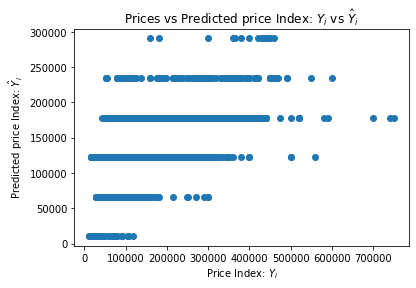

In [4]:
import matplotlib.pyplot as plt


linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))


plt.scatter(y, prediction)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")